In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
import random

from utils import *
from environment import ButtonsToy
from learner import Learner, bayesian_update, compute_policy, projection
from teacher import NaiveTeacher, cost
from bayesian_ToM.bayesian_teacher import BaysesianTeacher

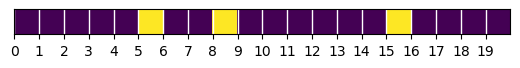

In [2]:
n_buttons = 20
n_music = 3

observation_env = ButtonsToy(n_buttons, n_music)
observation_env.render()

## Learners

In [5]:
types = [0, 1, 2, 3]
traj_size = 150
N = 100
N_envs = 5
dict_learner  = {}
for type in types:
    learner = Learner(type)
    dict_learner[type] = {'actions' : [],
                  'rewards' : []}
    for _ in range(N_envs):
        observation_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            learner.init_env(observation_env)
            actions, rewards = learner.act(traj_size)
            dict_learner[type]['actions'].append(actions)
            dict_learner[type]['rewards'].append(rewards)

/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: divide by zero encountered in log2
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: invalid value encountered in multiply
  tab = proba_dist * np.log2(proba_dist)


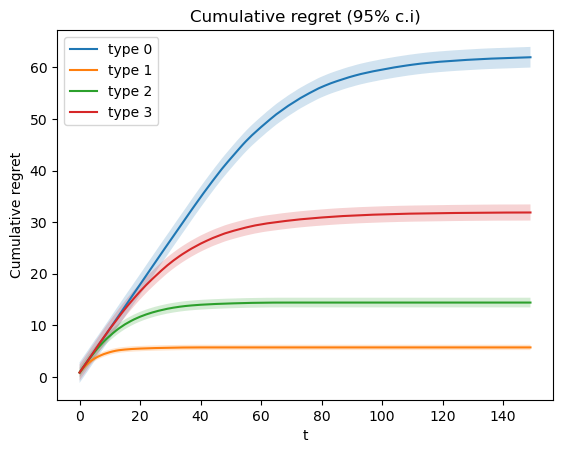

In [6]:
for ii,type in enumerate(types):
    all_rewards = np.array(dict_learner[type]['rewards'])
    all_cum_regrets = np.cumsum(np.ones_like(all_rewards) - all_rewards, axis=1)
    mean, std = np.mean(all_cum_regrets, axis=0), np.std(all_cum_regrets)

    plt.plot(mean, label=f'type {type}')
    plt.fill_between(np.arange(traj_size), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.ylabel('Cumulative regret')
    plt.xlabel('t')
    plt.title('Cumulative regret (95% c.i)')
    plt.legend()

## Bayesian based ToM teacher

Observation environment


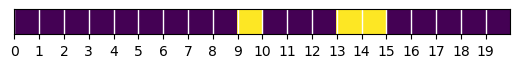

Demonstration environment


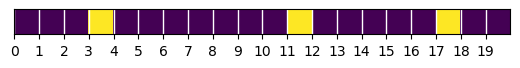

In [3]:
observation_env = ButtonsToy(n_buttons, n_music)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(n_buttons, n_music)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 4
teacher = BaysesianTeacher(env=observation_env, num_types=num_types)
learner = Learner(type=3)
learner.init_env(observation_env)

### Predict learner type (Maximum A Posteriori)

In [ ]:
N = 200
N_envs = 10
num_obs = 100

dict = {}

for type in range(num_types):
    dict[type] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            # Init teacher
            teacher = BaysesianTeacher(env=observation_env,
                                    num_types=num_types)
            # Init learner
            learner = Learner(type)
            learner.init_env(observation_env)

            accuracies = []
            for _ in range(num_obs):
                accuracies.append(type == teacher.predict_learner_type())
                traj = learner.act()
                teacher.observe(traj)
            dict[type].append(accuracies)

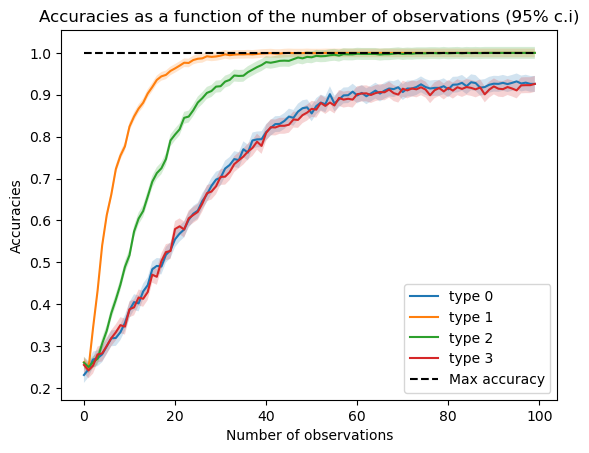

In [9]:
for type in range(num_types):
    accuracies = np.array(dict[type])
    mean, std = np.mean(accuracies, axis=0), np.std(accuracies)

    plt.plot(mean, label=f'type {type}')
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.ylabel('Accuracies')
    plt.xlabel('Number of observations')
    plt.title('Accuracies as a function of the number of observations (95% c.i)')
plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max accuracy", ls='--')
plt.legend();

In [ ]:
## Failure mode studies

N = 100
N_envs = 1
num_obs = 300

LOG = True

dict = {}

for type in range(num_types):
    dict[type] = {}
    dict[type]['accuracies'] = []
    dict[type]['beliefs'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            # Init teacher
            teacher = BaysesianTeacher(env=observation_env,
                                    num_types=num_types)
            # Init learner
            learner = Learner(type)
            learner.init_env(observation_env)

            accuracies = []
            all_beliefs = []
            tag_traj = []
            for _ in range(num_obs):
                all_beliefs.append(teacher.beliefs.copy())
                accuracies.append(type == teacher.predict_learner_type())
                traj = learner.act()
                teacher.observe(traj)
                tag_traj.append(traj)

            # If prediction failure after 300 observations
            if LOG and type != teacher.predict_learner_type():
                # print LOG
                print(f'LOG FAILURE : type {type} beliefs {teacher.beliefs} trajectory {tag_traj}')

            dict[type]['beliefs'].append(all_beliefs)
            dict[type]['accuracies'].append(accuracies)

LOG FAILURE : type 0 beliefs [0.49798818 0.00201182 0.00201182 0.49798818] trajectory [([1], [0.0]), ([8], [0.0]), ([3], [0.0]), ([16], [0.0]), ([18], [0.0]), ([11], [0.0]), ([9], [0.0]), ([16], [0.0]), ([16], [0.0]), ([2], [0.0]), ([11], [0.0]), ([2], [0.0]), ([1], [0.0]), ([16], [0.0]), ([10], [0.0]), ([8], [0.0]), ([5], [0.0]), ([10], [0.0]), ([0], [1.0]), ([19], [0.0]), ([11], [0.0]), ([5], [0.0]), ([18], [0.0]), ([14], [0.0]), ([19], [0.0]), ([19], [0.0]), ([13], [0.0]), ([8], [0.0]), ([17], [0.0]), ([17], [0.0]), ([18], [0.0]), ([9], [0.0]), ([14], [0.0]), ([5], [0.0]), ([9], [0.0]), ([15], [0.0]), ([15], [0.0]), ([2], [0.0]), ([3], [0.0]), ([18], [0.0]), ([10], [0.0]), ([5], [0.0]), ([13], [0.0]), ([15], [0.0]), ([12], [0.0]), ([7], [0.0]), ([13], [0.0]), ([19], [0.0]), ([13], [0.0]), ([10], [0.0]), ([11], [0.0]), ([4], [1.0]), ([1], [0.0]), ([7], [0.0]), ([3], [0.0]), ([2], [0.0]), ([12], [0.0]), ([5], [0.0]), ([10], [0.0]), ([19], [0.0]), ([8], [0.0]), ([2], [0.0]), ([10], [0.

### Demonstrate

Observation environment


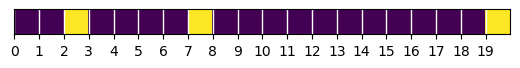

Demonstration environment


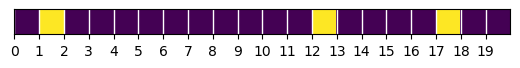

In [4]:
observation_env = ButtonsToy(n_buttons, n_music)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(n_buttons, n_music)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 4
num_demo_types = 4
teacher = BaysesianTeacher(env=observation_env, num_types=num_types)
learner = Learner(type=2)
learner.init_env(observation_env)

In [5]:
# Global evaluation parameters
# DICT = {}
# LOADED = False
DICT = load_output('./outputs/bayesian_ToM/teacher_eval.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 50

n_eval = 20

#### Experiments and display

In [11]:
def evaluate(method: str, alpha: float) -> None:
    if method not in DICT.keys():
        DICT[method] = {}
    DICT[method][alpha] = {}
    for type in range(num_types):
        DICT[method][alpha][type] = {}
        DICT[method][alpha][type]['rewards'] = []
        DICT[method][alpha][type]['demo'] = []
        DICT[method][alpha][type]['uncertainty'] = []
        DICT[method][alpha][type]['teacher_regret'] = []
        for _ in range(N_envs):
            # Init envs
            observation_env = ButtonsToy(n_buttons, n_music)
            demonstration_env = ButtonsToy(n_buttons, n_music)
            for _ in range(N):
                cum_rewards = []
                all_demo = []
                uncertainties = []
                teacher_regret = []
                for n in range(num_obs):
                    # Init teacher
                    if method == 'MAP' or method == 'Bayesian' or method == 'Oracle':
                        teacher = BaysesianTeacher(env=observation_env,
                                                    num_types=num_types)
                    elif method == 'Uniform' or method == 'Opt_non_adaptive':
                        teacher = NaiveTeacher(env=observation_env,
                                                    num_types=num_types)
                    # Init learner
                    learner = Learner(type)
                    learner.init_env(observation_env)
                    if method == 'MAP' or method == 'Bayesian':
                        # Observe the learner
                        traj = learner.act(size=n)
                        teacher.observe(traj)
                        # Teacher uncertainty
                        uncertainties.append(Shannon_entropy(teacher.beliefs))
                    # Chose demonstration
                    teacher.init_env(demonstration_env)
                    if method != 'Oracle':
                        demo = teacher.demonstrate(method=method, alpha=alpha)
                    else:
                        demo = teacher.demonstrate(method=method, alpha=alpha, true_learner_type=type)
                    # Teacher regret on its demonstration choice
                    teacher_regret.append(cost(demo, alpha=alpha) - cost(teacher.demonstrations[type], alpha=alpha))
                    # Show the demonstration
                    learner.init_env(demonstration_env)
                    learner.observe(demo)
                    # Evaluate hwo helpful has been the demonstration
                    _, rewards = learner.act(size=n_eval)
                    # Append
                    cum_rewards.append(np.sum(rewards))
                    all_demo.append(len(demo[0]))
                DICT[method][alpha][type]['rewards'].append(cum_rewards)
                DICT[method][alpha][type]['demo'].append(all_demo)
                DICT[method][alpha][type]['uncertainty'].append(uncertainties)
                DICT[method][alpha][type]['teacher_regret'].append(teacher_regret)

In [12]:
def display_evaluation(method: str, alpha: float, save: bool=True) -> None:
    demo_colors = ['m', 'red', 'orange', 'pink']

    if LOADED:
        alpha = str(alpha)

    fig0 = plt.figure(figsize=(15,5))
    # Mean over the type of learner of the total reward on trajectory of size 20  (after seen the demo chosen by the teacher)
    all_evals = np.array([DICT[method][alpha][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
    mean = np.mean(all_evals, axis=0)
    std = np.std(all_evals)

    plt.plot(mean, label=f'{method}', color='saddlebrown')
    plt.ylim(0, 21)
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='saddlebrown')
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    
    # Baseline MAP --> Uniform
    if method == 'MAP':
        baseline = 'Uniform'
        if baseline in DICT.keys():
            all_evals = np.array([DICT[baseline][alpha][str(type)]['rewards'] if LOADED else DICT[baseline][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)
            plt.plot(mean, label=f'Baseline ({baseline})', color='crimson', ls='--')
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='crimson')

    plt.title(fr' Mean total reward over all the type of learner'  + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')
    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Learner reward')
    plt.legend()

    fig1 = plt.figure(figsize=(15,5))
    # Learner total reward on trajectory of size 20 (after seen the demo chosen by the teacher for each type of learner)
    fig1.add_subplot(1,2,1)
    for type in range(num_types):
        if LOADED:
            type = str(type)
        all_evals = np.array(DICT[method][alpha][type]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'type = {type}')
        plt.ylim(0, 21)
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    plt.title(fr'Learner total reward per type'  + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')

    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Learner reward')
    plt.legend()

    # Teacher uncertainty
    if method == 'MAP' or method == 'Bayesian':
        fig1.add_subplot(1,2,2)
        for type in range(num_types):
            if LOADED:
                type = str(type)
            all_evals = np.array(DICT[method][alpha][type]['uncertainty'])
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)

            plt.plot(mean, label=f'type = {type}')
            plt.ylim(- 0.5 , Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        plt.title(fr'Teacher uncertainty per type' + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')

        plt.xlabel('Size of the learner trajectory observed by the teacher')
        plt.ylabel('Teacher uncertainty (Shannon entropy)')
        plt.legend()

    # Repartition btw type of demonstrations shown
    fig2, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        if LOADED:
            type = str(type)
        for demo_type in range(num_demo_types):
            demo_rep = np.array(DICT[method][alpha][type]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == n_buttons)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'% of each demo type for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' + f'\n {method} teacher, cost parameter alpha={alpha}')
        ax.set_xlabel('Size of the learner trajectory observed by the teacher')
        ax.set_ylabel('Proportion')
        ax.legend()

    # Teacher regret on the cost of the demonstration he showed
    fig3, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        if LOADED:
            type = str(type)
        all_regrets = np.array(DICT[method][alpha][type]['teacher_regret'])
        mean = np.mean(all_regrets, axis=0)
        std = np.std(all_regrets)

        ax.plot(mean, label=f'type = {type}', color='c')
        ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='c')
        ax.set_ylim( - (float(alpha) * (n_buttons - 1) + 0.02), float(alpha) * (n_buttons - 1) + 0.02)
        ax.plot(np.arange(num_obs), [0] * num_obs, c='k', ls='--')

        # Baseline
        if method == 'Bayesian':
            baseline = 'Opt_non_adaptive'
            all_regrets = np.array(DICT[baseline][alpha][type]['teacher_regret'])
            mean = np.mean(all_regrets, axis=0)
            std = np.std(all_regrets)

            ax.plot(mean, label=f'Baseline ({baseline})', color='crimson', ls='--')
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='crimson')

        ax.set_title(f'Teacher cost regret for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' +  f'\n {method} teacher, cost parameter alpha={alpha}')
        ax.set_xlabel('Size of the learner trajectory observed by the teacher')
        ax.set_ylabel('Cost regret')
        ax.legend()

    # Super figure
    figs = [fig0, fig1, fig2, fig3]
    saving_names = ['mean', 'per_type', 'chosen_demo', 'teacher_regret']
    if save:
        for ii, fig in enumerate(figs):
            fig.savefig(f'./bayesian_ToM/figures/{method}/eval_{saving_names[ii]}_{method}_{alpha}.png')

In [26]:
def display_utility(alpha: float=0.01) -> None:
    _ = plt.figure(figsize=(15,5))
    method_values = ['MAP', 'Bayesian', 'Uniform', 'Opt_non_adaptive', 'Oracle']
    colors = ['orangered', 'mediumvioletred', 'darkturquoise', 'royalblue', 'darkgreen']
    for ii,method in enumerate(method_values):
        util = []
        for type in range(num_types):
            best_cost = alpha * n_buttons if type == 0 else alpha * type
            all_rewards = np.array([DICT[method][str(alpha)][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
            all_cost = np.array([DICT[method][str(alpha)][str(type)]['teacher_regret'] + best_cost if LOADED else DICT[method][alpha][type]['rewards'] + best_cost for type in range(num_types)]).mean(axis=0)

            all_util = all_rewards / n_buttons - all_cost
            util.append(all_util)
            
        all = np.mean(util, axis=0)
        mean = np.mean(all, axis=0)
        std = np.std(all)
        plt.plot(mean, label=f'{method}', color=colors[ii])
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
    
    if alpha in [0.01, 0.02]:
        plt.ylim(0.5, 1)
    
    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Utility')
    plt.title(f'Mean utility over all the type of learner (95% c.i) \n cost parameter alpha={alpha}')
    plt.legend();


#### Compute statistic on the planning model (understand as a policy prediction model)

In [104]:
N = 3
N_envs = 300

def evaluate_planning_model(method: str, alpha: float, n: int, distance: callable) -> tuple:

    image_pourcentage_musical = np.zeros((4, 4))
    image_entropy = np.zeros((4, 4))
    image_error_dist = np.zeros((4, 4))
    image_pred_reward = np.zeros((4, 4))
    image_pred_utility = np.zeros((4, 4))

    for type in range(num_types):
        # print('type', type)
        for _ in range(N_envs):
            # Init envs
            observation_env = ButtonsToy(n_buttons, n_music)
            demonstration_env = ButtonsToy(n_buttons, n_music)
            for _ in range(N):

                # Init teacher
                if method == 'MAP' or method == 'Bayesian' or method == 'Oracle':
                    teacher = BaysesianTeacher(env=observation_env,
                                                num_types=num_types)
                elif method == 'Uniform' or method == 'Opt_non_adaptive':
                    teacher = NaiveTeacher(env=observation_env,
                                                num_types=num_types)
                # Init learner
                learner = Learner(type)
                learner.init_env(observation_env)
                if method == 'MAP' or method == 'Bayesian':
                    # Observe the learner
                    traj = learner.act(size=n)
                    teacher.observe(traj)
                # Change env demonstration
                    teacher.init_env(demonstration_env)
                    learner.init_env(demonstration_env)

                for demo_type in range(num_demo_types):
                    demo = teacher.demonstrations[demo_type]
                    pred_rewards = np.array([teacher.predict_reward(demo, t) for t in range(num_types)])

                    if method == 'Bayesian':

                        # Predicted reward (ponderated sum)
                        image_pred_reward[type, demo_type] += np.sum(pred_rewards * teacher.beliefs)
                        # Predicted utility (ponderated sum)
                        image_pred_utility[type, demo_type] += np.sum([(pred_rewards[t] - cost(demo, alpha)) * teacher.beliefs[t] for t in range(num_types)])
                        
                        # Predicted policy (ponderated mean)
                        bayesian_pred_policy = np.zeros(n_buttons)
                        for t in range(num_types):
                            pred_learner_beliefs_demo_env = teacher.learner_beliefs.copy()
                            for a,r in zip(demo[0], demo[1]):
                                pred_learner_beliefs_demo_env = bayesian_update(pred_learner_beliefs_demo_env, a, r)
                            predicted_policy = compute_policy(projection(pred_learner_beliefs_demo_env, t), teacher.env)
                            bayesian_pred_policy += predicted_policy * teacher.beliefs[t]

                        # True policy 
                        learner_beliefs_demo_env = learner.beliefs.copy()
                        for a,r in zip(demo[0], demo[1]):
                            learner_beliefs_demo_env = bayesian_update(learner_beliefs_demo_env, a, r)
                        true_policy = compute_policy(projection(learner_beliefs_demo_env, type), teacher.env)
                        
                        # Distance btw the predicted and the true policy
                        image_error_dist[type, demo_type] = distance(bayesian_pred_policy, true_policy)
                        # Entropy of the predicted policy
                        image_entropy[type, demo_type] += Shannon_entropy(bayesian_pred_policy)

                        # % of the most probable buttons the learner will play are in the set of mucial buttons
                        argmax_set = np.where(np.isclose(bayesian_pred_policy, np.max(bayesian_pred_policy)))[0]
                        # print('argmax set', argmax_set)
                        image_pourcentage_musical[type, demo_type] += np.random.choice(argmax_set) in np.where(demonstration_env.R == 1)[0]

                    if method == 'MAP':
                        # Predicted learner type based on maximum a posteriori
                        pred_type = teacher.predict_learner_type()

                        # Predicted reward
                        image_pred_reward[type, demo_type] += pred_rewards[pred_type]
                        # Predicted utility
                        image_pred_utility[type, demo_type] += pred_rewards[pred_type] - cost(demo, alpha)
                        # Predicted policy
                        learner_beliefs_demo_env = teacher.learner_beliefs.copy()
                        for a,r in zip(demo[0], demo[1]):
                            learner_beliefs_demo_env = bayesian_update(learner_beliefs_demo_env, a, r)
                        predicted_policy = compute_policy(projection(learner_beliefs_demo_env, pred_type), teacher.env)
                        # Distance btw the predicted and the true policy
                        image_error_dist[type, demo_type] = distance(predicted_policy, compute_policy(learner.beliefs, learner.env))
                        # Entropy of the predicted policy
                        image_entropy[type, demo_type] += Shannon_entropy(predicted_policy)

                        # % of the most probable buttons the learner will play are in the set of mucial buttons
                        argmax_set = np.where(np.isclose(predicted_policy, np.max(predicted_policy)))[0]
                        image_pourcentage_musical[type, demo_type] += np.random.choice(argmax_set) in np.where(demonstration_env.R == 1)[0]

    return image_pred_reward / (N * N_envs), \
           image_pred_utility / (N * N_envs), \
           image_pourcentage_musical / (N * N_envs), \
           image_entropy / (N * N_envs), \
           image_error_dist / (N * N_envs)           

In [105]:
method = 'MAP'
alpha = 0.01
distance = SE_dist
n = 50

image_pred_reward, image_pred_utility, image_pourcentage_musical, image_entropy, image_error_dist = evaluate_planning_model(method, alpha=alpha, n=n, distance=distance)

/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: divide by zero encountered in log2
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: invalid value encountered in multiply
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/learner.py:31: RuntimeWarning: invalid value encountered in divide
  updated_beliefs[a, :] /= updated_beliefs[a, :].sum()


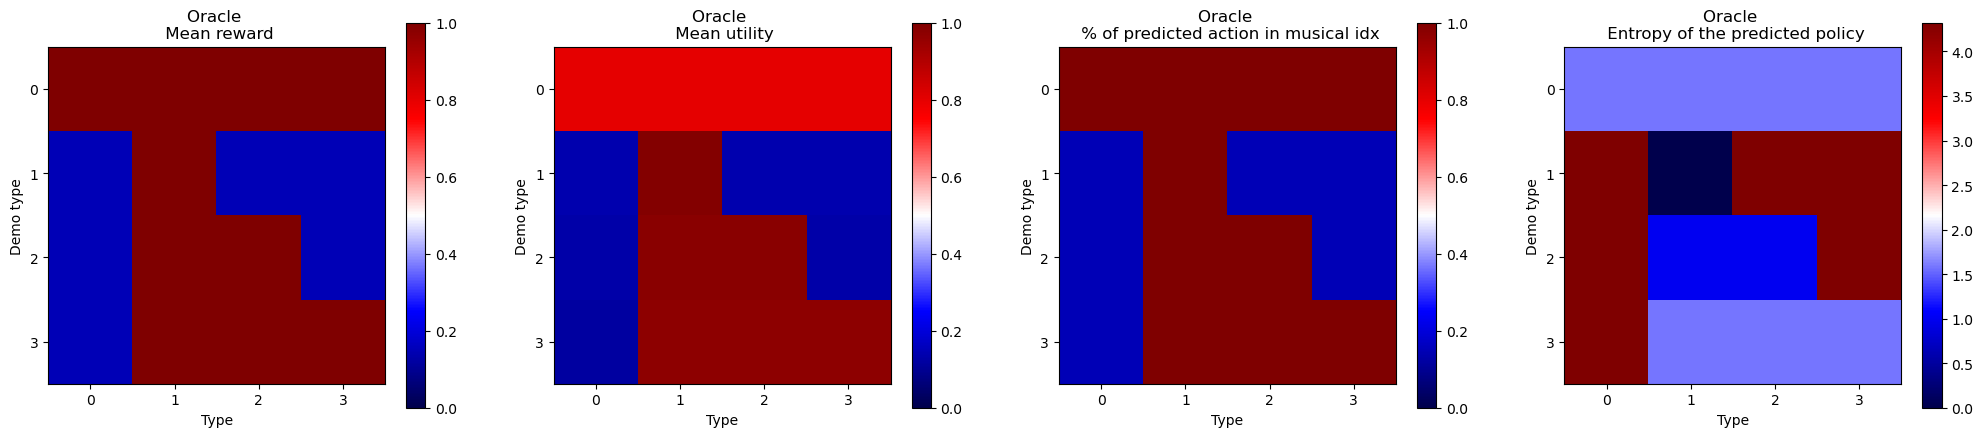

In [106]:
# Oracle teacher

perf_image_entropy = np.zeros((4, 4))
perf_image_pourcentage_musical = np.zeros((4, 4))
perf_image_utility = np.zeros((4, 4))

for type in range(num_types):
    for demo_type in range(num_demo_types):
        
        len_demo = n_buttons if demo_type == 0 else demo_type

        if demo_type == 0:
            dist = np.zeros(n_buttons)
            dist[np.array([0, 1, 2])] = np.ones(3)
            dist /= dist.sum()
            perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
            perf_image_pourcentage_musical[type, demo_type] = 1
        elif demo_type == 3:
            if type == 0:
                # Uniform policy
                perf_image_entropy[type, demo_type] = Shannon_entropy(np.ones(n_buttons) / n_buttons)
                perf_image_pourcentage_musical[type, demo_type] = 3/20
            else:
                # Peaked on 3 (musical) buttons policy
                dist = np.zeros(n_buttons)
                dist[np.array([0, 1, 2])] = np.ones(3)
                dist /= dist.sum()
                perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
                perf_image_pourcentage_musical[type, demo_type] = 1
        elif demo_type == 2:
            if type == 0 or type == 3:
                # Uniform policy
                perf_image_entropy[type, demo_type] = Shannon_entropy(np.ones(n_buttons) / n_buttons)
                perf_image_pourcentage_musical[type, demo_type] = 3/20
            else:
                # Peaked on 2 (musical) buttons policy
                dist = np.zeros(n_buttons)
                dist[np.array([0, 1])] = np.ones(2)
                dist /= dist.sum()
                perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
                perf_image_pourcentage_musical[type, demo_type] = 1
        elif demo_type == 1:
            if type == 0 or type == 3 or type == 2:
                # Uniform policy
                perf_image_entropy[type, demo_type] = Shannon_entropy(np.ones(n_buttons) / n_buttons)
                perf_image_pourcentage_musical[type, demo_type] = 3/20
            else:
                # Peaked on 1 (musical) buttons policy
                dist = np.zeros(n_buttons)
                dist[0] = np.ones(1)
                dist /= dist.sum()
                perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
                perf_image_pourcentage_musical[type, demo_type] = 1

        perf_image_utility[type, demo_type] = perf_image_pourcentage_musical[type, demo_type] - alpha * len_demo


fig = plt.figure(figsize=(25,5))

fig.add_subplot(1,4,1)
plt.imshow(perf_image_pourcentage_musical.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n Mean reward')

fig.add_subplot(1,4,2)
plt.imshow(perf_image_utility.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'Oracle \n Mean utility (alpha={alpha})')

fig.add_subplot(1,4,3)
plt.imshow(perf_image_pourcentage_musical.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n % of predicted action in musical idx')

fig.add_subplot(1,4,4)
plt.imshow(perf_image_entropy.T, cmap='seismic', vmin=0, vmax=(Shannon_entropy(np.ones(n_buttons) / n_buttons)))
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n Entropy of the predicted policy');

fig.savefig(f"./bayesian_ToM/figures/Statistics/oracle.png")

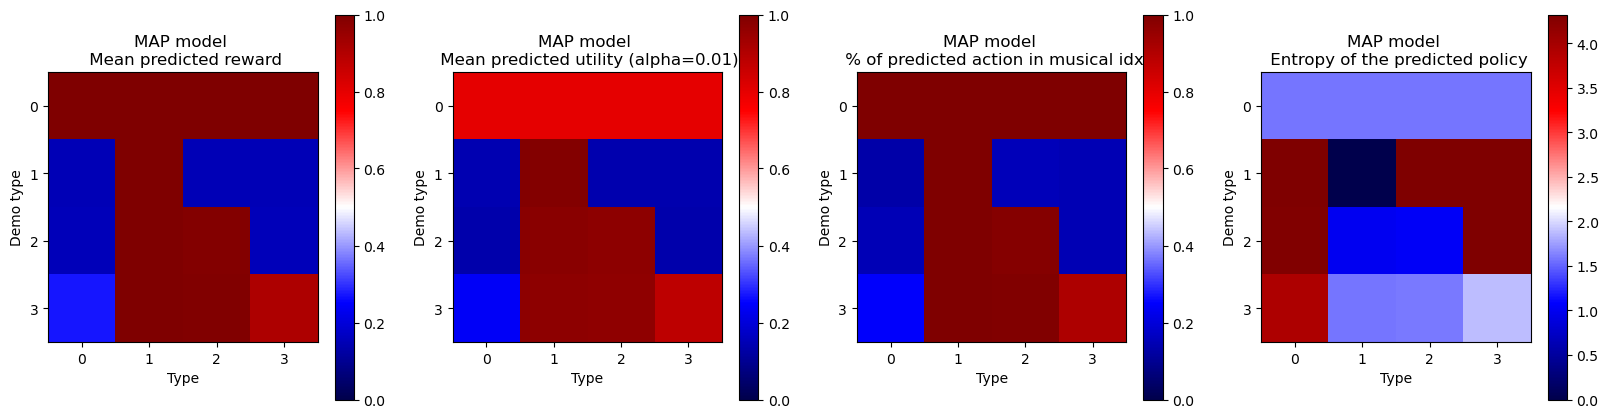

In [107]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,4,1)
plt.imshow(image_pred_reward.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'{method} model \n Mean predicted reward')

fig.add_subplot(1,4,2)
plt.imshow(image_pred_utility.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'{method} model \n Mean predicted utility (alpha={alpha})')

fig.add_subplot(1,4,3)
plt.imshow(image_pourcentage_musical.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'{method} model \n % of predicted action in musical idx')

fig.add_subplot(1,4,4)
plt.imshow(image_entropy.T, cmap='seismic', vmin=0, vmax=(Shannon_entropy(np.ones(n_buttons) / n_buttons)))
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'{method} model \n Entropy of the predicted policy');

fig.savefig(f"./bayesian_ToM/figures/Statistics/{method}.png")

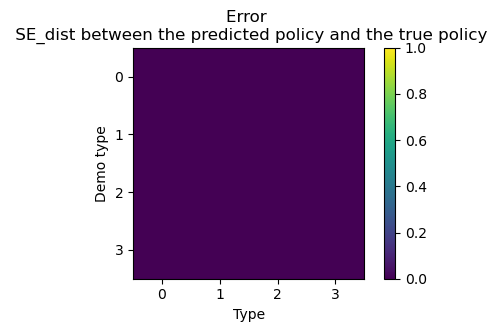

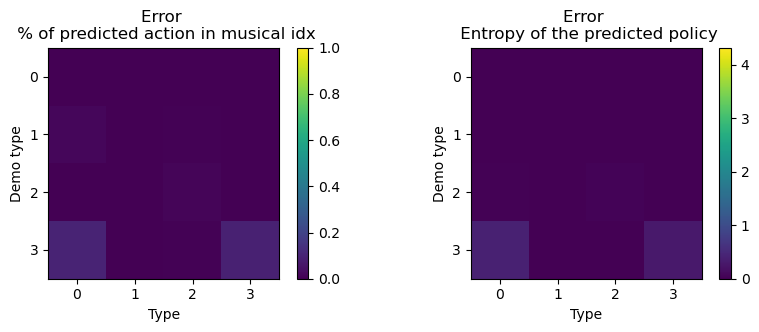

In [108]:
fig = plt.figure(figsize=(5,3))

plt.imshow(image_error_dist.T, cmap='viridis', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'Error \n {distance.__name__} between the predicted policy and the true policy')

fig.savefig(f"./bayesian_ToM/figures/Statistics/{method}_error_L2.png")

fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,2,1)
plt.imshow(np.abs(perf_image_pourcentage_musical - image_pourcentage_musical).T, cmap='viridis', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Error \n % of predicted action in musical idx')


fig.add_subplot(1,2,2)
plt.imshow(np.abs(perf_image_entropy - image_entropy).T, cmap='viridis', vmin=0, vmax=(Shannon_entropy(np.ones(n_buttons) / n_buttons)))
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Error \n Entropy of the predicted policy');

fig.savefig(f"./bayesian_ToM/figures/Statistics/{method}_error.png")

#### Mean utility for all the teachers

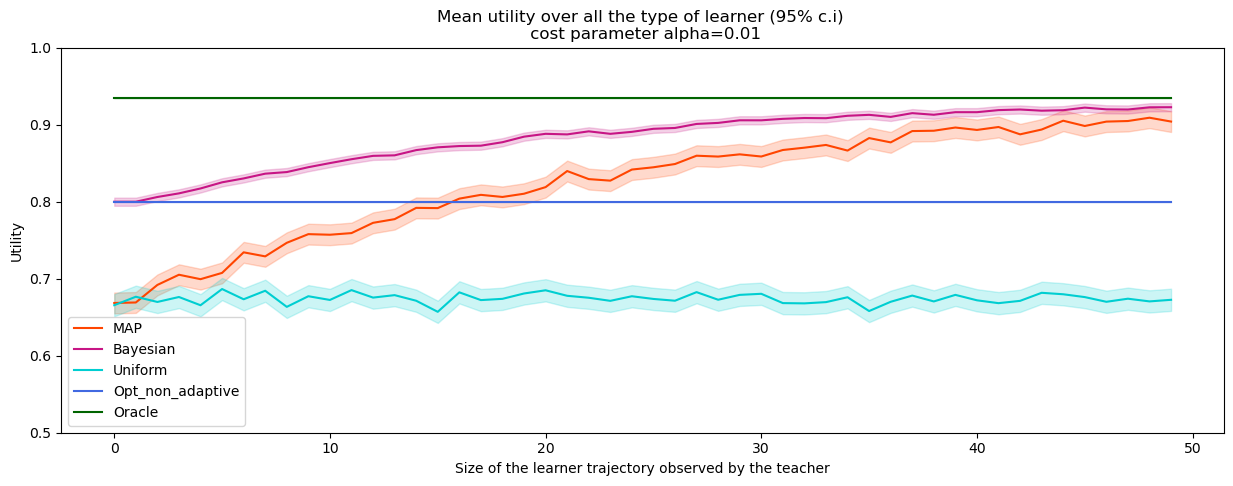

In [27]:
display_utility(alpha=0.01)

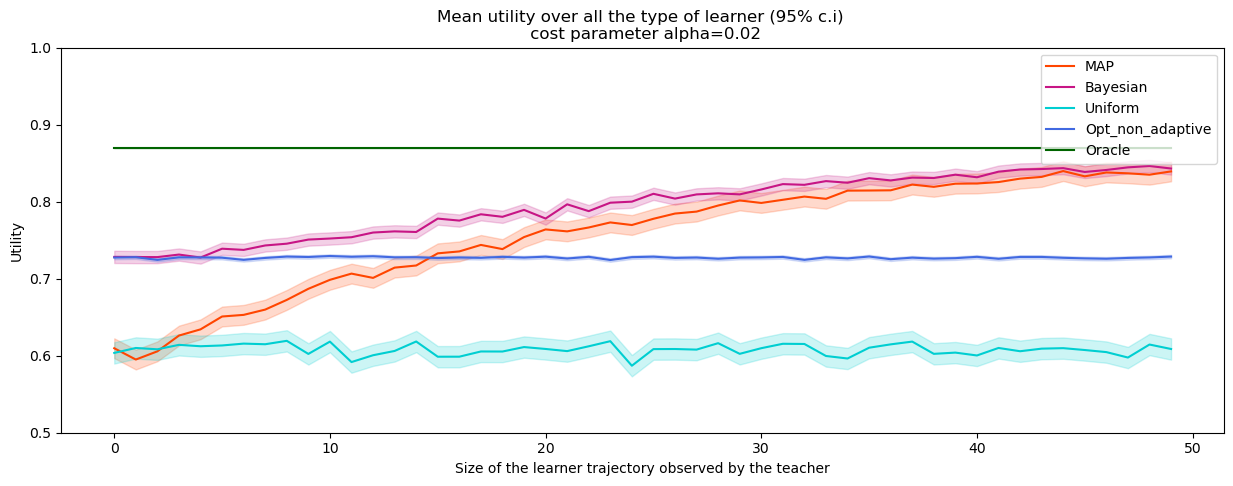

In [28]:
display_utility(alpha=0.02)

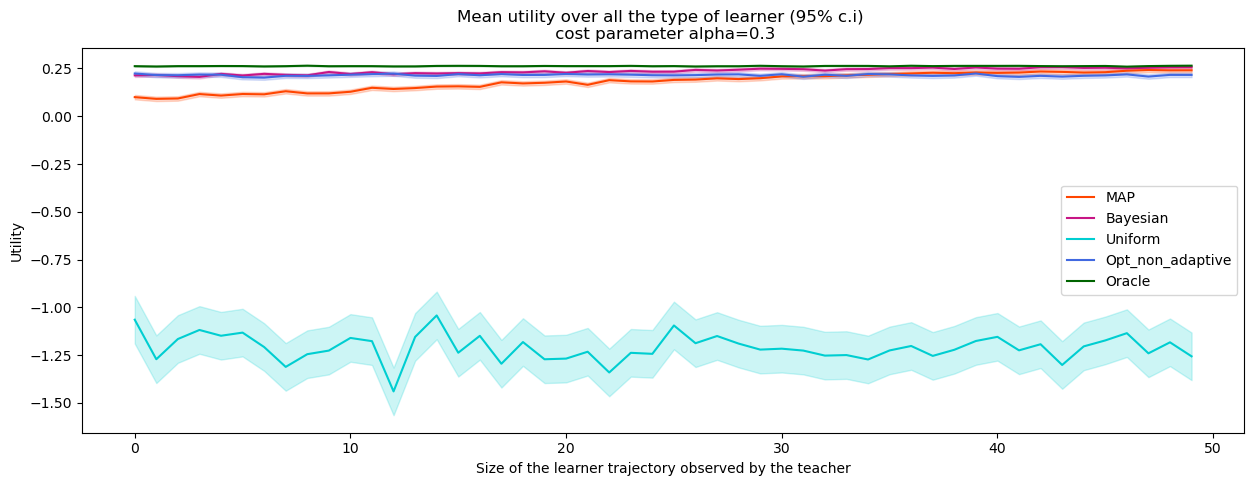

In [29]:
display_utility(alpha=0.3)

#### MAP teacher

In [10]:
method = 'MAP'
alpha_values = [0.03] #[0.01, 0.02]

for alpha in alpha_values:
    evaluate(method, alpha)

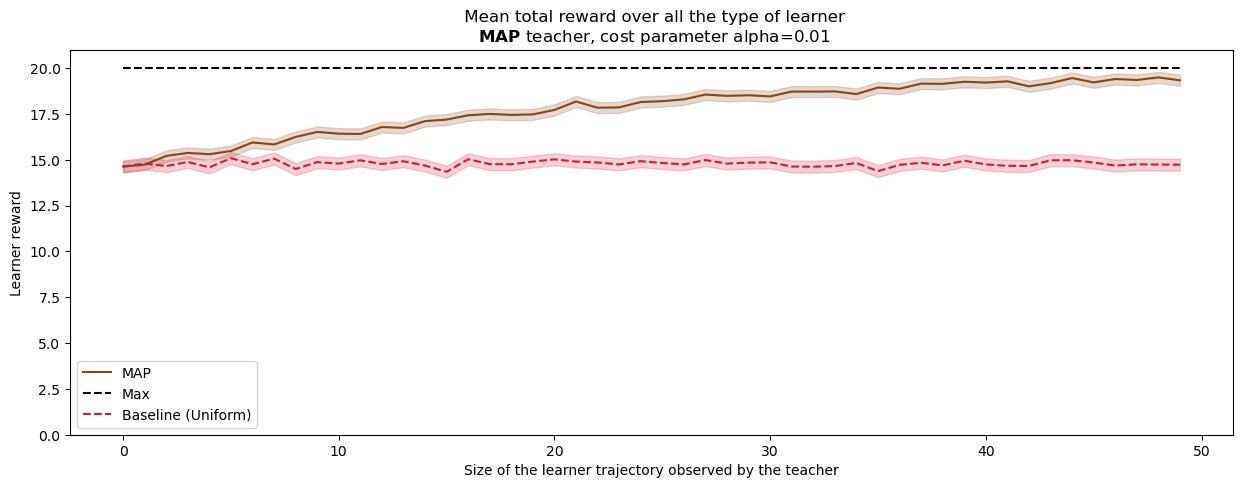

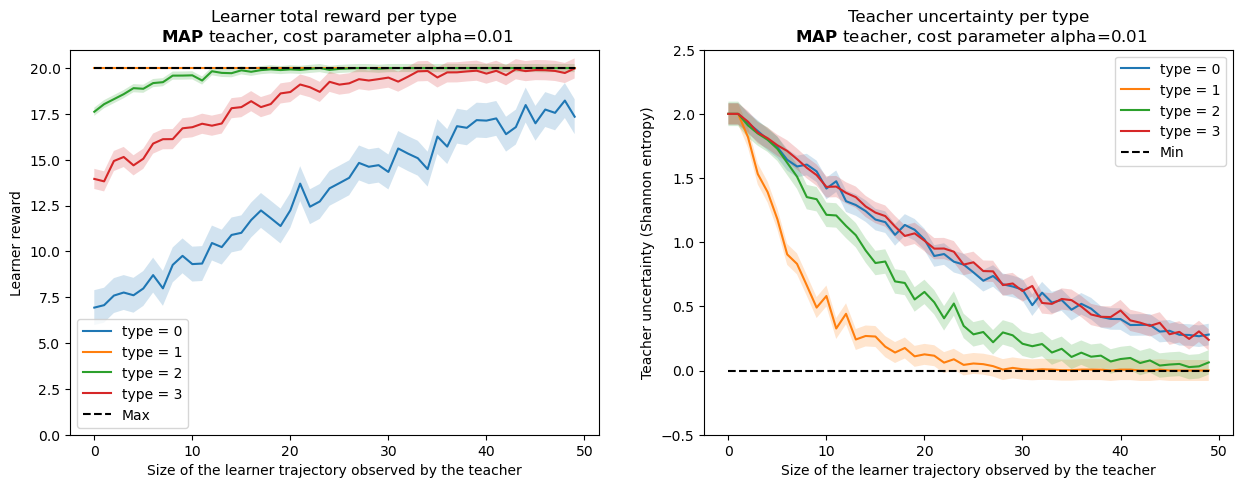

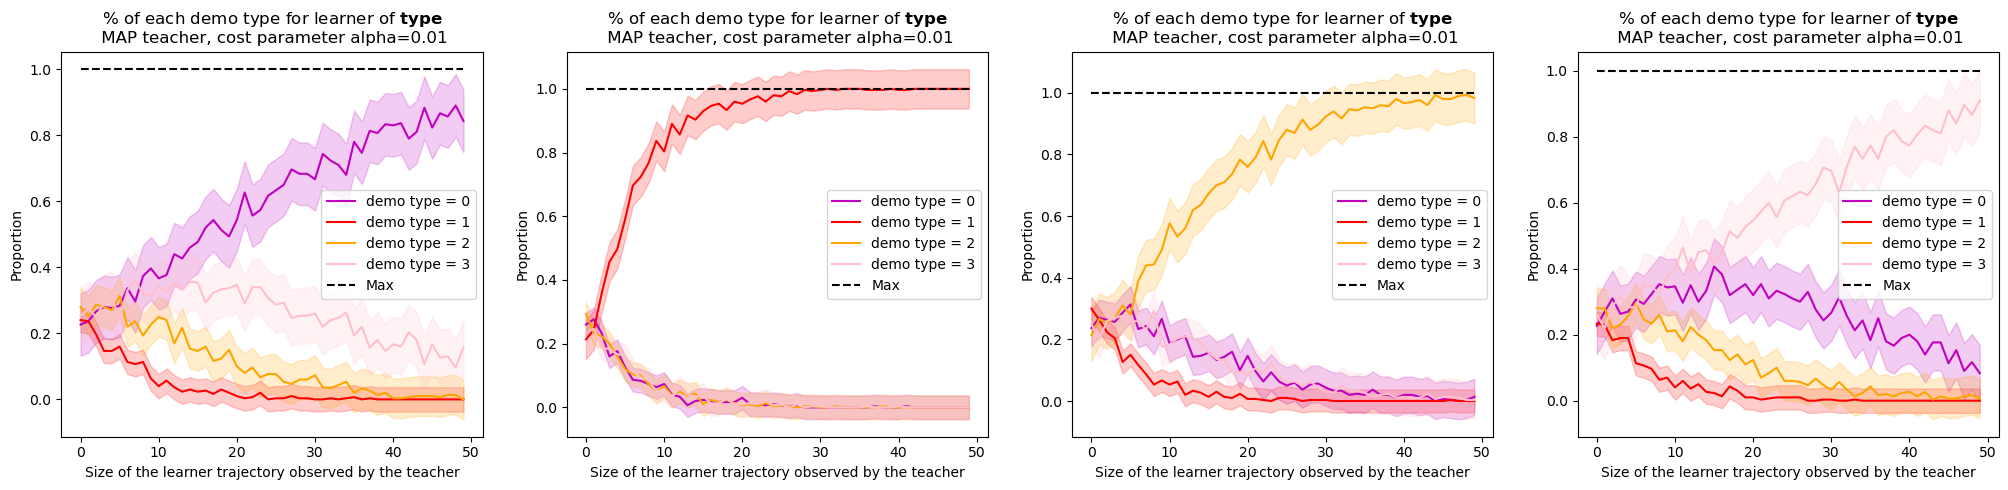

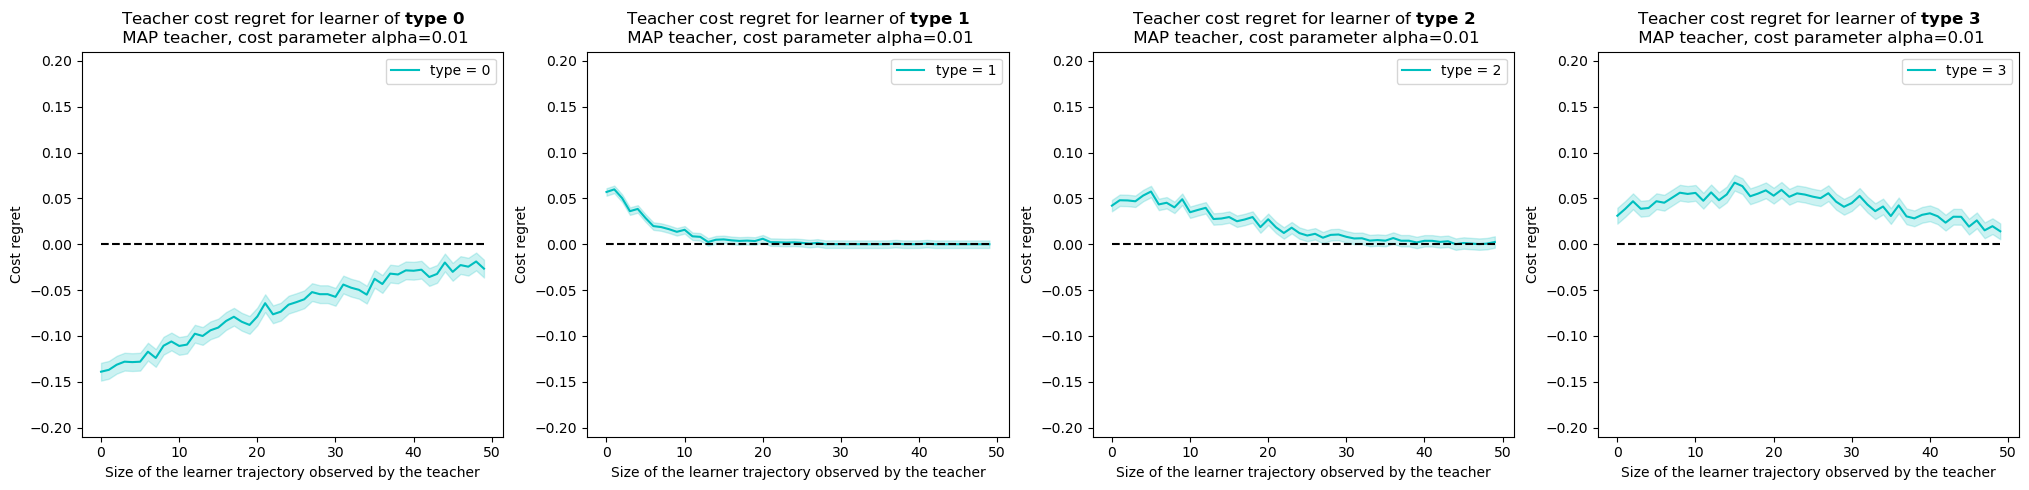

In [19]:
method, alpha = 'MAP', alpha_values[0]
display_evaluation(method, alpha)

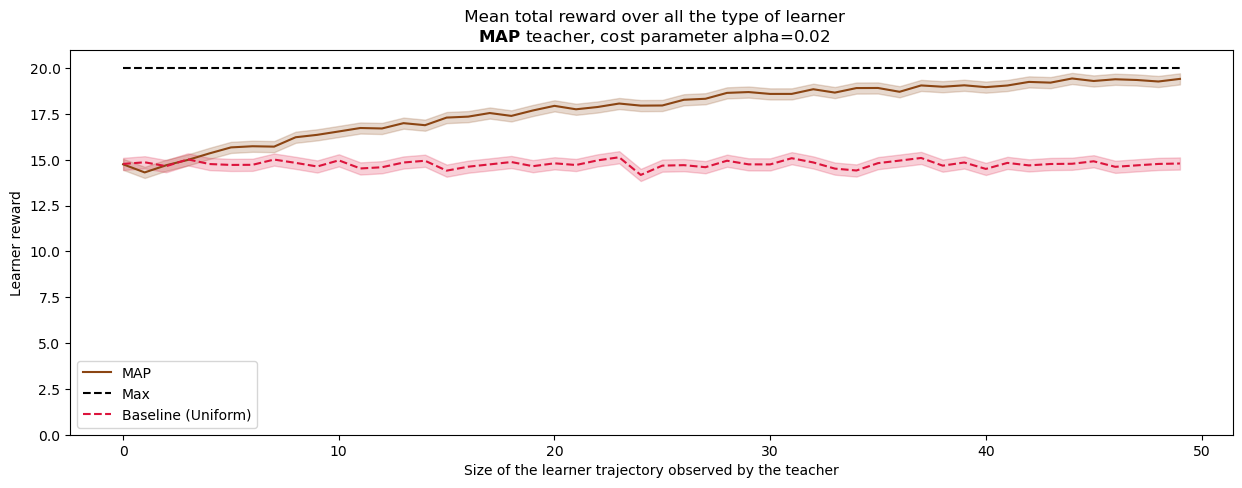

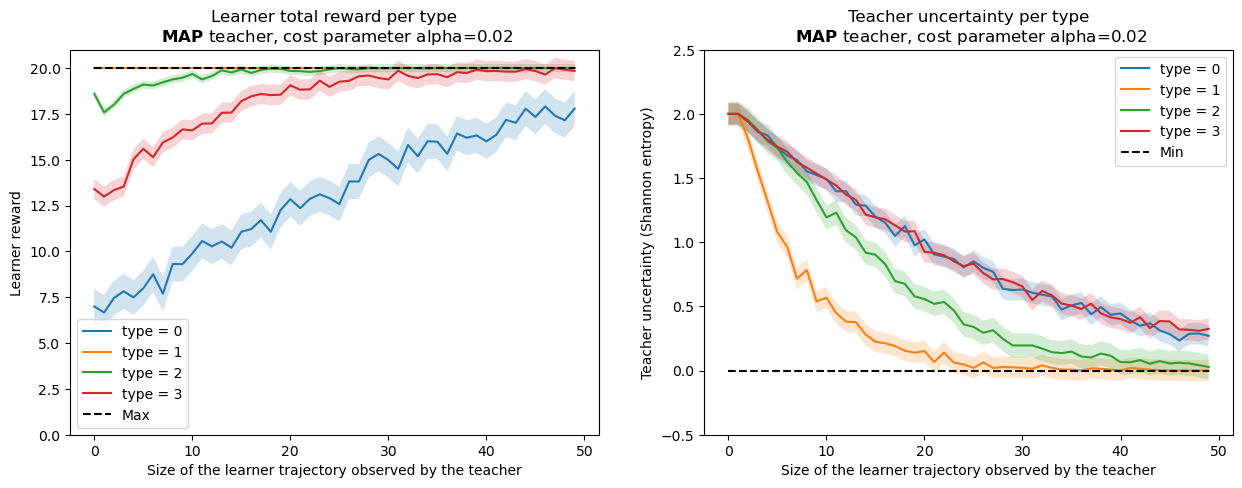

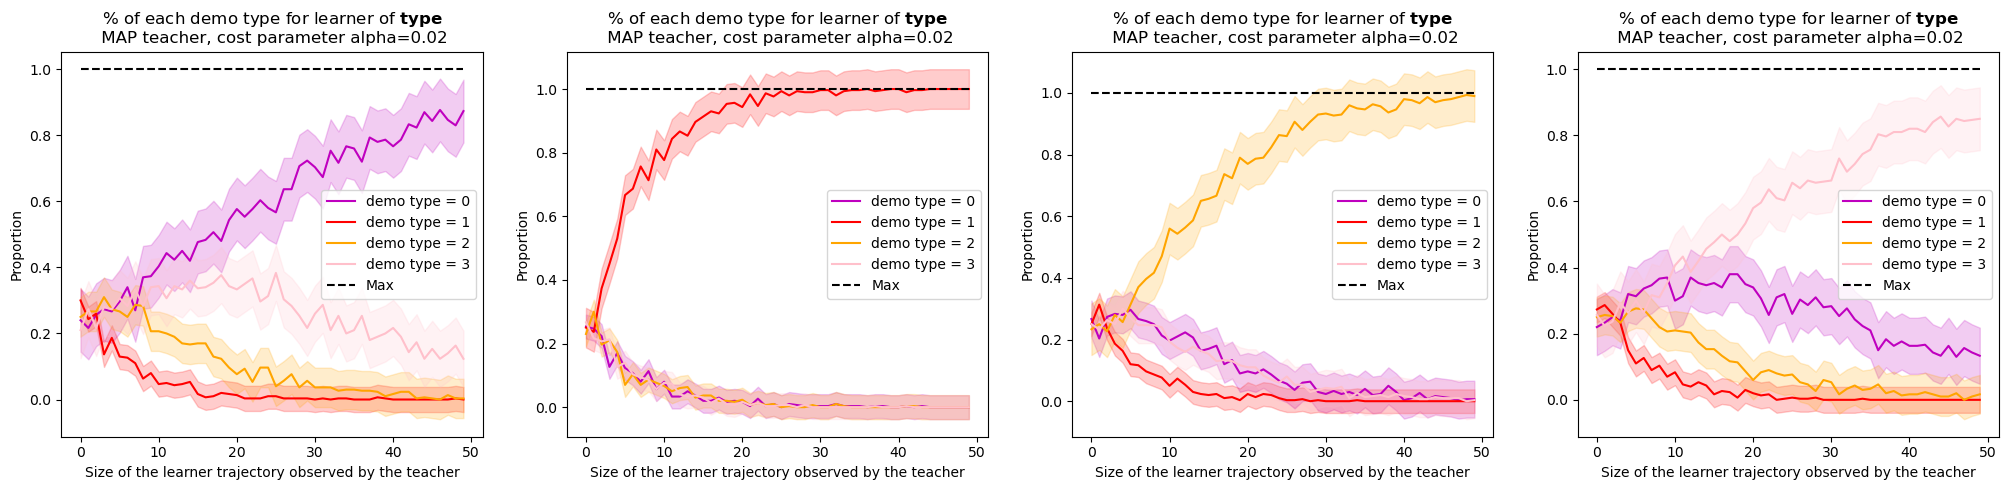

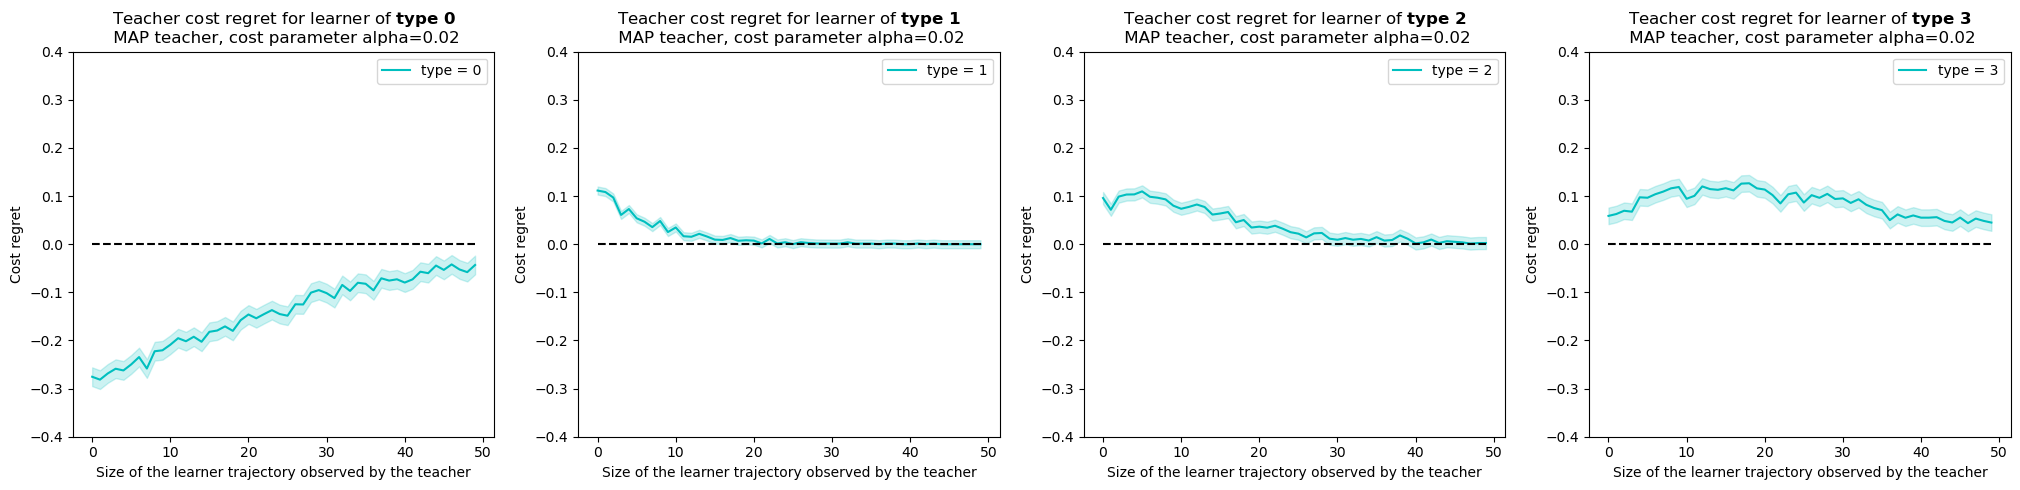

In [20]:
method, alpha = 'MAP', alpha_values[1]
display_evaluation(method, alpha)

#### Bayesian teacher

In [11]:
method = 'Bayesian'
alpha_values = [0.03] #[0.01, 0.02, 0.03]

for alpha in alpha_values:
    evaluate(method, alpha)

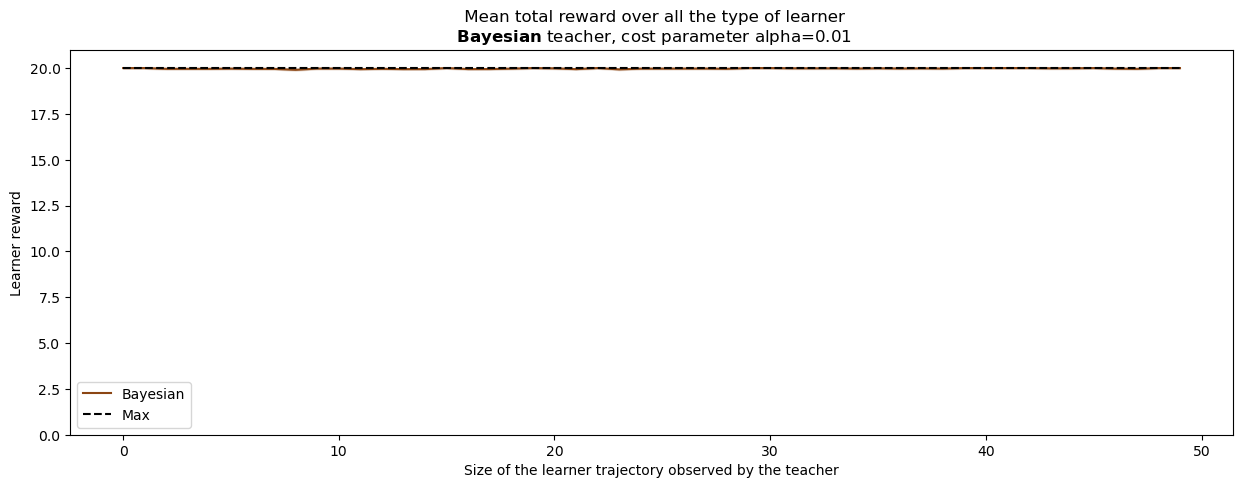

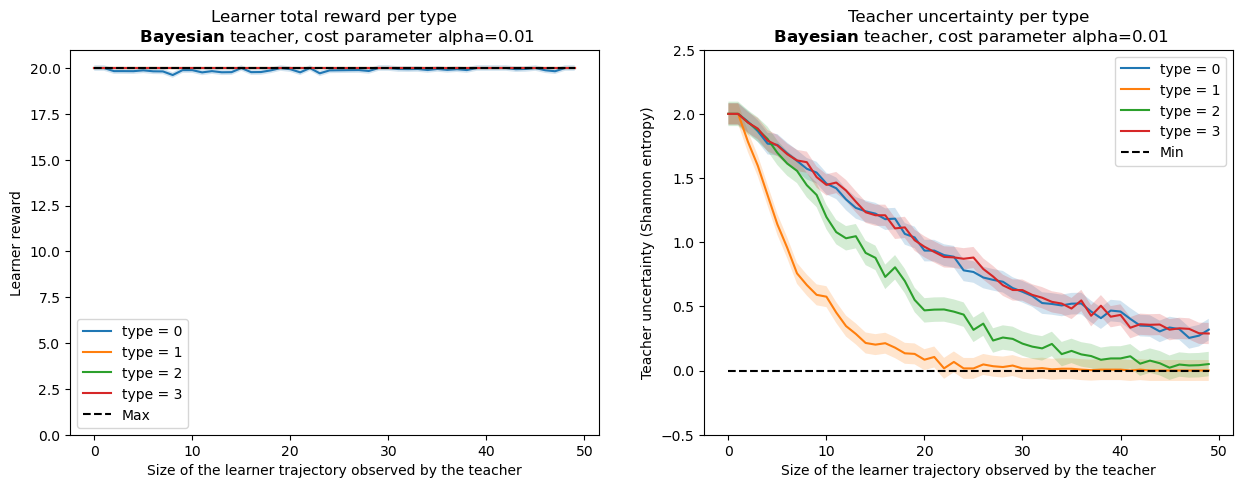

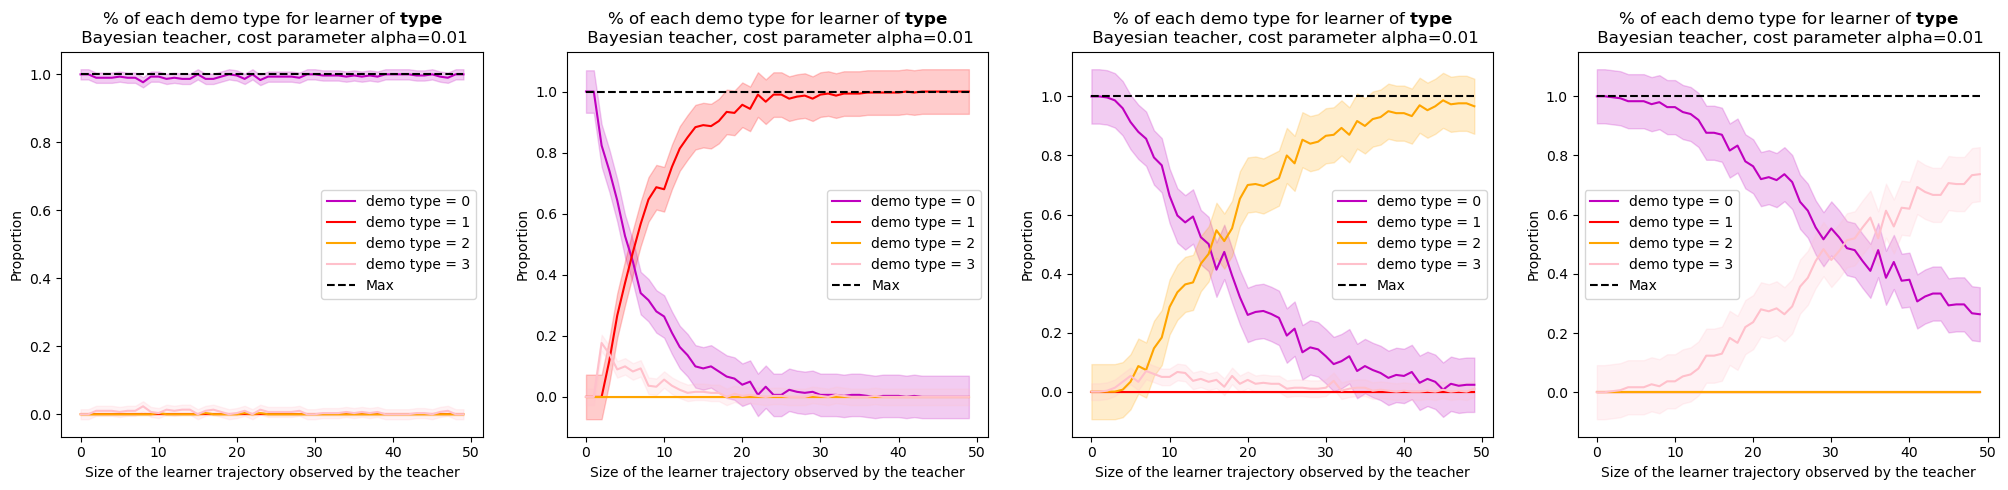

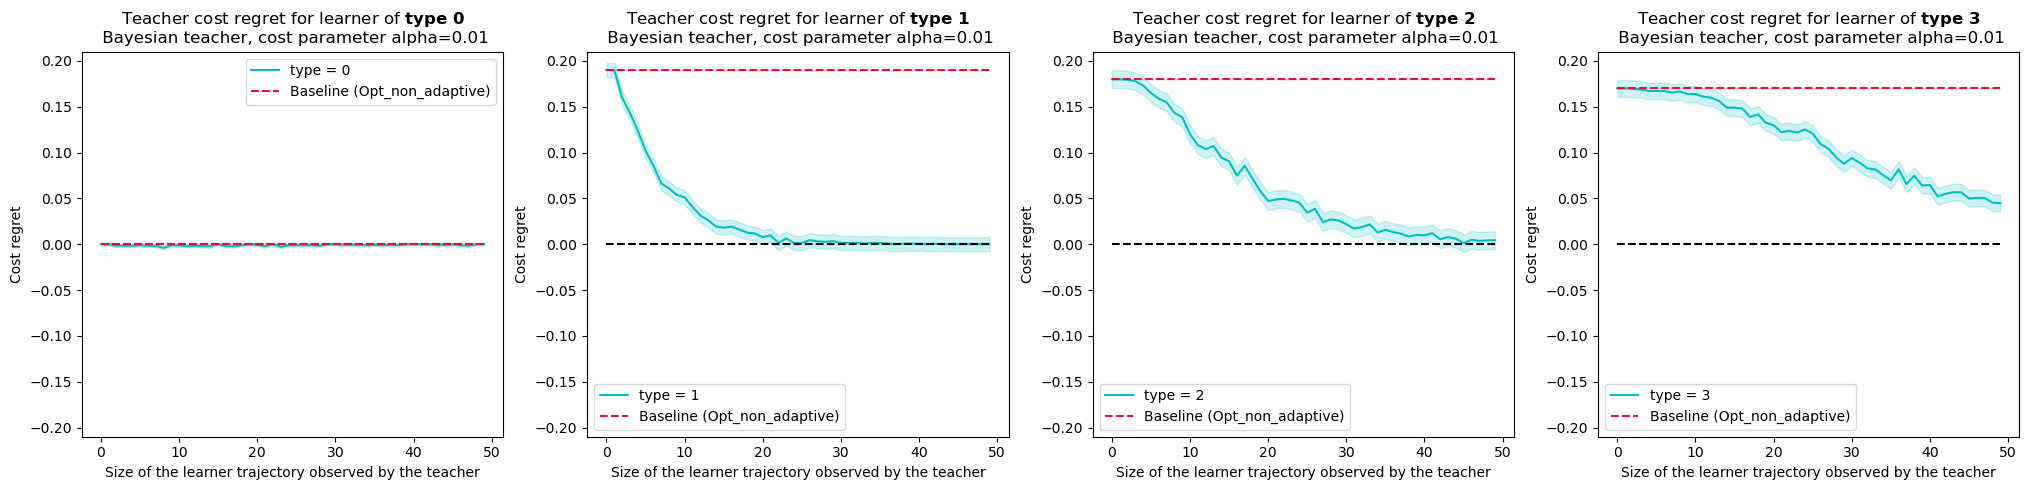

In [21]:
method, alpha = 'Bayesian', alpha_values[0]
display_evaluation(method, alpha)

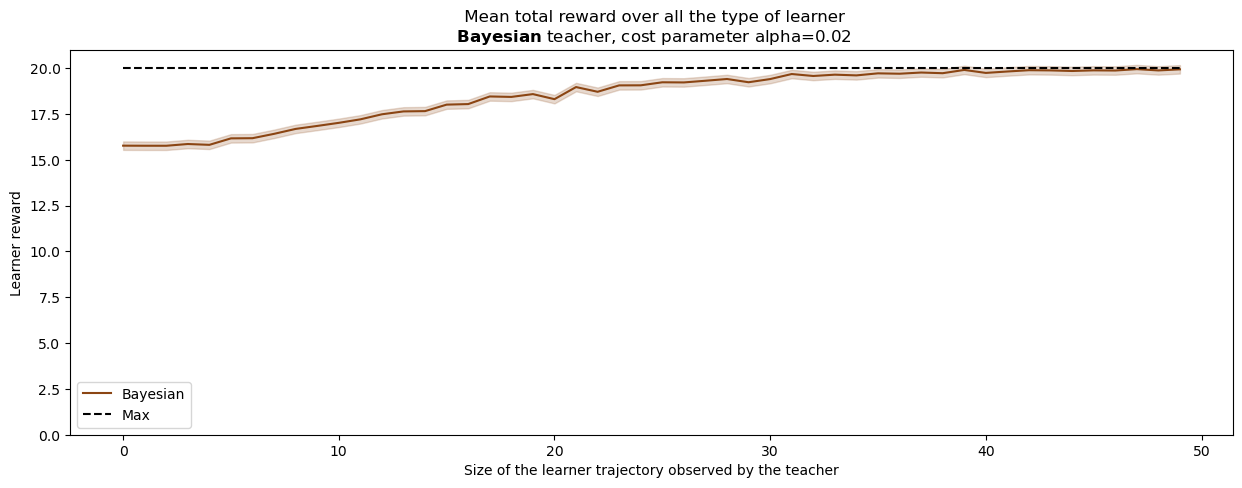

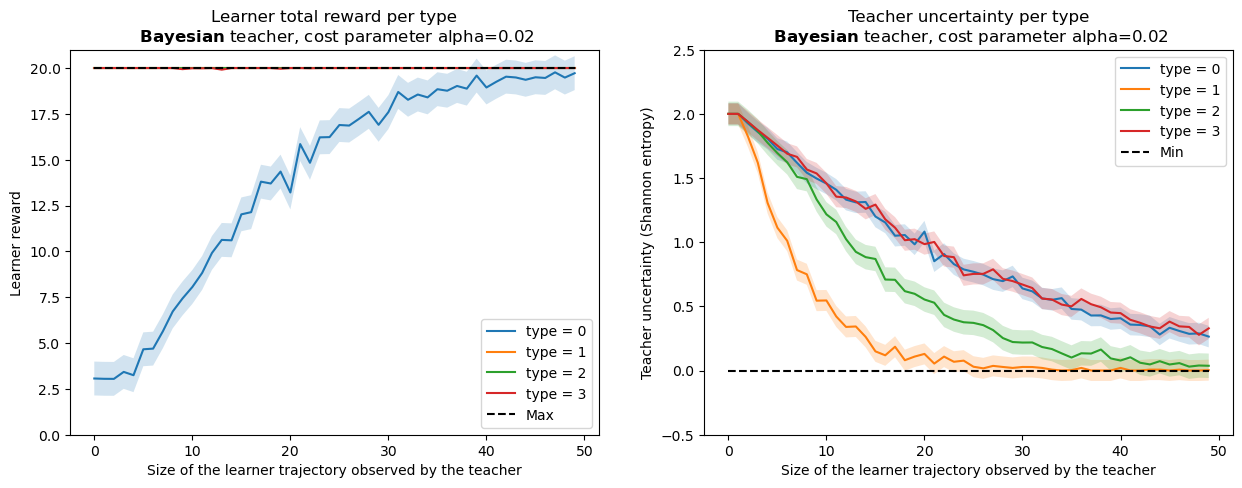

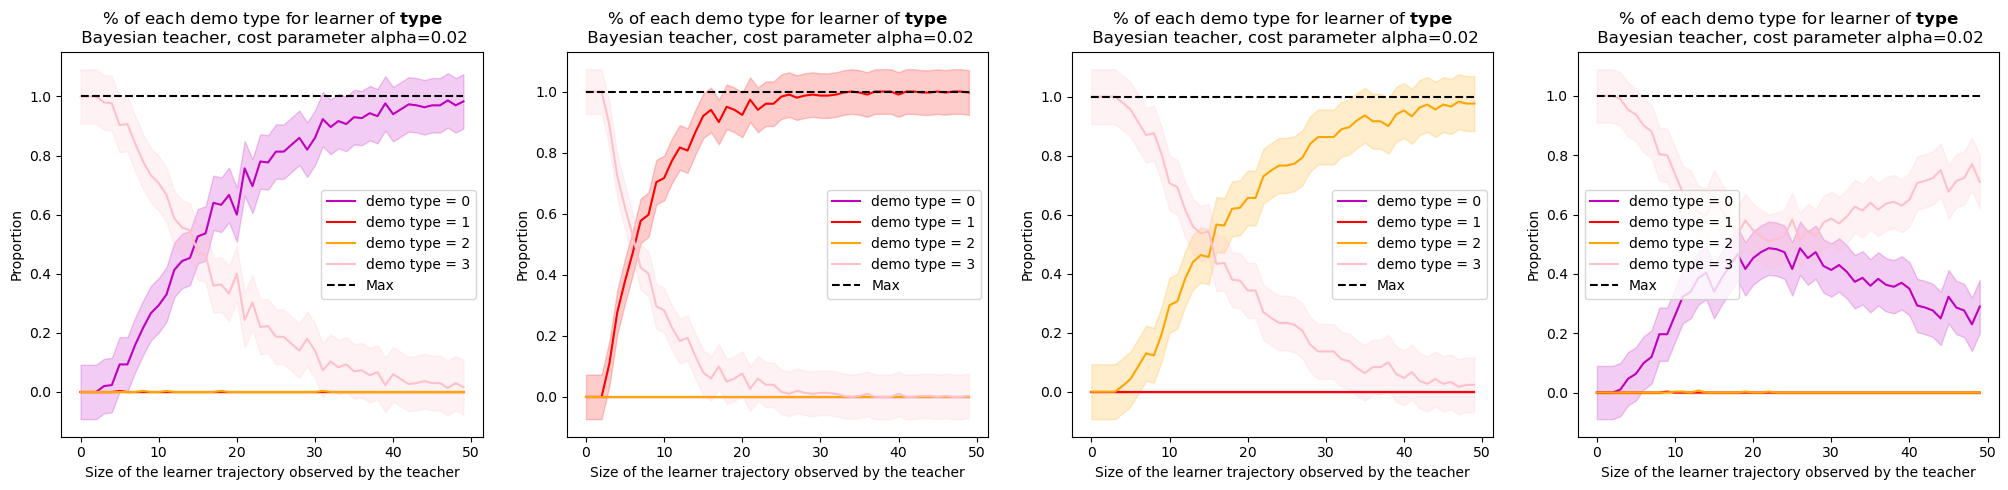

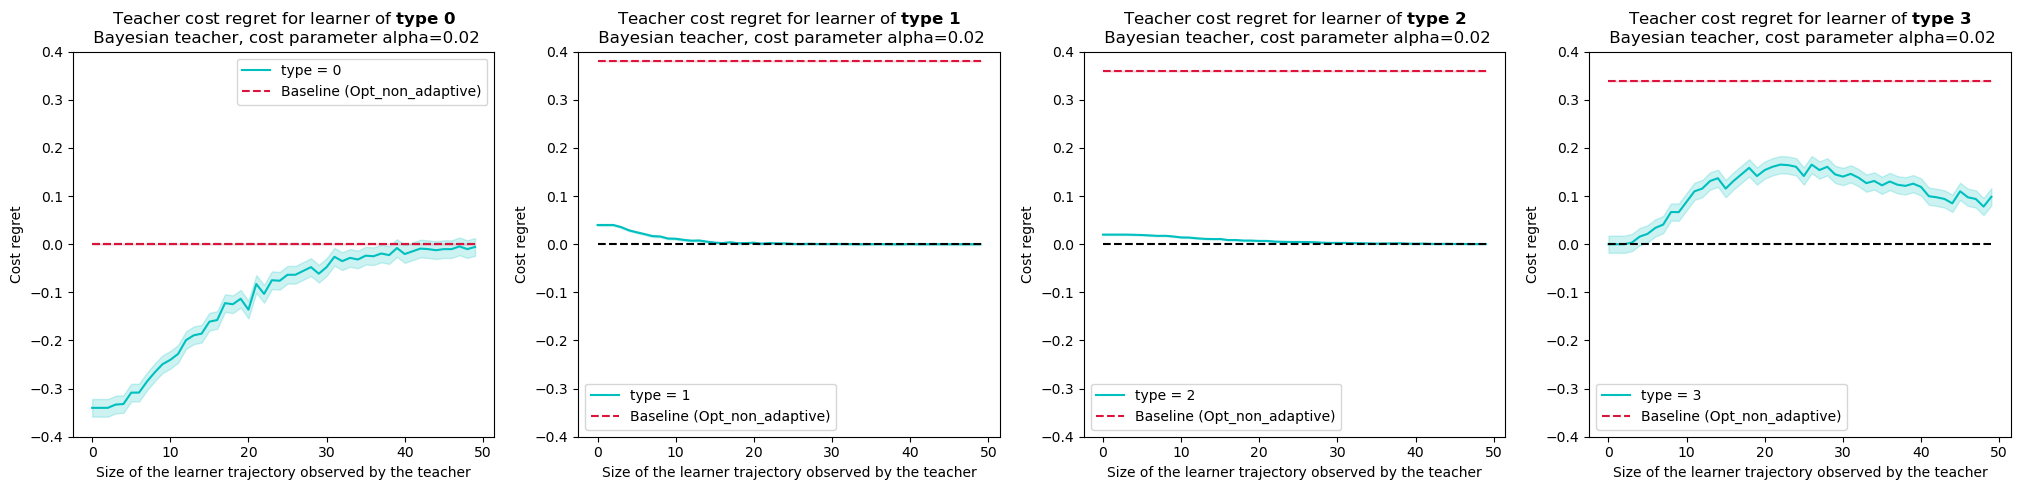

In [23]:
method, alpha = 'Bayesian', alpha_values[1]
display_evaluation(method, alpha)

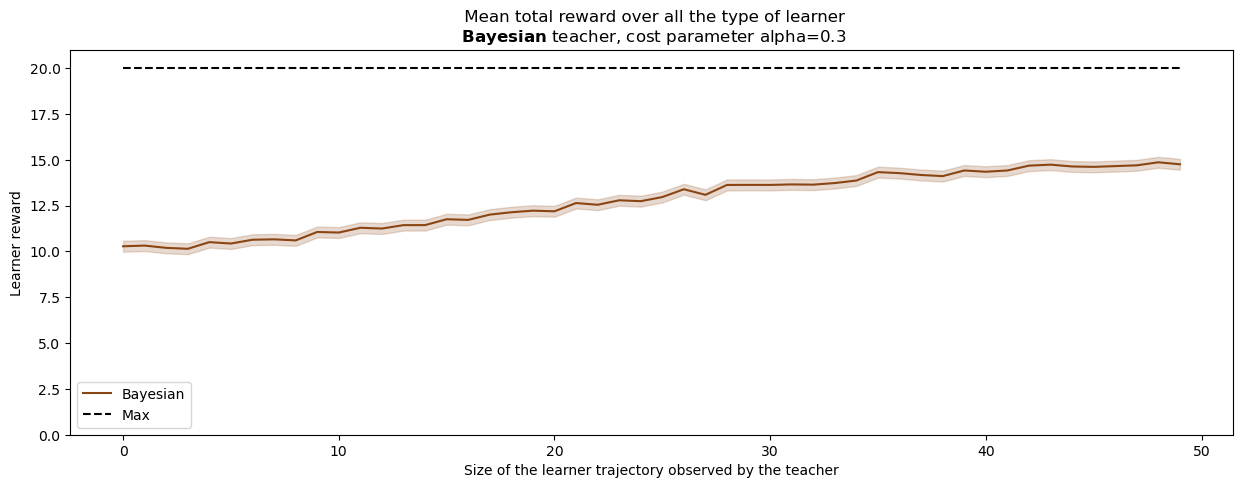

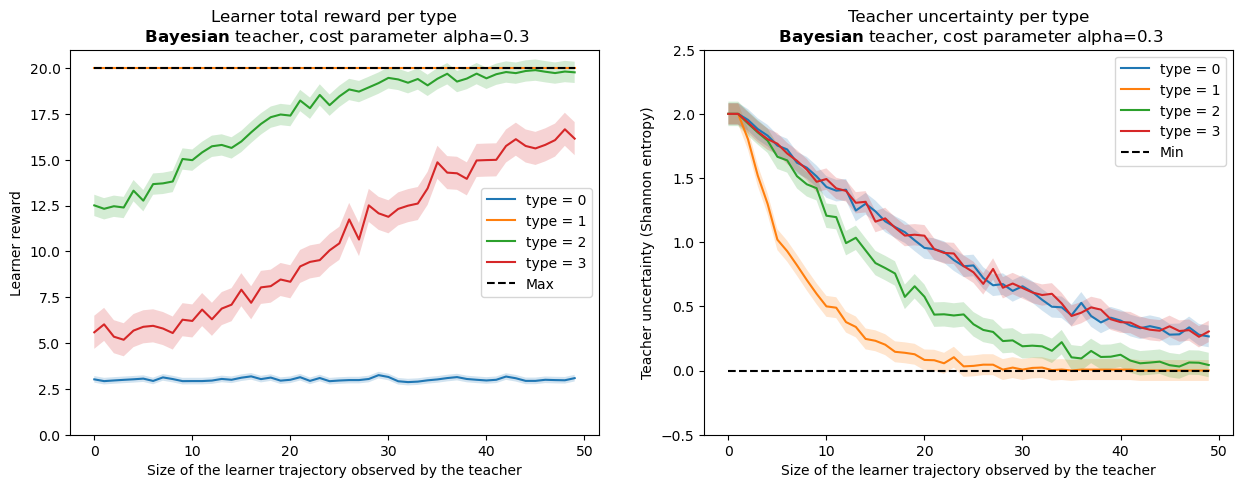

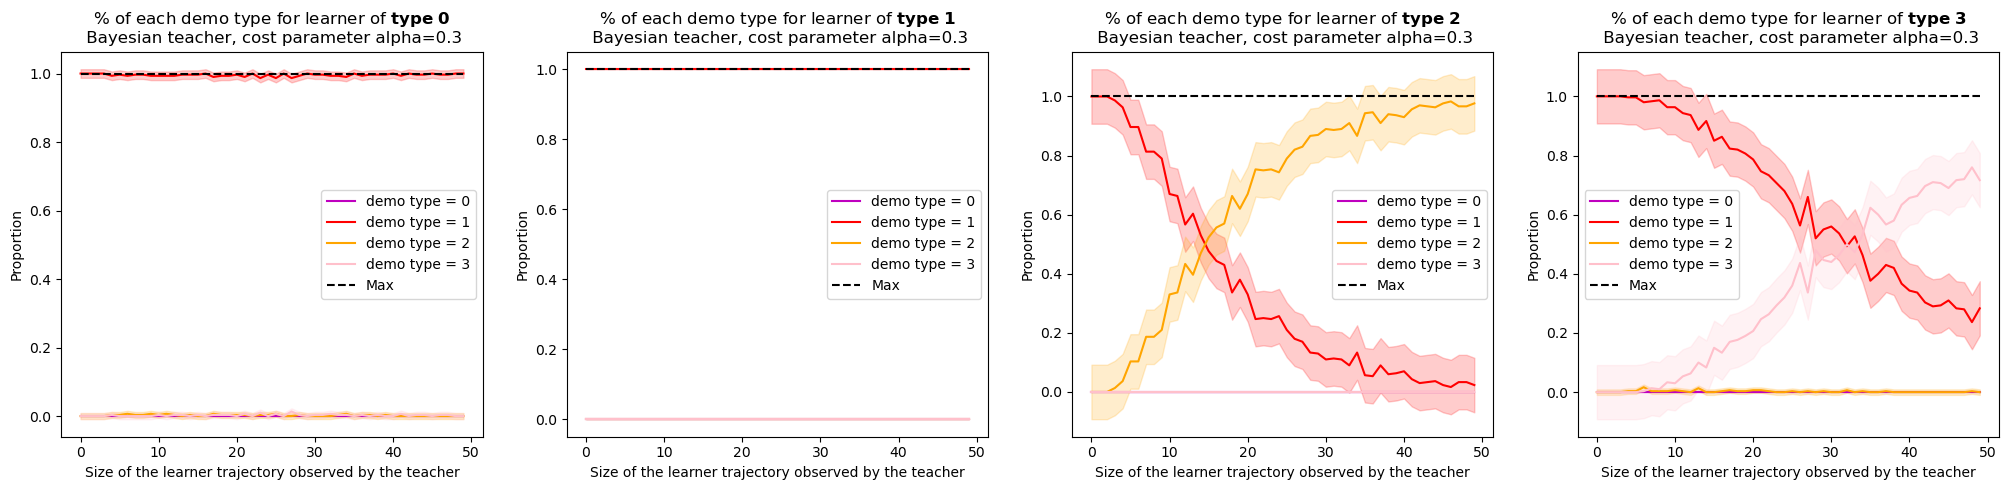

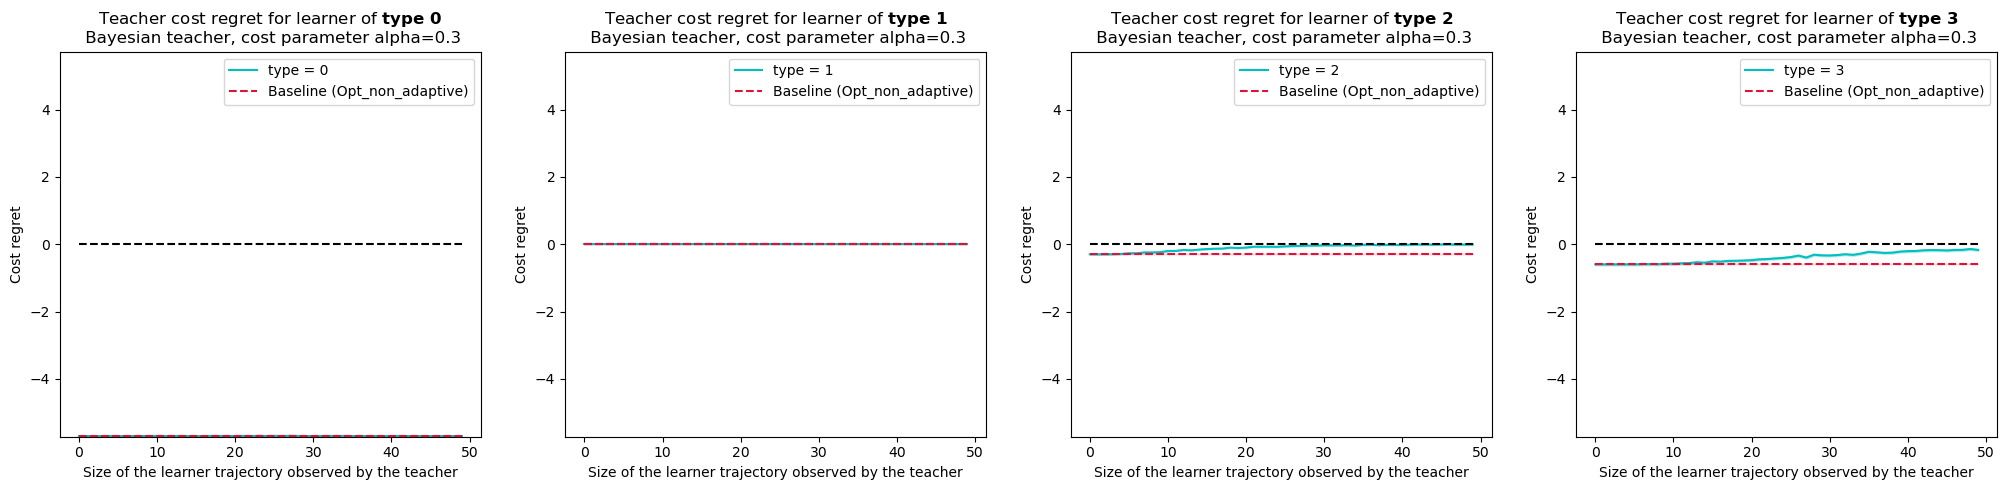

In [59]:
method, alpha = 'Bayesian', 0.3
display_evaluation(method, alpha)

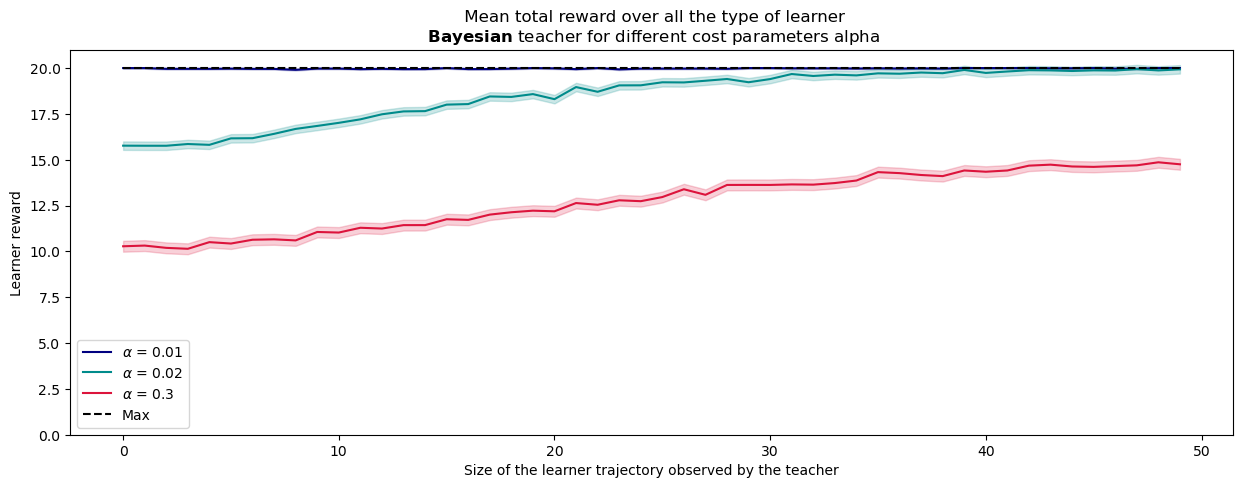

In [52]:
method = 'Bayesian'
colors = ['navy', 'darkcyan', 'crimson']
fig0 = plt.figure(figsize=(15,5))
for aa,alpha in enumerate([0.01, 0.02, 0.3]):
    if LOADED:
        alpha = str(alpha)
    # Mean over the type of learner of the total reward on trajectory of size 20  (after seen the demo chosen by the teacher)
    all_evals = np.array([DICT[method][alpha][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
    mean = np.mean(all_evals, axis=0)
    std = np.std(all_evals)

    plt.plot(mean, label=fr"$\alpha$ = {alpha}", color=colors[aa])
    plt.ylim(0, 21)
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[aa])
plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
plt.xlabel('Size of the learner trajectory observed by the teacher')
plt.ylabel('Learner reward')
plt.title(fr' Mean total reward over all the type of learner'  + f'\n $\mathbf{{{method}}}$ teacher for different cost parameters alpha')
plt.legend();

#### Uniform teacher

In [12]:
method = 'Uniform'
alpha_values = [0.03] #[0.01, 0.02] # Only to compute teacher regret

for alpha in alpha_values:
    evaluate(method, alpha) 

#### Optimal non adaptive teacher

In [26]:
method = 'Opt_non_adaptive'
alpha_values = [0.3] #[0.01, 0.02, 0.3]

for alpha in alpha_values:
    evaluate(method, alpha)

/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: divide by zero encountered in log2
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: invalid value encountered in multiply
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/learner.py:31: RuntimeWarning: invalid value encountered in divide
  updated_beliefs[a, :] /= updated_beliefs[a, :].sum()


#### Oracle

In [17]:
method = 'Oracle'
alpha_values = [0.01, 0.02, 0.3]

for alpha in alpha_values:
    evaluate(method, alpha)

#### Saving

In [19]:
save_output(DICT, './outputs/bayesian_ToM', 'teacher_eval')

### Tracking changeable learner

In [24]:
# Global evaluation parameters
# DICT_tracking = {}
# LOADED = False
DICT_tracking = load_output('/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/outputs/bayesian_ToM/teacher_eval_change_tracking.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 60

n_eval = 20

num_types = 4
num_demo_types = num_types

#### Experiments and display

In [25]:
def evaluate_tracking(changing_step: int, method: str, init_type: int, final_type: int, alpha: float=0.01, save: bool=True) -> None:
    if method not in DICT_tracking.keys():
        DICT_tracking[method] = {}
    DICT_tracking[method][changing_step] = {}
    DICT_tracking[method][changing_step]['rewards'] = []
    DICT_tracking[method][changing_step]['demo'] = []
    DICT_tracking[method][changing_step]['uncertainty'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            cum_rewards = []
            all_demo = []
            uncertainties = []
            for n in range(num_obs):
                # Init teacher
                if method == 'MAP' or method == 'Bayesian':
                    teacher = BaysesianTeacher(env=observation_env,
                                                num_types=num_types)
                elif method == 'Uniform' or method == 'Opt_non_adaptive':
                    teacher = NaiveTeacher(env=observation_env,
                                                num_types=num_types)
                # Init learner
                learner = Learner(init_type)
                learner.init_env(observation_env)
                if method == 'MAP' or method == 'Bayesian':
                    # Observe the learner
                    traj = learner.act(size = min(changing_step, n))
                    teacher.observe(traj)
                    if n > changing_step:
                        # Change learner type
                        learner.type = final_type
                        traj = learner.act(size = n - changing_step)
                        teacher.observe(traj)
                    # Teacher uncertainty
                    uncertainties.append(Shannon_entropy(teacher.beliefs))
                # Chose demonstration
                teacher.init_env(demonstration_env)
                demo = teacher.demonstrate(method=method, alpha=alpha)
                # Show the demonstration
                learner.init_env(demonstration_env)
                learner.observe(demo)
                # Evaluate hwo helpful has been the demonstration
                _, rewards = learner.act(size=n_eval)
                # Append 
                cum_rewards.append(np.sum(rewards))
                all_demo.append(len(demo[0]))
            DICT_tracking[method][changing_step]['rewards'].append(cum_rewards)
            DICT_tracking[method][changing_step]['demo'].append(all_demo)
            DICT_tracking[method][changing_step]['uncertainty'].append(uncertainties)

In [26]:
def display_tracking(method: str, init_type: int, final_type: int, alpha: float=0.01, save: bool=True) -> None:
    colors = ['indigo','orchid', 'hotpink', 'coral', 'red', 'brown']
    step_colors = ['indigo', 'purple', 'deeppink', 'orangered', 'darkred', 'saddlebrown']

    if method == 'MAP' or method == 'Bayesian':
        fig0, axes = plt.subplots(2, 1, figsize=(15,10))
    else:
        fig0, axes = plt.subplots(1, 1, figsize=(15,5))
        
    for ii, changing_step in enumerate(DICT_tracking[method].keys()):        
        if method == 'MAP' or method == 'Bayesian':
            ax = axes[0]
        else:
            ax = axes

        # Learner reward
        all_evals = DICT_tracking[method][changing_step]['rewards']
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        ax.plot(mean, label=f'changing step = {changing_step}', color=colors[ii])
        ax.set_ylim(0,21)
        ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
        ax.plot([int(changing_step)] * num_obs, np.linspace(0, 20, num_obs), ls='--', color=step_colors[ii])

        # Teacher uncertainty
        if method == 'MAP' or method == 'Bayesian':
            ax = axes[1]
            all_evals = DICT_tracking[method][changing_step]['uncertainty']
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)

            ax.plot(mean, label=f'changing step = {changing_step}', color=colors[ii])
            ax.set_ylim(- 0.5, Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
            ax.plot([int(changing_step)] * num_obs, np.linspace(-0.5, 10, num_obs), ls='--', color=step_colors[ii])

    if method == 'MAP' or method == 'Bayesian':
        ax = axes[0]
    else:
        ax = axes
    # Learner total reward on trajectory of size 20 (after seen the teacher demonstration)
    ax.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    ax.set_xlabel('Size of the learner trajectory observed by the teacher')
    ax.set_ylabel('Learner reward')
    ax.legend()

    if method == 'MAP' or method == 'Bayesian':
        # Teacher uncertainty (Shannon entropy)
        axes[1].plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        axes[1].set_xlabel('Size of the learner trajectory observed by the teacher')
        axes[1].set_ylabel('Teacher uncertainty')
        axes[1].legend()
    # Suptitle
    fig0.suptitle(fr' Demonstration chosen by $\mathbf{{{method}}}$ teacher ' + '\n' + \
        fr' Learner changing from type $\mathbf{{{init_type}}}$ to type $\mathbf{{{final_type}}}$')
    

    # Repartition btw type of demonstrations shown
    demo_colors = ['m', 'red', 'orange', 'pink']
    dict_length = len(DICT_tracking[method].keys())
    num_col = 3
    fig1, axes = plt.subplots(dict_length // num_col + 1 * (dict_length % num_col > 0), num_col, figsize=(20, 10))
    for ii, changing_step in enumerate(DICT_tracking[method].keys()):
        if dict_length > 1:
            ax = axes[ii // num_col, ii % num_col]
        else:
            ax = axes
        for demo_type in range(num_demo_types):
            demo_rep = np.array(DICT_tracking[method][changing_step]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == n_buttons)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
            ax.plot([int(changing_step)] * num_obs, np.linspace(0, 1, num_obs), ls='--', color=step_colors[ii])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'Learner changing from type {init_type} to type {final_type} ' + \
                      fr'at $\mathbf{{step}}$ $\mathbf{{{changing_step}}}$')

        ax.set_xlabel('Size of the learner trajectory observed by the teacher')
        ax.set_ylabel('Proportion')
        ax.legend()

    # Super figure
    figs = [fig0, fig1]
    saving_names = ['per_step','chosen_demo']
    if save:
        for ii, fig in enumerate(figs):
            fig.savefig(f'./bayesian_ToM/figures/{method}/eval_with_changing_learner_from_{init_type}_to_{final_type}_{saving_names[ii]}_{method}_{alpha}.png')
    


#### MAP teacher

In [ ]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'MAP', init_type=2, final_type=3)

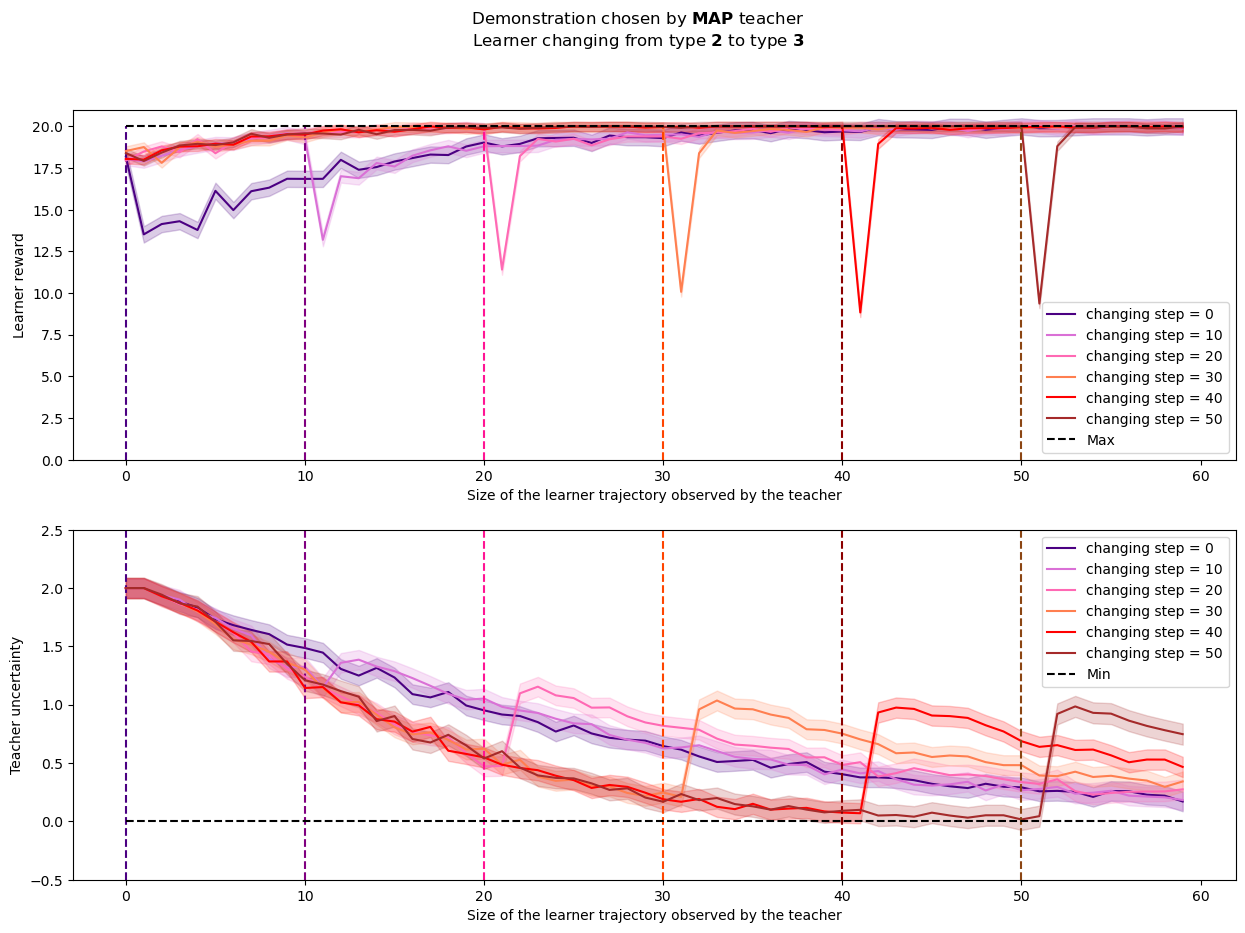

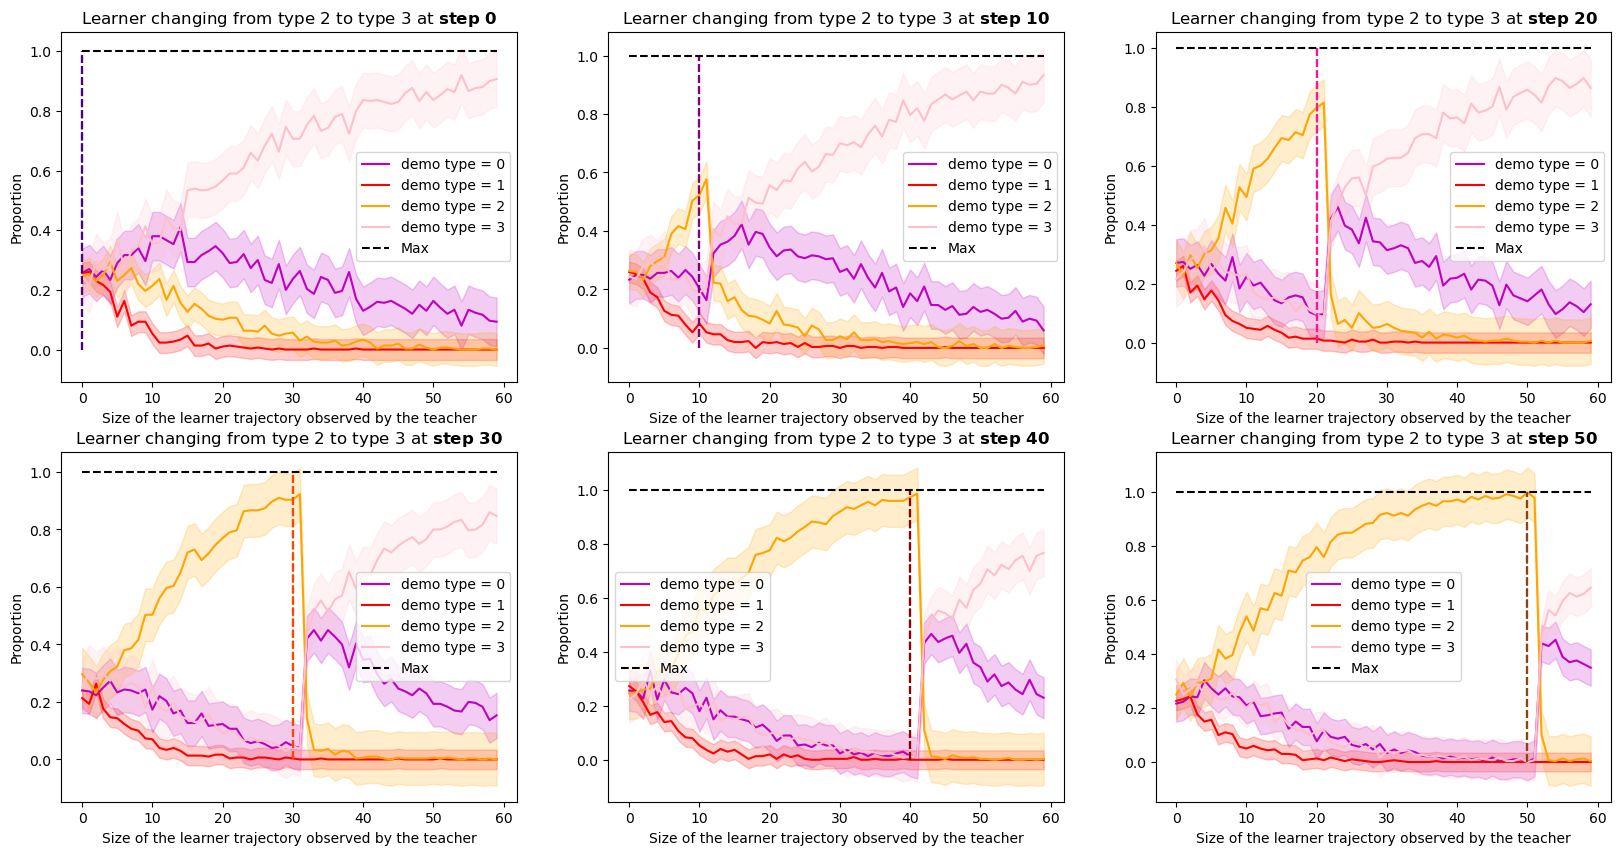

In [27]:
display_tracking('MAP', init_type=2, final_type=3)

#### Bayesian Teacher

In [31]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'Bayesian', init_type=2, final_type=3)

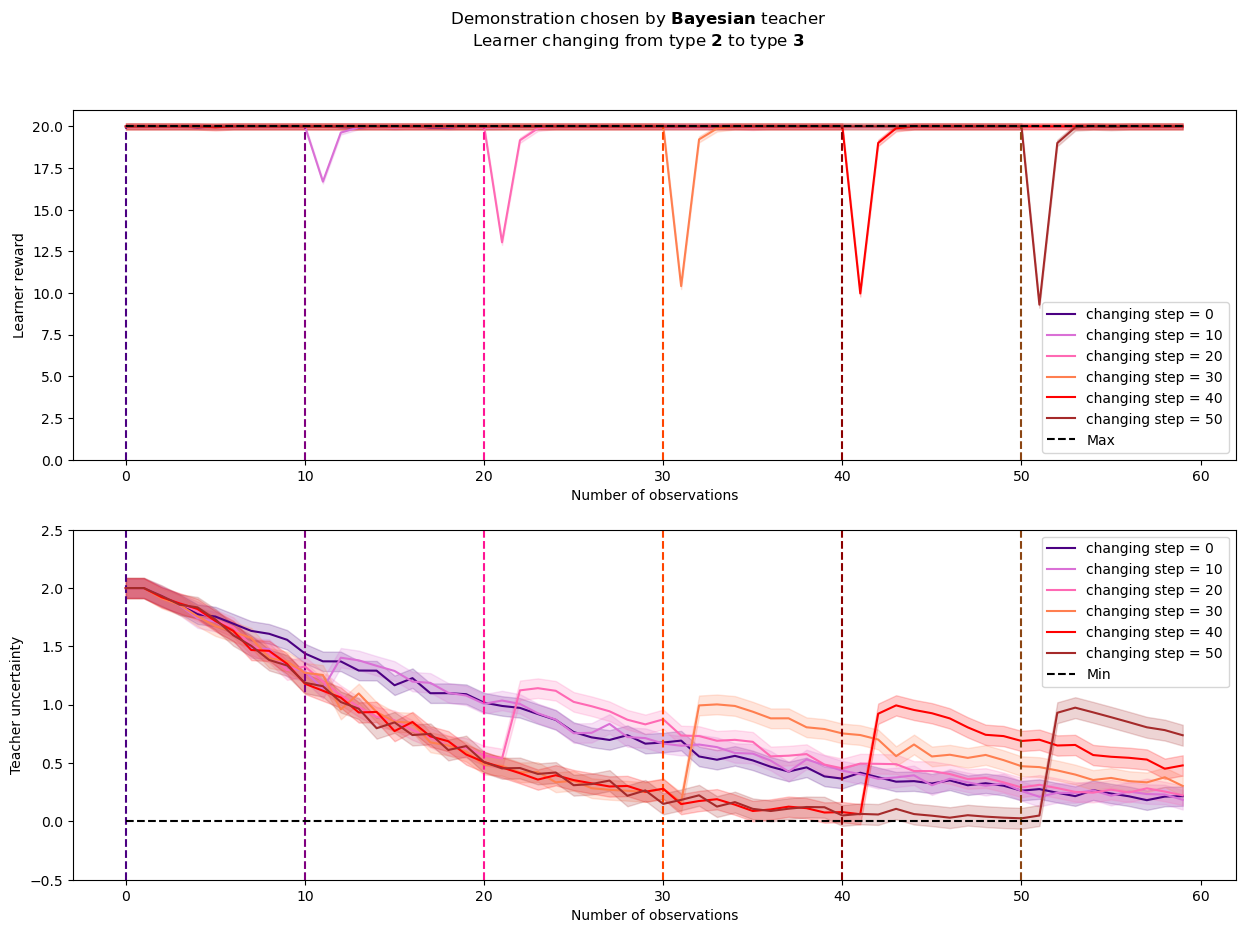

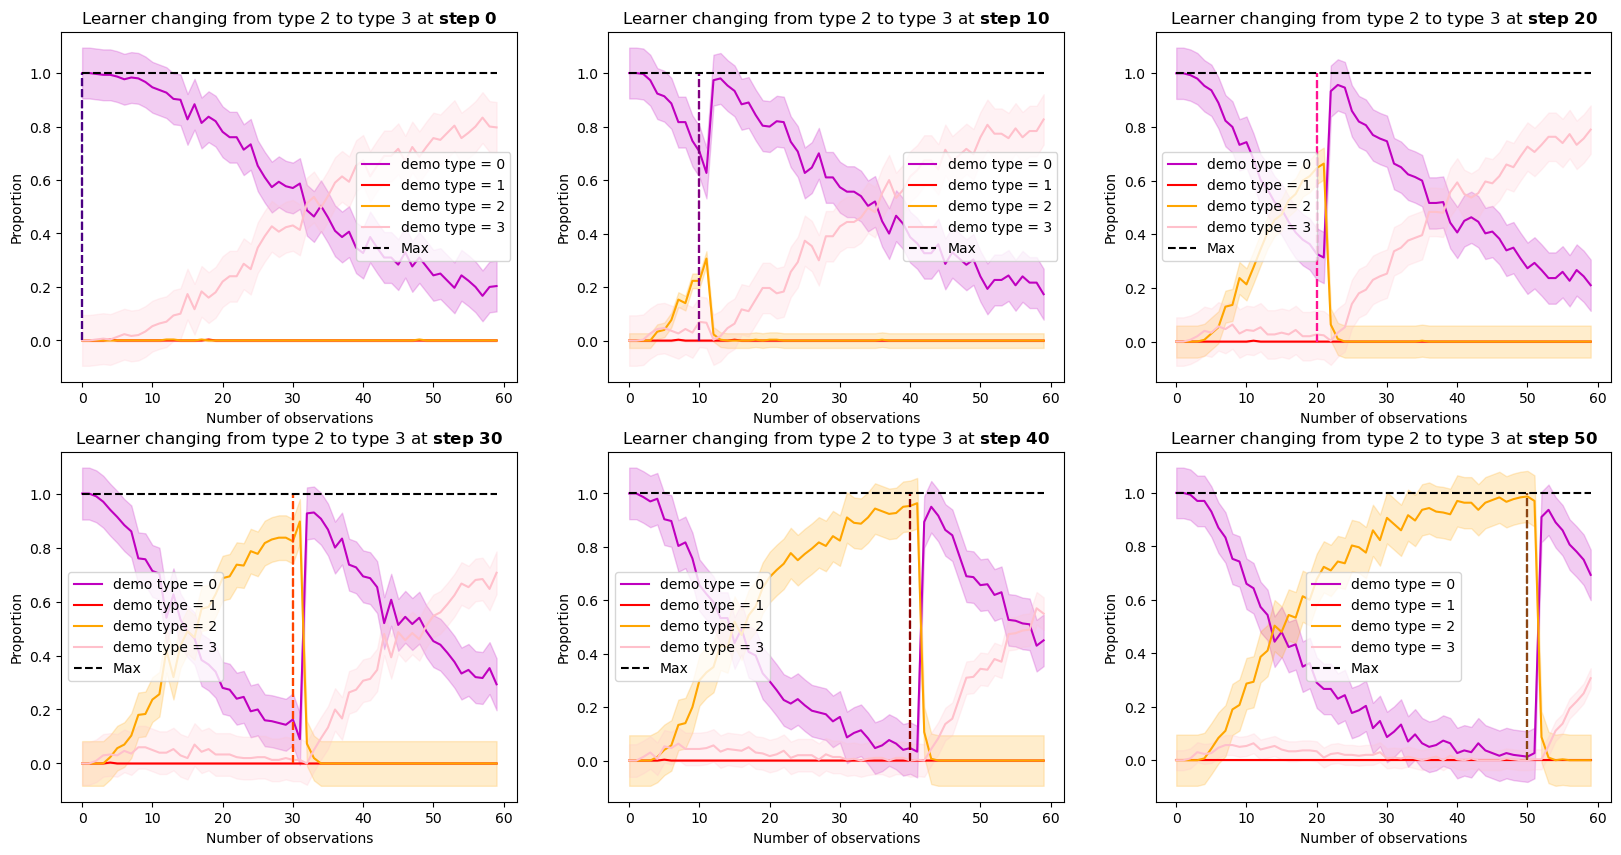

In [11]:
display_tracking('Bayesian', init_type=2, final_type=3)

#### Uniform teacher

In [33]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'Uniform', init_type=2, final_type=3)

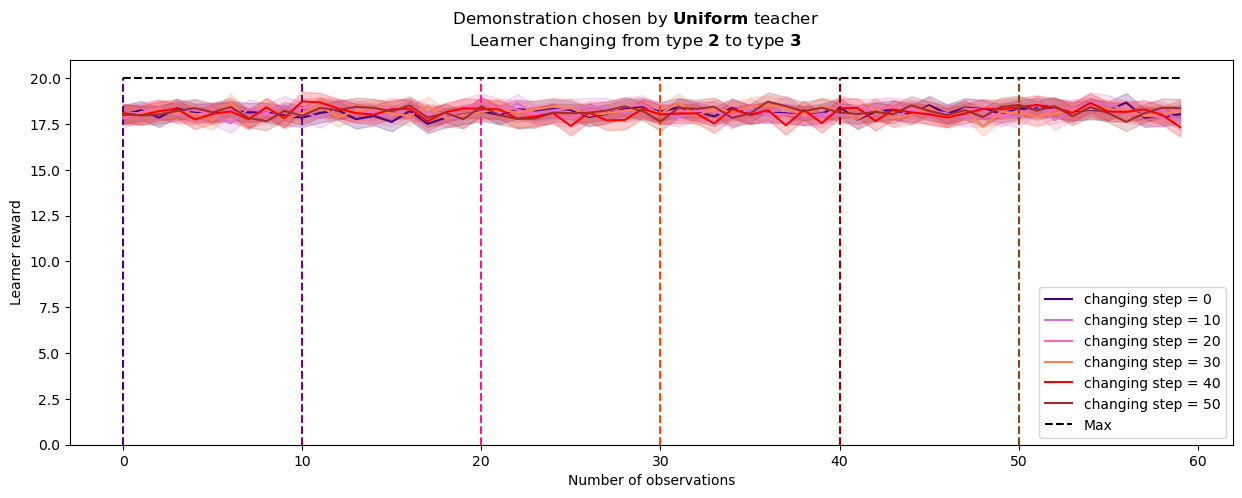

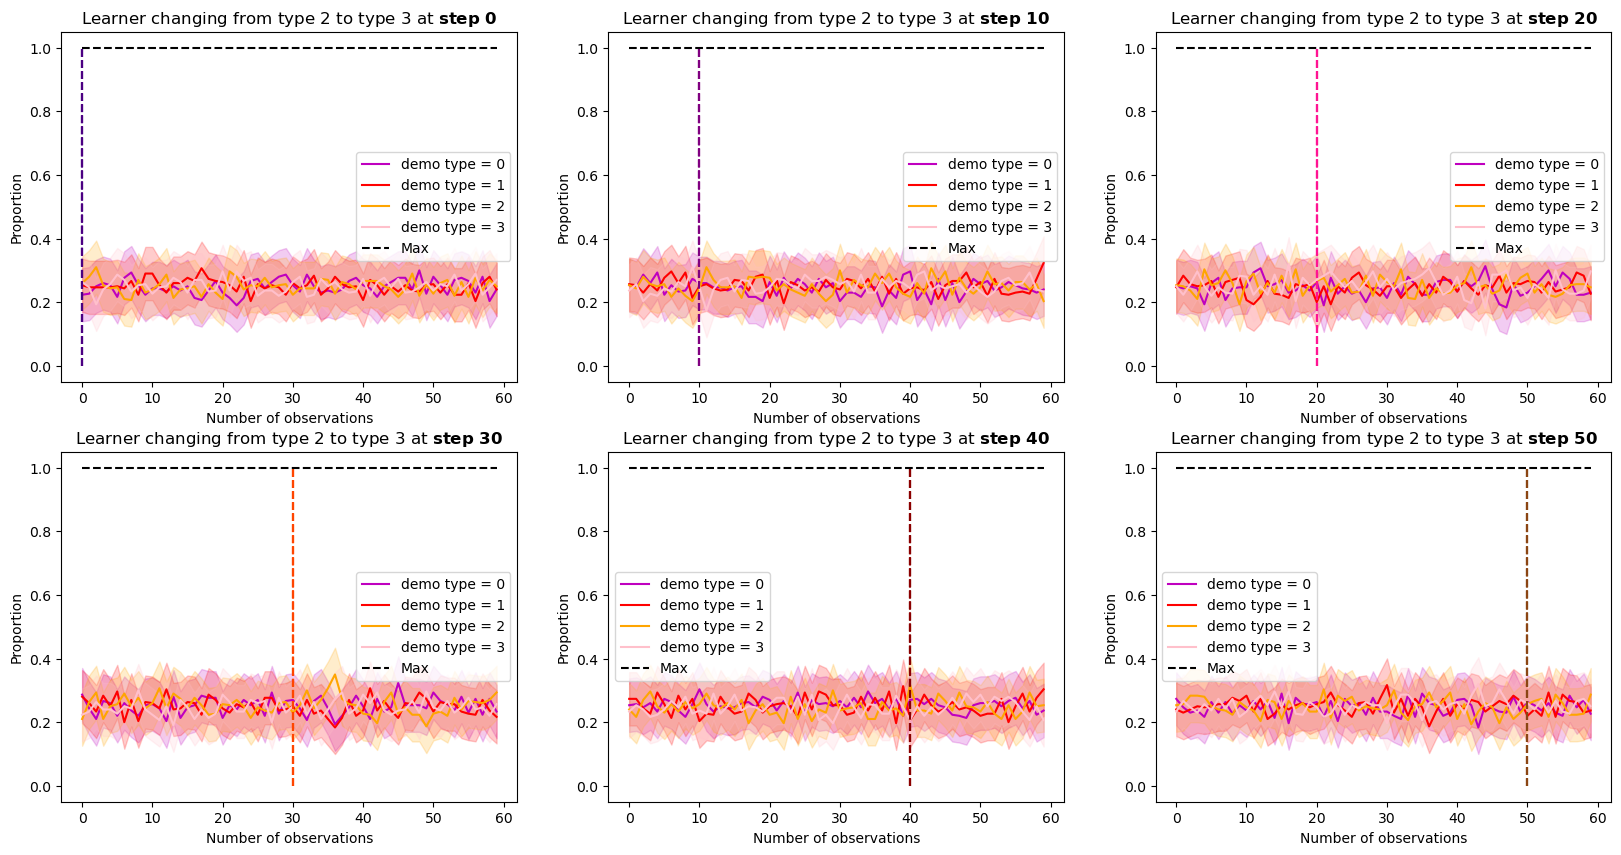

In [263]:
display_tracking('Uniform', init_type=2, final_type=3)

#### Optimal non adaptive teacher

In [35]:
changing_step_values = [0, 10, 20, 30, 40, 50]
for changin_step in changing_step_values:
    evaluate_tracking(changin_step, 'Opt_non_adaptive', init_type=2, final_type=3)

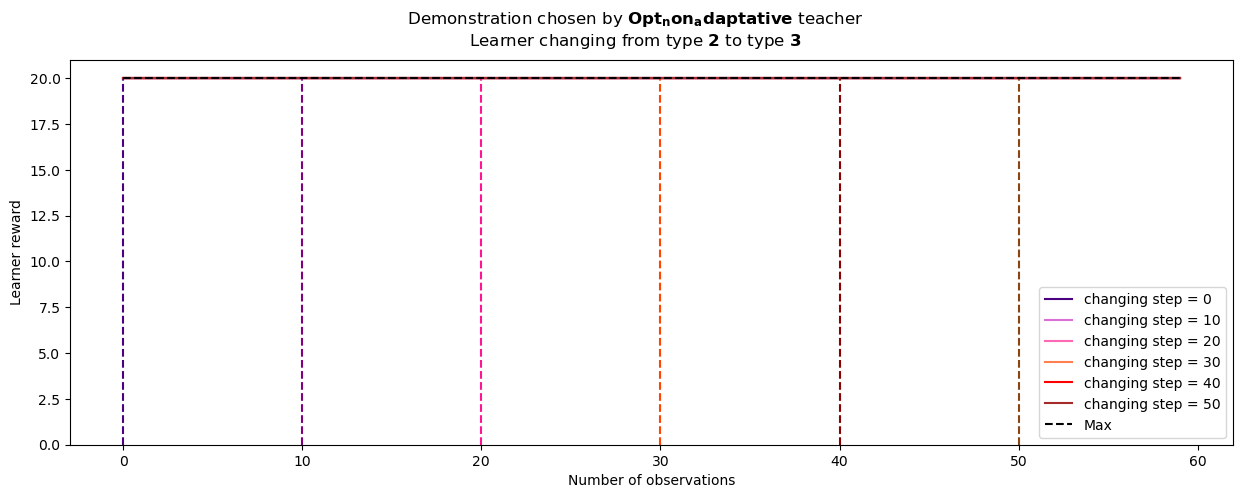

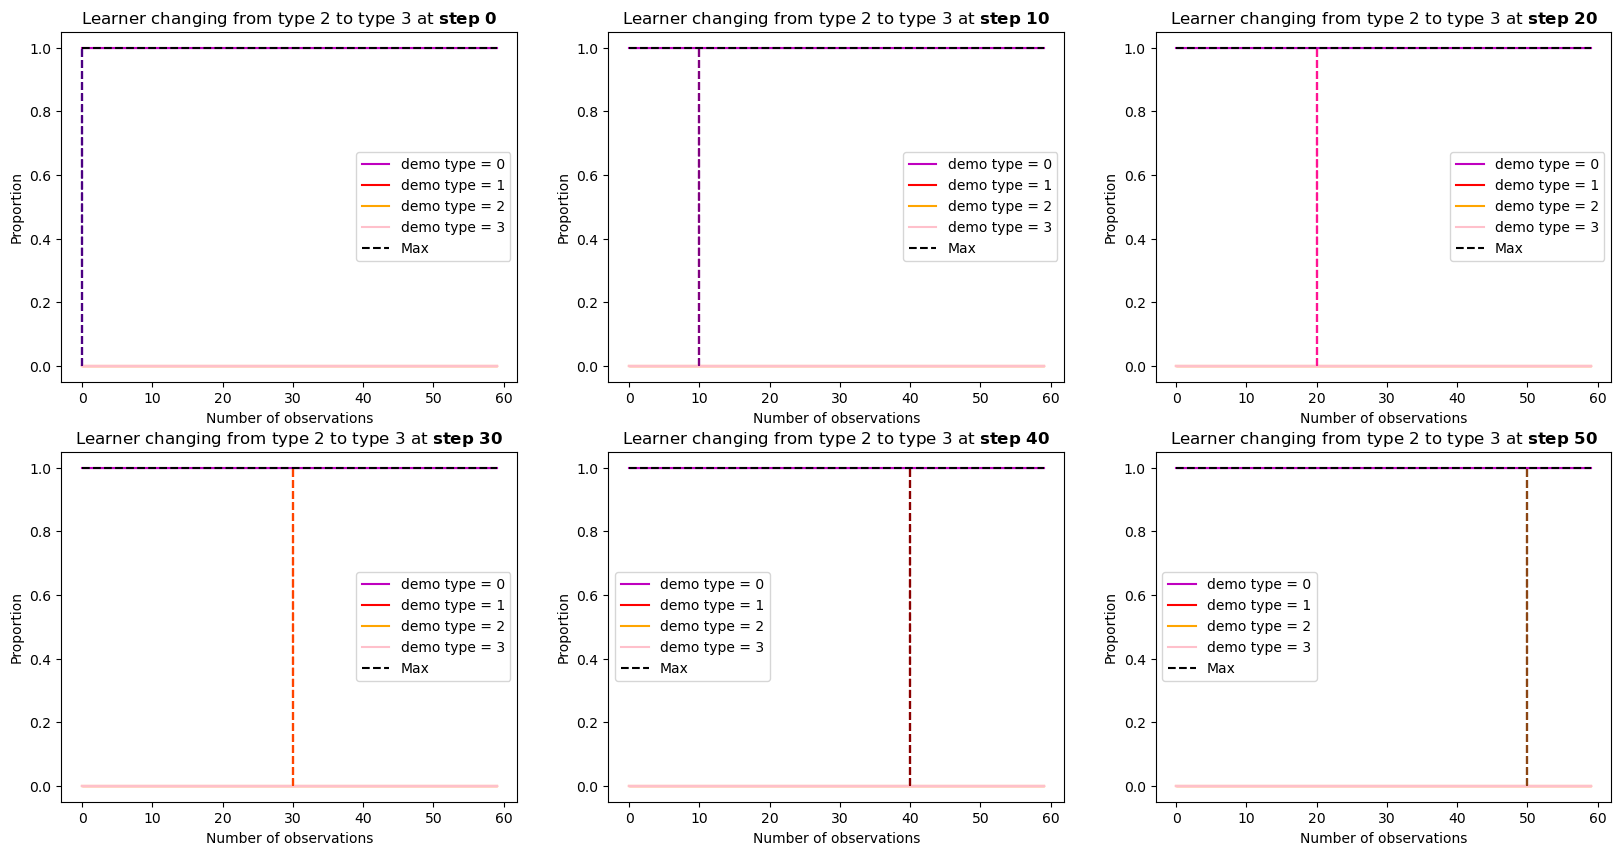

In [14]:
display_tracking('Opt_non_adaptive', init_type=2, final_type=3)

#### Saving

In [37]:
save_output(DICT_tracking, './outputs/bayesian_ToM', 'teacher_eval_change_tracking')

### Unknown learner type

Observation environment


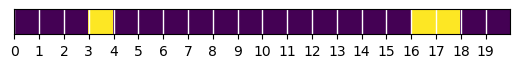

Demonstration environment


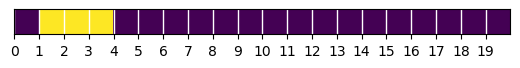

In [12]:
observation_env = ButtonsToy(n_buttons, n_music)
print('Observation environment')
observation_env.render()
plt.show()

demonstration_env = ButtonsToy(n_buttons, n_music)
print('Demonstration environment')
demonstration_env.render()
plt.show()

num_types = 3 # Remove learner of type 3 (and associated demo) from the support of the teacher beliefs
num_demo_types = num_types
unknown_type = 3

In [13]:
# Global evaluation parameters
# DICT_unknown = {}
# LOADED = False
DICT_unknown = load_output('./outputs/bayesian_ToM/teacher_eval_unknown_learner.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 100

n_eval = 20

#### Experiments and display

In [14]:
def evaluate_unknown(method: str, alpha: float) -> None:
    if method not in DICT_unknown.keys():
        DICT_unknown[method] = {}
    DICT_unknown[method][alpha] = {}
    DICT_unknown[method][alpha][unknown_type] = {}
    DICT_unknown[method][alpha][unknown_type]['rewards'] = []
    DICT_unknown[method][alpha][unknown_type]['demo'] = []
    DICT_unknown[method][alpha][unknown_type]['uncertainty'] = []
    DICT_unknown[method][alpha][unknown_type]['teacher_beliefs'] = []
    for _ in range(N_envs):
        # Init envs
        observation_env = ButtonsToy(n_buttons, n_music)
        demonstration_env = ButtonsToy(n_buttons, n_music)
        for _ in range(N):
            cum_rewards = []
            all_demo = []
            uncertainties = []
            teacher_beliefs = []
            for n in range(num_obs):
                # Init teacher
                if method == 'MAP' or method == 'Bayesian':
                    teacher = BaysesianTeacher(env=observation_env,
                                                num_types=num_types)
                elif method == 'Uniform' or method == 'Opt_non_adaptive':
                    teacher = NaiveTeacher(env=observation_env,
                                                num_types=num_types)
                # Init learner
                learner = Learner(unknown_type) # unknown type for the teacher
                learner.init_env(observation_env)
                if method == 'MAP' or method == 'Bayesian':
                    # Observe the learner
                    traj = learner.act(size=n)
                    teacher.observe(traj)
                    # Teacher uncertainty
                    uncertainties.append(Shannon_entropy(teacher.beliefs))
                    teacher_beliefs.append(teacher.beliefs)
                # Chose demonstration
                teacher.init_env(demonstration_env)
                demo = teacher.demonstrate(method=method, alpha=alpha)
                # Show the demonstration
                learner.init_env(demonstration_env)
                learner.observe(demo)
                # Evaluate hwo helpful has been the demonstration
                _, rewards = learner.act(size=n_eval)
                # Append
                cum_rewards.append(np.sum(rewards))
                all_demo.append(len(demo[0]))
            DICT_unknown[method][alpha][unknown_type]['rewards'].append(cum_rewards)
            DICT_unknown[method][alpha][unknown_type]['demo'].append(all_demo)
            DICT_unknown[method][alpha][unknown_type]['uncertainty'].append(uncertainties)
            DICT_unknown[method][alpha][unknown_type]['teacher_beliefs'].append(teacher_beliefs)

In [15]:
def display_evaluation_unknwon(method: str, alpha: float, save: bool=True):
    demo_colors = ['m', 'red', 'orange', 'pink']
    if LOADED:
        alpha = str(alpha)
        unknown_type_str = str(unknown_type)
    else:
        unknown_type_str = unknown_type

    suptitle = f'Evaluation of the {str(method)} teacher on unknwon learner type {unknown_type_str} (with cost parameter alpha={alpha})'
    centered_suptitle = suptitle.center(150)
    print(f"\033[1m" + centered_suptitle + f"\033[0m ")

    fig0 = plt.figure(figsize=(15,5))
    # Learner total reward on trajectory of size 20 (after seen the demo chosen by the teacher (unknown learner type)
    all_evals = np.array(DICT_unknown[method][alpha][unknown_type_str]['rewards'])
    mean = np.mean(all_evals, axis=0)
    std = np.std(all_evals)

    plt.plot(mean, label=f'mean')
    plt.ylim(0, 21)
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    
    # Baseline
    if method == 'MAP' or method == 'Bayesian':
        baseline = 'Uniform' if method == 'MAP' else 'Opt_non_adaptive'
        all_evals = np.array(DICT_unknown[baseline][alpha][unknown_type_str]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'Baseline ({baseline})', color='crimson')
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2, color='crimson')

    plt.title(fr'Learner total reward ' + '\n' + fr'$\mathbf{{{method}}}$ teacher for $\mathbf{{unknwon \quad learner \quad of \quad type \quad {unknown_type_str}}}$' + f'\n cost parameter alpha={alpha} (95% c.i)')

    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Learner reward')
    plt.legend()

    fig1 = plt.figure(figsize=(25,5))

    # Teacher uncertainty
    if method == 'MAP' or method == 'Bayesian':
        fig1.add_subplot(1,3,1)
        all_evals = np.array(DICT_unknown[method][alpha][unknown_type_str]['uncertainty'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean)
        plt.ylim(- 0.5 , Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        plt.title(fr'Teacher uncertainty ' + '\n' + fr'$\mathbf{{{method}}}$ teacher (95% c.i)')

        plt.xlabel('Size of the learner trajectory observed by the teacher')
        plt.ylabel('Teacher uncertainty (Shannon entropy)')
        plt.legend()

        fig1.add_subplot(1,3,2)
        # Teacher beliefs (per type of learner)
        for type in range(np.array(DICT_unknown[method][alpha][unknown_type_str]['teacher_beliefs']).shape[-1]):
            all_evals = np.array(DICT_unknown[method][alpha][unknown_type_str]['teacher_beliefs'])[:, :, type] ### TEST WARNING
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals, axis=0)

            plt.plot(mean, label=f'type = {type}')
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')
        plt.title(fr'Teacher beliefs per type of learner ' + '\n' + fr'$\mathbf{{{method}}}$ teacher (95% c.i)')

        plt.xlabel('Size of the learner trajectory observed by the teacher')
        plt.ylabel('Teacher beliefs')
        plt.legend()

    # Repartition btw type of demonstrations shown
    fig1.add_subplot(1,3,3)
    for demo_type in range(num_demo_types):
        demo_rep = np.array(DICT_unknown[method][alpha][unknown_type_str]['demo'])
        if demo_type == 0:
            prop_demo = np.array(demo_rep == n_buttons)
        else:
            prop_demo = np.array(demo_rep == demo_type)
        mean = np.mean(prop_demo, axis=0)
        std = np.std(prop_demo)

        plt.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
    plt.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

    plt.title(f'% of each demo type for learner of unknown $\mathbf{{type}}$ ' + fr'$\mathbf{{{unknown_type_str}}}$' + '\n' + f'{method} teacher, cost parameter alpha={alpha} (95% c.i)')
    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Proportion')
    plt.legend()

# Super figure
    figs = [fig0, fig1]
    saving_names = ['reward','chosen_demo']
    if save:
        for ii, fig in enumerate(figs):
            fig.savefig(f'./bayesian_ToM/figures/{method}/eval_with_unknown_learner_{saving_names[ii]}_{method}_{alpha}.png')

#### MAP teacher

In [16]:
method, alpha = 'MAP', 0.01
evaluate_unknown(method, alpha)

                               Evaluation of the MAP teacher on unknwon learner type 3 (with cost parameter alpha=0.01)                                


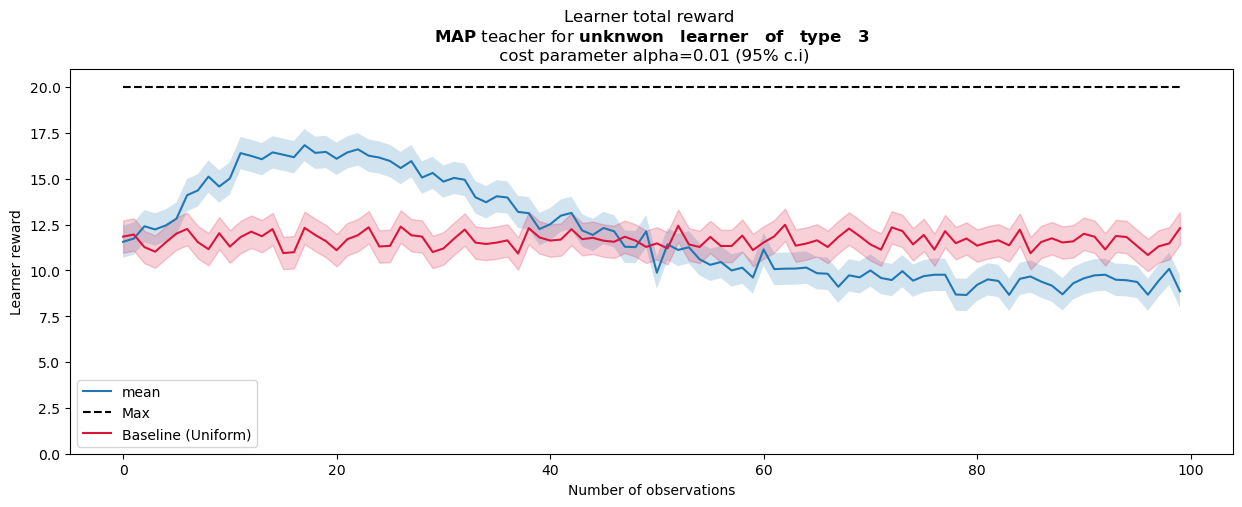

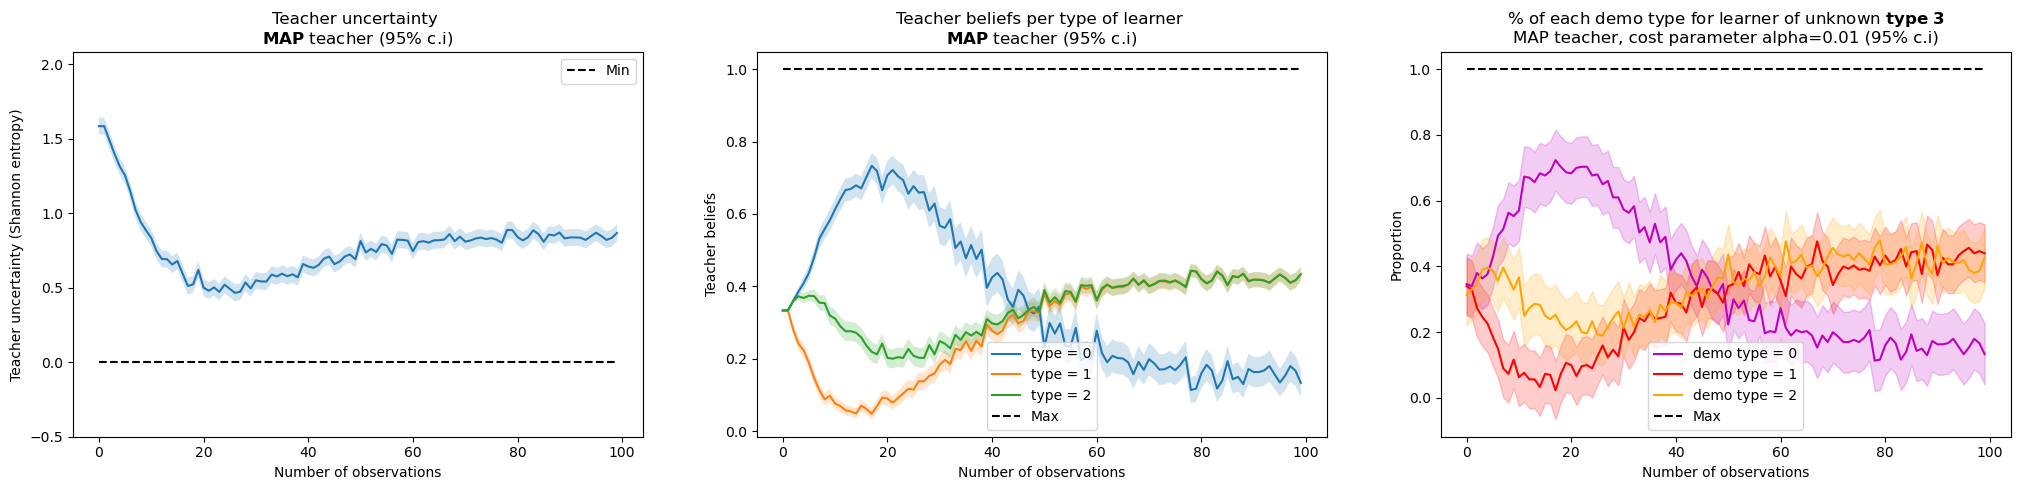

In [17]:
display_evaluation_unknwon('MAP', alpha, save=True)

#### Bayesian teacher

In [27]:
method, alpha = 'Bayesian', 0.01
evaluate_unknown(method, alpha)

                            Evaluation of the Bayesian teacher on unknwon learner type 3 (with cost parameter alpha=0.01)                              


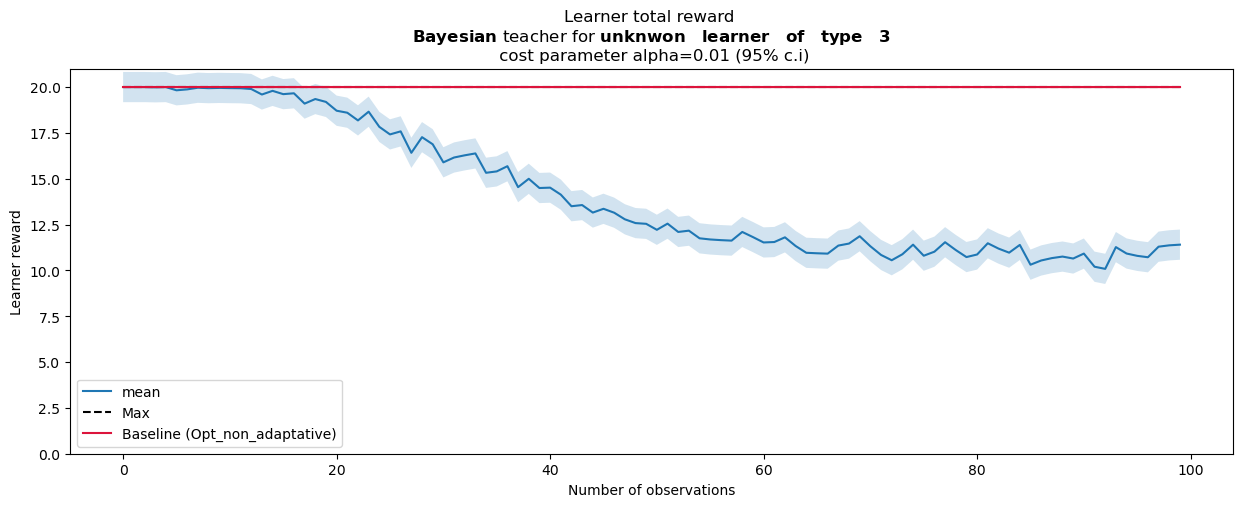

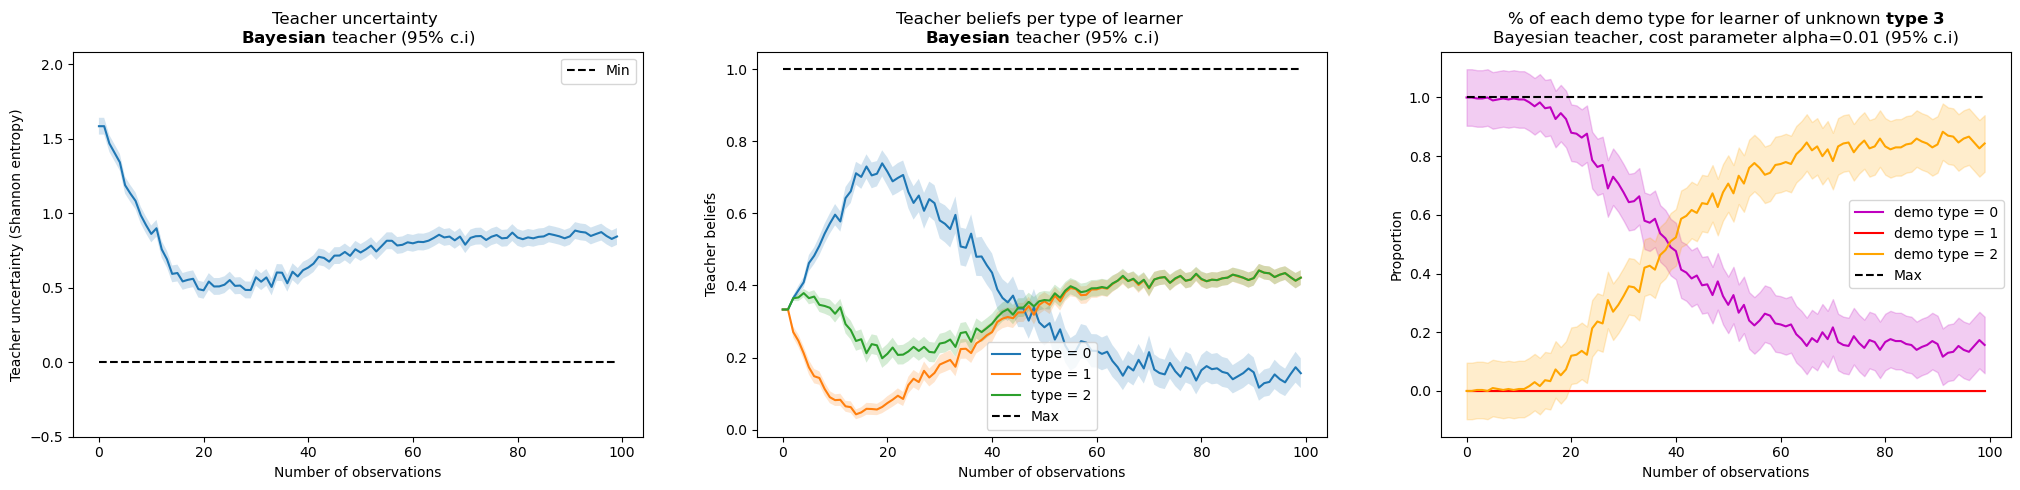

In [18]:
display_evaluation_unknwon('Bayesian', alpha, save=True)

#### Uniform teacher

In [28]:
method, alpha = 'Uniform', 0.01
evaluate_unknown(method, alpha)

#### Optimal non adaptive teacher

In [29]:
method, alpha = 'Opt_non_adaptive', 0.01
evaluate_unknown(method, alpha)

#### Saving

In [31]:
save_output(DICT_unknown, './outputs/bayesian_ToM', 'teacher_eval_unknown_learner')

## ToMNet Teacher

##### To do list
- evaluer model 'big_no_current_01.06.2023.19.12' 10 past trajectories no current (model WITHOUT mask /!\ )
- verifier modif model.py equivalent on big_single_no_current_08.06.2023.12.24
- launch training on pas trajectories with varying length big_single_no_current_varying_length
    - with mask (model.py)
    - without mask (model_with_mask.py)

In [6]:
import torch
import os

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tqdm import trange

from neural_network_ToM.dataset import ToMNetDataset
from neural_network_ToM.nn_utils import load_data, load_config

from neural_network_ToM.model import PredNet

from neural_network_ToM.storage import Storage
from torch.utils.data import DataLoader

In [7]:
# Settup parameters
num_types = 4
num_demo_types = num_types

In [8]:
criterion = 'loss'

# Load PreNet model
loading_path = './neural_network_ToM/model_weights/big_single_no_current_08.06.2023.12.24'
saving_name = loading_path[35:]
print(f'Saving statistics and figures at {saving_name}')

model_loading_path = os.path.join(loading_path, f'prednet_model_best_{criterion}.pt')
device = 'cpu'

model_config = load_config(os.path.join(loading_path, f'config_best_{criterion}.json'))
training_outputs = load_config(os.path.join(loading_path, 'outputs.json'))

# # Evaluation dataset with single past trajectory and empty current trajectory
# data_loading_path = os.path.join('neural_network_ToM', './data/eval_single')
# data_loading_path = os.path.join('neural_network_ToM', './data/eval_single_no_current')

data_loading_path = os.path.join('neural_network_ToM', model_config['data_path'])
config = load_config(os.path.join(data_loading_path, 'config_dataset.json'))

# Dataset parameters
n_buttons, n_music = config['n_buttons'], config['n_music']
num_past, max_steps, min_steps, max_steps_current = config['num_past'], config['max_steps'], config['min_steps'], config['max_steps_current']
n_agent_train, n_agent_val, n_agent_test = config['n_agent_train'], config['n_agent_val'], config['n_agent_test']

using_dist = config['true_types'] if 'true_types' in config.keys() else False
print(f'Dataset with true learner types: {using_dist}')

varying_length = config['varying_length'] if 'varying_length' in config.keys() else False
print(f'Observed past trajectories with varying length: {varying_length}') 

use_e_mental = not (max_steps_current == 0)
print(f'Using MentalNet block: {use_e_mental}')

print(f"\n \
      max_step: {max_steps} \n \
      num_past: {num_past} \n \
      max_steps_current: {max_steps_current} \n \
      \n \
      batch_size: {model_config['batch_size']} \n \
      e_char_dim: {model_config['e_char_dim']} \n \
      basic layer: {model_config['basic_layer']} \n")

prednet = PredNet(num_input=2,
                  num_step=max_steps, 
                  n_buttons=n_buttons,
                  num_output_char=model_config['e_char_dim'],
                  basic_layer= model_config['basic_layer'],
                  device=device,
                  use_e_mental=use_e_mental)

prednet.load_state_dict(torch.load(model_loading_path))

model_epochs = str(model_config['n_epochs'])
print(f"Best model in validation achieved in epoch {model_epochs}")
print(f"Train | Loss | {training_outputs['train'][model_epochs]['loss']:.4f} | Acc | {training_outputs['train'][model_epochs]['accuracy']:.4f} | " + \
      f"Val | Loss | {training_outputs['val'][model_epochs]['loss']:.4f} | Acc | {training_outputs['val'][model_epochs]['accuracy']:.4f} | ")

Saving statistics and figures at big_single_no_current_08.06.2023.12.24
Dataset with true learner types: False
Observed past trajectories with varying length: False
Using MentalNet block: False

       max_step: 50 
       num_past: 1 
       max_steps_current: 0 
       
       batch_size: 1 
       e_char_dim: 8 
       basic layer: ResConv 

Best model in validation achieved in epoch 27
Train | Loss | 1.8379 | Acc | 0.3491 | Val | Loss | 1.9770 | Acc | 0.2800 | 


In [9]:
tot_params = sum(p.numel() for p in prednet.parameters())
print(f'Working with ToMNet model with {tot_params} parameters')

Working with ToMNet model with 189308 parameters


In [10]:
# Load data
train_data = load_data(os.path.join(data_loading_path, 'train_dataset.pickle')) 
val_data = load_data(os.path.join(data_loading_path, 'val_dataset.pickle')) 
test_data = load_data(os.path.join(data_loading_path, 'test_dataset.pickle'))

In [11]:
train_dataset = ToMNetDataset(**train_data)
print('Training data {}'.format(len(train_data['target_actions'])))

val_dataset = ToMNetDataset(**val_data)
print('Validation data {}'.format(len(val_data['target_actions'])))

test_dataset = ToMNetDataset(**test_data)
print('Test data {}'.format(len(test_data['target_actions'])))

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

Training data 16000
Validation data 1600
Test data 1600


#### Training curves

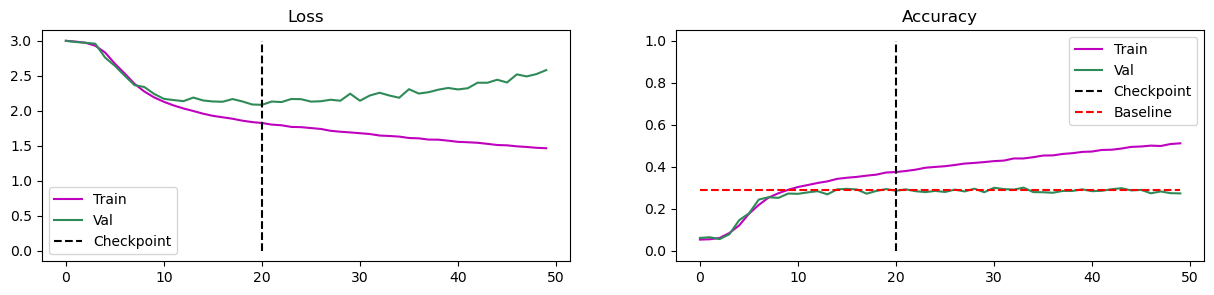

In [36]:
all_train_loss = []
all_train_acc = []

all_val_loss = []
all_val_acc = []
all_val_dist = []

max_true_acc = (1 + 1/2 + 1/3 + 1/3 + 1/20 + 1/2 + 1/3 + 1/3 + 1/20 + 1/20 + 1/3 + 1/3 + 1/20 + 1/20 + 1/20 + 1/3) / 16

N = 50

for epoch in range(N):
    all_train_loss.append(training_outputs['train'][str(epoch)]['loss'])
    all_train_acc.append(training_outputs['train'][str(epoch)]['accuracy'])

    all_val_loss.append(training_outputs['val'][str(epoch)]['loss'])
    all_val_acc.append(training_outputs['val'][str(epoch)]['accuracy'])
    if using_dist:
        all_val_dist.append(training_outputs['val'][str(epoch)]['dist'])

if using_dist:
    ff = 3
else:
    ff = 2

fig = plt.figure(figsize=(15, 3))

fig.add_subplot(1,ff,1)
plt.plot(np.arange(N), all_train_loss, label='Train', c='m')
plt.plot(np.arange(N), all_val_loss, label='Val', c='seagreen')
plt.plot([model_config['n_epochs']] * N, np.linspace(0,np.max(all_val_loss), N), ls='--', label='Checkpoint', c='k')
plt.title('Loss')
plt.legend()

fig.add_subplot(1,ff,2)
plt.plot(np.arange(N), all_train_acc, label='Train', c='m')
plt.plot(np.arange(N), all_val_acc, label='Val', c='seagreen')
plt.plot([model_config['n_epochs']] * N, np.linspace(0,1, N), ls='--', label='Checkpoint', c='k')
plt.plot(np.arange(N), [max_true_acc] * N, ls='--', label='Baseline', c='red')
plt.title('Accuracy')
plt.legend()

if using_dist:
    fig.add_subplot(1,ff,3)
    plt.plot(np.arange(N), all_val_dist, label='Val', c='seagreen')
    plt.plot([model_config['n_epochs']] * N, np.linspace(0,1, N), ls='--', label='Checkpoint', c='k')
    plt.title('Square error btw the true and the predicted policy')
    plt.legend();

fig.savefig(f"./neural_network_ToM/figures/Training_curves/{saving_name}_e_char_dim_{model_config['e_char_dim']}_{criterion}.png")

#### Utils (distances and data preprocessing)

In [12]:
# Remove zero-padding and one-hot encoding 
def process_demo(demo: np.ndarray) -> np.ndarray:
    processed_demo = []
    for step in demo:
        if np.all(step == 0):
            break
        else:
            a = np.where(step[:, 0] == 1)[0][0] if not np.all(step[:, 0]==0) else 0
            r = int(step[0, 1])
            processed_demo.append([a, r])

    return np.array(processed_demo)

# Compute the true policy ONLY IF THE TRAJECTORY ON THE CURRENT ENV IS EMPTY (config['max_steps_current']==0)
def compute_true_policy(type: int, demo: np.ndarray) -> np.ndarray:
    processed_demo =  process_demo(demo)

    policy = np.zeros(n_buttons)
    given_musical_idx = processed_demo[np.where(processed_demo[:, 1] == 1)[0], 0]
    policy[given_musical_idx] = np.ones(len(given_musical_idx))
    policy /= policy.sum()

    if len(processed_demo) == 3:
        if type == 0:
            policy = np.ones(n_buttons) / n_buttons
            
    elif len(processed_demo) == 2:
        if type == 0 or type == 3:
            policy = np.ones(n_buttons) / n_buttons

    elif len(processed_demo) == 1:
        if type == 0 or type == 3 or type == 2:
            policy = np.ones(n_buttons) / n_buttons

    return policy

def L2_dist(pred_policy: np.ndarray, true_policy: np.ndarray) -> float:
    return np.sqrt(((pred_policy - true_policy)**2).sum())

def L1_dist(pred_policy: np.ndarray, true_policy: np.ndarray) -> float:
    return (np.abs(pred_policy - true_policy)).sum()

def MSE_dist(pred_policy: np.ndarray, true_policy: np.ndarray) -> float:
    return np.sum((pred_policy - true_policy)**2) / len(pred_policy)

def SE_dist(pred_policy: np.ndarray, true_policy: np.ndarray) -> float:
    return np.sum((pred_policy - true_policy)**2)

#### Evaluation with batch size of 1

In [23]:
# Eval on training set
train_dict = prednet.evaluate(train_loader)
# Eval on validation set
val_dict = prednet.evaluate(val_loader)
# Eval on test set
test_dict = prednet.evaluate(test_loader)

100%|██████████| 1600/1600 [00:06<00:00, 237.01it/s]


In [24]:
train_msg ='Eval on train | Loss | {:.4f} | Acc | {:.4f} |'.format(train_dict['loss'], train_dict['accuracy'])
print(train_msg)

val_msg ='Eval on val | Loss | {:.4f} | Acc | {:.4f} |'.format(val_dict['loss'], val_dict['accuracy'])
print(val_msg)

test_msg ='Eval on test | Loss | {:.4f} | Acc | {:.4f} |'.format(test_dict['loss'], test_dict['accuracy'])
print(test_msg)

Eval on train | Loss | 1.7761 | Acc | 0.3719 |
Eval on val | Loss | 1.9770 | Acc | 0.2800 |
Eval on test | Loss | 1.9929 | Acc | 0.2750 |


#### Vizualize inference

In [13]:
distance = SE_dist

In [14]:
idx = 627

if using_dist:
    past_traj, current_traj, demo, target_action, true_idx_music, _ = test_dataset[idx]
else:
    past_traj, current_traj, demo, target_action, true_idx_music = test_dataset[idx]
type = idx // (n_agent_test * num_demo_types)

print(f'Learner of type {type}')

Learner of type 1


In [15]:
def display_traj(traj):
    l = []
    for step in traj:
        a = np.where(step[:, 0] == 1)[0][0] if not np.all(step[:, 0]==0) else 0
        print(f'({a},{int(step[0, 1])})', end='')

In [16]:
for nn in range(len(past_traj)):
    print(f'Past traj {nn}:', end='')
    display_traj(past_traj[nn])
    print()

Past traj 0:(0,0)(2,0)(1,0)(16,0)(3,0)(14,0)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)(15,1)


In [17]:
print('Current traj: ', end='')
display_traj(current_traj)

Current traj: (0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)

In [18]:
print('Demo: ', end='')
display_traj(demo)

Demo: (16,1)(19,1)(12,1)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)(0,0)

In [19]:
past_traj_tensor = torch.from_numpy(past_traj[None,...])
current_traj_tensor = torch.from_numpy(current_traj[None,...])
demo_tensor = torch.from_numpy(demo[None,...])

pred_action, e_char, e_mental, e_demo = prednet(past_traj_tensor, current_traj_tensor, demo_tensor)

In [20]:
pred_policy = np.exp((pred_action).detach().numpy())
pred_policy /= pred_policy.sum()


       Type: 1 
       Demo: [[16, 1], [19, 1], [12, 1]]

       SE_dist distance: 0.1362

       Predicted reward: 0.9661


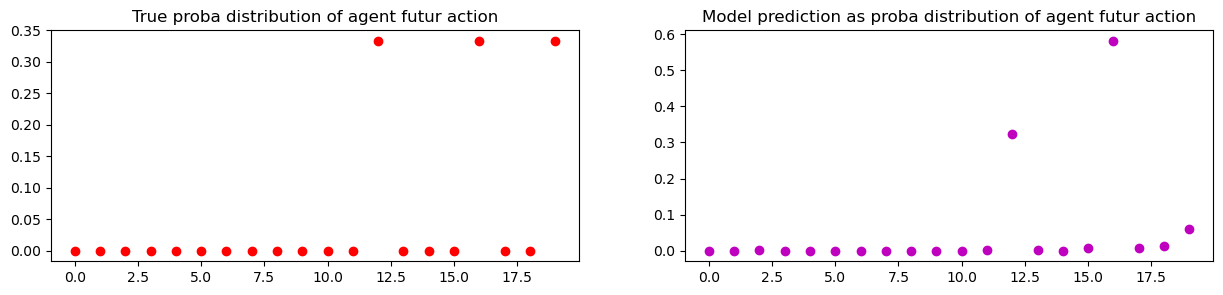

In [21]:
print(f'\n \
      Type: {type} \n \
      Demo: {process_demo(demo).tolist()}')
true_policy = compute_true_policy(type, demo)

fig = plt.figure(figsize=(15, 3))

fig.add_subplot(1, 2, 1)
plt.scatter(np.arange(20), true_policy, c='r')
plt.title('True proba distribution of agent futur action')

fig.add_subplot(1, 2, 2)
plt.scatter(np.arange(20), pred_policy, c='m')
plt.title('Model prediction as proba distribution of agent futur action')

print(f'\n \
      {distance.__name__} distance: {distance(pred_policy, true_policy):.4f}')

env_R = np.zeros(n_buttons)
env_R[np.array(true_idx_music, dtype=int)] = np.ones(n_music)
print(f'\n \
      Predicted reward: {(pred_policy * env_R).sum():.4f}');

In [22]:
print('Sorted buttons wrt predicted proba dist:', np.argsort(pred_policy)[0].tolist())

Sorted buttons wrt predicted proba dist: [9, 5, 10, 4, 7, 8, 6, 3, 14, 0, 1, 2, 13, 11, 15, 17, 18, 19, 12, 16]


In [23]:
print(f'\n \
      True action {int(target_action)} \n \
      Pred action {np.argmax((pred_action).detach().numpy())}')


       True action 12 
       Pred action 16


In [24]:
# Worse prediction
max_idx = np.argsort(dict_metric['error_dist'].ravel())[-10:]

print('Ravelled idx', max_idx)
unravel_max_idx = np.unravel_index(max_idx, (num_types, num_demo_types, n_agent_test))
print(f"Distance {np.round(dict_metric['error_dist'][unravel_max_idx], 4).tolist()})")

unravel_idx = np.array(unravel_max_idx)[:, 3]
idx = unravel_idx[0] * n_agent_test * num_demo_types + unravel_idx[2] * num_demo_types + unravel_idx[1]
print('idx:', idx)

NameError: name 'dict_metric' is not defined

### Further stat

In [50]:
distance = SE_dist
alpha = 0.01

dict_metric = {}
dict_metric['entropy'] = np.zeros((num_types, num_demo_types, n_agent_test))
dict_metric['loss'] = np.zeros((num_types, num_demo_types, n_agent_test))
dict_metric['accuracy'] = np.zeros((num_types, num_demo_types, n_agent_test))
dict_metric['metric_in'] = np.zeros((num_types, num_demo_types, n_agent_test))

dict_metric['e_char'] = np.zeros((num_types, num_demo_types, n_agent_test, model_config['e_char_dim']))
dict_metric['error_dist'] = np.zeros((num_types, num_demo_types, n_agent_test))
dict_metric['pred_reward'] = np.zeros((num_types, num_demo_types, n_agent_test))

n_agent = n_agent_test
dataset = test_dataset

for type in range(num_types):
    for n in range(n_agent):
        for demo_type in range(num_demo_types):
            idx = type * n_agent * num_demo_types + n * num_demo_types + demo_type

            if using_dist:
                past_traj, current_traj, demo, target_action, true_idx_music, _ = dataset[idx]
            else:
                past_traj, current_traj, demo, target_action, true_idx_music = dataset[idx]

            # Convert into tensors
            past_traj_tensor = torch.from_numpy(past_traj[None,...])
            current_traj_tensor = torch.from_numpy(current_traj[None,...])
            demo_tensor = torch.from_numpy(demo[None,...])
            target_action_tensor = torch.from_numpy(target_action[None,...]).long()

            # Sanity check
            if demo_type == 0:
                assert(np.any(np.array(demo_tensor[0,:,:,0] != 0), axis=1).sum() == n_buttons)
            else:
                assert(np.any(np.array(demo_tensor[0,:,:,0] != 0), axis=1).sum() == demo_type)

            # Model inference
            pred_action, e_char, e_mental, e_demo = prednet(past_traj_tensor, current_traj_tensor, demo_tensor)
            # Compute metrics
            pred_policy = np.exp(pred_action.detach().numpy()) / np.exp(pred_action.detach().numpy()).sum()
            dict_metric['accuracy'][type, demo_type, n] = np.argmax(pred_policy) == target_action
            dict_metric['loss'][type, demo_type, n] = torch.nn.NLLLoss()(pred_action, target_action_tensor)
            dict_metric['entropy'][type, demo_type, n] = Shannon_entropy(pred_policy)
            dict_metric['metric_in'][type, demo_type, n] = np.argmax(pred_policy) in true_idx_music
            env_R = np.zeros(n_buttons)
            env_R[np.array(true_idx_music, dtype=int)] = np.ones(n_music)
            dict_metric['pred_reward'][type, demo_type, n] = (pred_policy * env_R).sum()
            if model_config['basic_layer'] == 'ResConv':
                dict_metric['e_char'][type, demo_type, n, :] = e_char[:,:,0].detach().numpy()
            if model_config['basic_layer'] == 'Linear':
                dict_metric['e_char'][type, demo_type, n, :] = e_char.detach().numpy()

            if config['max_steps_current'] == 0:
                true_policy = compute_true_policy(type, demo)
                dist = distance(pred_policy, true_policy)
                dict_metric['error_dist'][type, demo_type, n] = dist

In [51]:
image_entropy = np.zeros((4, 4))
image_pourcentage_musical = np.zeros((4, 4))
image_error_dist = np.zeros((4, 4))
image_pred_reward = np.zeros((4, 4))
image_pred_utility = np.zeros((4, 4))

for type in range(num_types):
    print()
    for demo_type in range(num_demo_types):
        print(f"\033[1mLearner\033[0m {type} demo {demo_type} : " + \
              f"\033[1mLoss\033[0m | {np.mean(dict_metric['loss'][type, demo_type, :]):.4f} +/- {1.96 * np.std(dict_metric['loss'][type, demo_type, :]) / n_agent:.4f} | " +  \
              f"\033[1mAccuracy\033[0m | {np.mean(dict_metric['accuracy'][type, demo_type, :]):.4f} +/- {1.96 * np.std(dict_metric['accuracy'][type, demo_type, :]) / n_agent:.4f} | " + \
              f"\033[1mPrediction entropy\033[0m | {np.mean(dict_metric['entropy'][type, demo_type, :]):.4f} +/- {1.96 * np.std(dict_metric['entropy'][type, demo_type, :]) / n_agent:.4f} | " + \
              f" \033[1m% pred action in musical idx\033[0m | {np.mean(dict_metric['metric_in'][type, demo_type, :]):.4f} +/- {1.96 * np.std(dict_metric['metric_in'][type, demo_type, :]) / n_agent:.4f} |" + \
              f" \033[1mMean predicted reward idx\033[0m | {np.mean(dict_metric['pred_reward'][type, demo_type, :]):.4f} +/- {1.96 * np.std(dict_metric['pred_reward'][type, demo_type, :]) / n_agent:.4f} |" +\
              f" \033[1mMean {distance.__name__} btw true and predicted policies \033[0m | {np.mean(dict_metric['error_dist'][type, demo_type, :]):.4f} +/- {1.96 * np.std(dict_metric['error_dist'][type, demo_type, :]) / n_agent:.4f} |")
        
        image_entropy[type, demo_type] = np.mean(dict_metric['entropy'][type, demo_type, :])
        image_pourcentage_musical[type, demo_type] = np.mean(dict_metric['metric_in'][type, demo_type, :])
        image_error_dist[type, demo_type] = np.mean(dict_metric['error_dist'][type, demo_type, :])
        image_pred_reward[type, demo_type] = np.mean(dict_metric['pred_reward'][type, demo_type, :])
        len_demo = n_buttons if demo_type == 0 else demo_type
        image_pred_utility[type, demo_type] = np.mean(dict_metric['pred_reward'][type, demo_type, :]) - alpha * len_demo


Learner 0 demo 0 : Loss | 1.9742 +/- 0.0260 | Accuracy | 0.2700 +/- 0.0087 | Prediction entropy | 1.8734 +/- 0.0116 |  % pred action in musical idx | 0.9900 +/- 0.0020 | Mean predicted reward idx | 0.8421 +/- 0.0024 | Mean SE_dist btw true and predicted policies  | 0.1931 +/- 0.0026 |
Learner 0 demo 1 : Loss | 2.9895 +/- 0.0023 | Accuracy | 0.0400 +/- 0.0038 | Prediction entropy | 4.3115 +/- 0.0001 |  % pred action in musical idx | 0.1700 +/- 0.0074 | Mean predicted reward idx | 0.1519 +/- 0.0002 | Mean SE_dist btw true and predicted policies  | 0.0007 +/- 0.0000 |
Learner 0 demo 2 : Loss | 3.0108 +/- 0.0031 | Accuracy | 0.0400 +/- 0.0038 | Prediction entropy | 4.2958 +/- 0.0013 |  % pred action in musical idx | 0.2800 +/- 0.0088 | Mean predicted reward idx | 0.1620 +/- 0.0006 | Mean SE_dist btw true and predicted policies  | 0.0020 +/- 0.0001 |
Learner 0 demo 3 : Loss | 3.1807 +/- 0.0147 | Accuracy | 0.0600 +/- 0.0047 | Prediction entropy | 3.9888 +/- 0.0108 |  % pred action in music

In [52]:
print(f'Means dist over all combinaisons learner/demo: {np.mean(image_error_dist):.4f}')
print(f'Std dist over all combinaisons learner/demo: {np.std(image_error_dist):.4f}')

Means dist over all combinaisons learner/demo: 0.1097
Std dist over all combinaisons learner/demo: 0.0784


/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: divide by zero encountered in log2
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: invalid value encountered in multiply
  tab = proba_dist * np.log2(proba_dist)


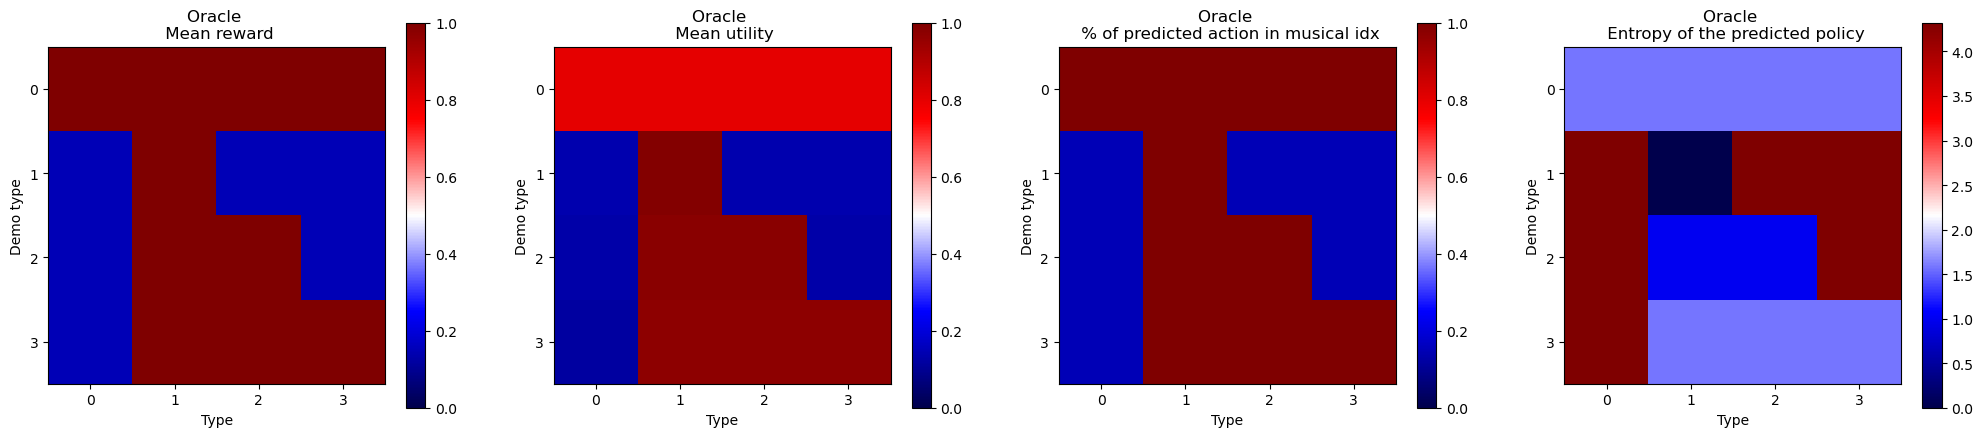

In [53]:
# Oracle teacher

perf_image_entropy = np.zeros((4, 4))
perf_image_pourcentage_musical = np.zeros((4, 4))
perf_image_utility = np.zeros((4, 4))

for type in range(num_types):
    for demo_type in range(num_demo_types):
        
        len_demo = n_buttons if demo_type == 0 else demo_type

        if demo_type == 0:
            dist = np.zeros(n_buttons)
            dist[np.array([0, 1, 2])] = np.ones(3)
            dist /= dist.sum()
            perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
            perf_image_pourcentage_musical[type, demo_type] = 1
        elif demo_type == 3:
            if type == 0:
                # Uniform policy
                perf_image_entropy[type, demo_type] = Shannon_entropy(np.ones(n_buttons) / n_buttons)
                perf_image_pourcentage_musical[type, demo_type] = 3/20
            else:
                # Peaked on 3 (musical) buttons policy
                dist = np.zeros(n_buttons)
                dist[np.array([0, 1, 2])] = np.ones(3)
                dist /= dist.sum()
                perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
                perf_image_pourcentage_musical[type, demo_type] = 1
        elif demo_type == 2:
            if type == 0 or type == 3:
                # Uniform policy
                perf_image_entropy[type, demo_type] = Shannon_entropy(np.ones(n_buttons) / n_buttons)
                perf_image_pourcentage_musical[type, demo_type] = 3/20
            else:
                # Peaked on 2 (musical) buttons policy
                dist = np.zeros(n_buttons)
                dist[np.array([0, 1])] = np.ones(2)
                dist /= dist.sum()
                perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
                perf_image_pourcentage_musical[type, demo_type] = 1
        elif demo_type == 1:
            if type == 0 or type == 3 or type == 2:
                # Uniform policy
                perf_image_entropy[type, demo_type] = Shannon_entropy(np.ones(n_buttons) / n_buttons)
                perf_image_pourcentage_musical[type, demo_type] = 3/20
            else:
                # Peaked on 1 (musical) buttons policy
                dist = np.zeros(n_buttons)
                dist[0] = np.ones(1)
                dist /= dist.sum()
                perf_image_entropy[type, demo_type] = Shannon_entropy(dist)
                perf_image_pourcentage_musical[type, demo_type] = 1

        perf_image_utility[type, demo_type] = perf_image_pourcentage_musical[type, demo_type] - alpha * len_demo


fig = plt.figure(figsize=(25,5))

fig.add_subplot(1,4,1)
plt.imshow(perf_image_pourcentage_musical.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n Mean reward')

fig.add_subplot(1,4,2)
plt.imshow(perf_image_utility.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n Mean utility')

fig.add_subplot(1,4,3)
plt.imshow(perf_image_pourcentage_musical.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n % of predicted action in musical idx')

fig.add_subplot(1,4,4)
plt.imshow(perf_image_entropy.T, cmap='seismic', vmin=0, vmax=(Shannon_entropy(np.ones(n_buttons) / n_buttons)))
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Oracle \n Entropy of the predicted policy');

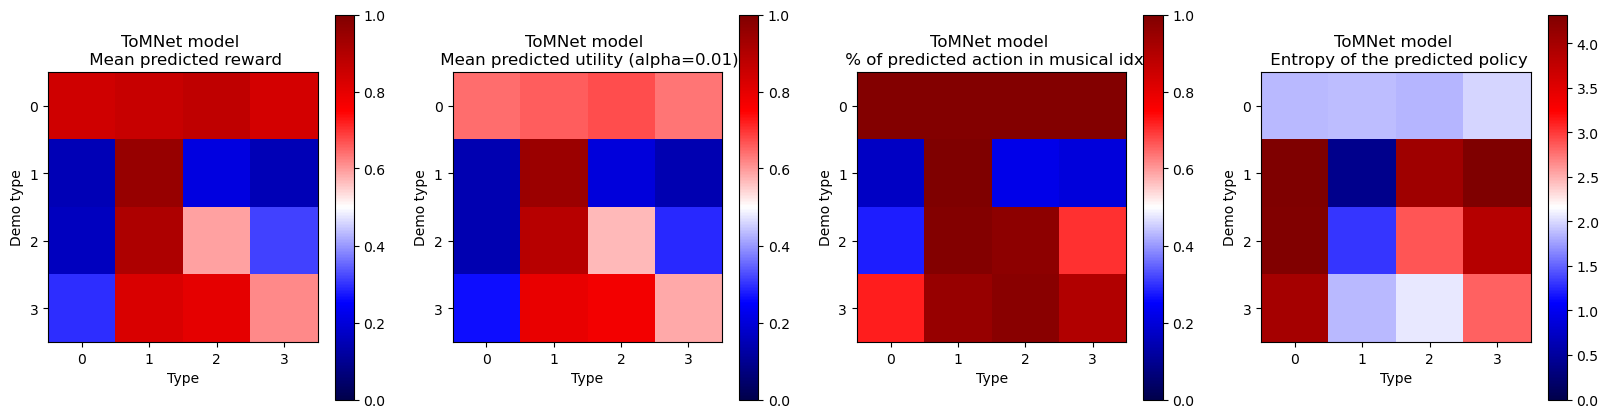

In [54]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,4,1)
plt.imshow(image_pred_reward.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('ToMNet model \n Mean predicted reward')

fig.add_subplot(1,4,2)
plt.imshow(image_pred_utility.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title(f'ToMNet model \n Mean predicted utility (alpha={alpha})')

fig.add_subplot(1,4,3)
plt.imshow(image_pourcentage_musical.T, cmap='seismic', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('ToMNet model \n % of predicted action in musical idx')

fig.add_subplot(1,4,4)
plt.imshow(image_entropy.T, cmap='seismic', vmin=0, vmax=(Shannon_entropy(np.ones(n_buttons) / n_buttons)))
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('ToMNet model \n Entropy of the predicted policy');

fig.savefig(f"./neural_network_ToM/figures/Statistics/{saving_name}_e_char_dim_{model_config['e_char_dim']}_{criterion}.png")

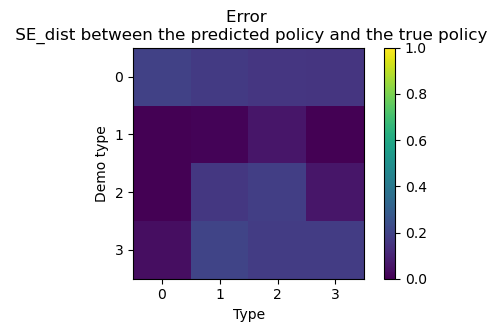

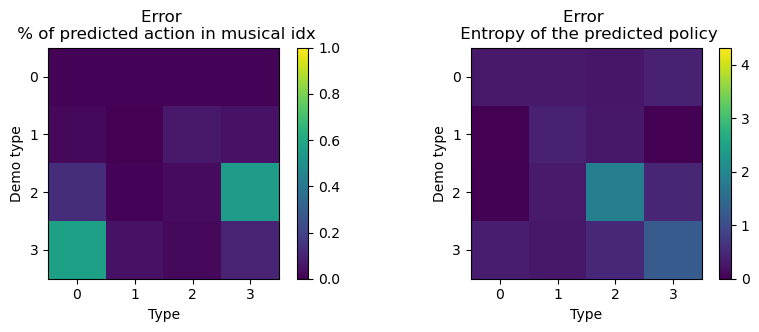

In [55]:
fig = plt.figure(figsize=(5,3))

if config['max_steps_current'] == 0:
    plt.imshow(image_error_dist.T, cmap='viridis', vmin=0, vmax=1)
    plt.colorbar()
    plt.xticks([3,2,1,0])
    plt.yticks([3,2,1,0])
    plt.xlabel('Type')
    plt.ylabel('Demo type')
    plt.title(f'Error \n {distance.__name__} between the predicted policy and the true policy')

fig.savefig(f"./neural_network_ToM/figures/Statistics/Error/{saving_name}_e_char_dim_{model_config['e_char_dim']}_{criterion}_error_L2.png")

fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,2,1)
plt.imshow(np.abs(perf_image_pourcentage_musical - image_pourcentage_musical).T, cmap='viridis', vmin=0, vmax=1)
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Error \n % of predicted action in musical idx')


fig.add_subplot(1,2,2)
plt.imshow(np.abs(perf_image_entropy - image_entropy).T, cmap='viridis', vmin=0, vmax=(Shannon_entropy(np.ones(n_buttons) / n_buttons)))
plt.colorbar()
plt.xticks([3,2,1,0])
plt.yticks([3,2,1,0])
plt.xlabel('Type')
plt.ylabel('Demo type')
plt.title('Error \n Entropy of the predicted policy');

fig.savefig(f"./neural_network_ToM/figures/Statistics/Error/{saving_name}_e_char_dim_{model_config['e_char_dim']}_{criterion}_error.png")

#### PCA

In [ ]:
type_embedding = dict_metric['e_char'].reshape(num_types * num_demo_types * n_agent, model_config['e_char_dim'])

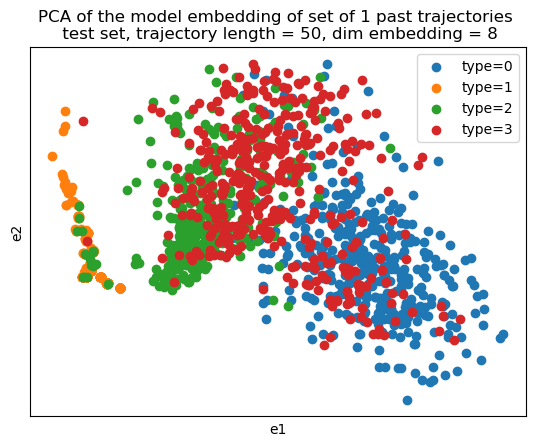

In [57]:
# Normalize
scaler = StandardScaler()
scaled_type_embedding = scaler.fit_transform(type_embedding)

fig = plt.figure()

# PCA
if model_config['e_char_dim'] > 2:
    transformed_type_embedding = PCA(n_components=2).fit_transform(scaled_type_embedding)
    transformed_type_embedding = transformed_type_embedding.reshape(num_types, num_demo_types, n_agent, 2)
else:
    transformed_type_embedding = scaled_type_embedding.reshape(num_types, num_demo_types, n_agent, 2)

for type in range(num_types):
    plt.scatter(transformed_type_embedding[type,...,0], transformed_type_embedding[type,...,1], label=f'type={type}')
plt.title(f"PCA of the model embedding of set of {num_past} past trajectories \n test set, trajectory length = {max_steps}, dim embedding = {model_config['e_char_dim']}")
plt.yticks([])
plt.xticks([])
plt.xlabel('e1')
plt.ylabel('e2')
plt.legend();

fig.savefig(f"./neural_network_ToM/figures/PCA/{saving_name}_e_char_dim_{model_config['e_char_dim']}_{criterion}.png")

#### T-SNE

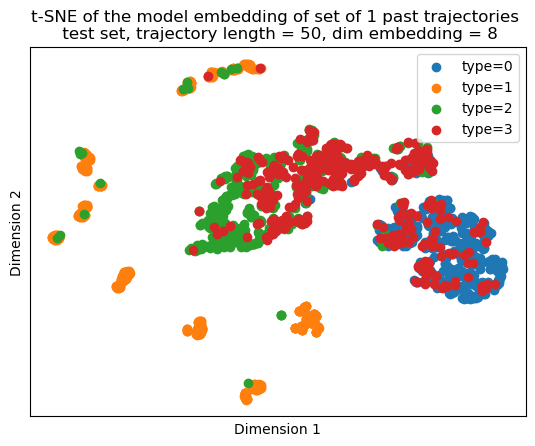

In [58]:
# Normalize
scaler = StandardScaler()
scaled_type_embedding = scaler.fit_transform(type_embedding)

fig = plt.figure()

# t-SNE
if model_config['e_char_dim'] > 2:
    transformed_type_embedding = TSNE(n_components=2).fit_transform(scaled_type_embedding)
    transformed_type_embedding = transformed_type_embedding.reshape(num_types, num_demo_types, n_agent, 2)
else:
    transformed_type_embedding = scaled_type_embedding.reshape(num_types, num_demo_types, n_agent, 2)

for type in range(num_types):
    plt.scatter(transformed_type_embedding[type,...,0], transformed_type_embedding[type,...,1], label=f'type={type}')
plt.title(f"t-SNE of the model embedding of set of {num_past} past trajectories \n test set, trajectory length = {max_steps}, dim embedding = {model_config['e_char_dim']}")
plt.yticks([])
plt.xticks([])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend();

fig.savefig(f"./neural_network_ToM/figures/TSNE/{saving_name}_e_char_dim_{model_config['e_char_dim']}_{criterion}.png")

### TomNet based teacher

In [42]:
from neural_network_ToM.nn_teacher import ToMNetTeacher

In [43]:
criterion = 'loss'

# Load PreNet model
loading_path = './neural_network_ToM/model_weights/big_single_no_current_08.06.2023.12.24'
saving_name = loading_path[35:]
print(f'Saving statistics and figures at {saving_name}')

model_loading_path = os.path.join(loading_path, f'prednet_model_best_{criterion}.pt')
device = 'cpu'

model_config = load_config(os.path.join(loading_path, f'config_best_{criterion}.json'))
training_outputs = load_config(os.path.join(loading_path, 'outputs.json'))

# # Evaluation dataset with single past trajectory and empty current trajectory
# data_loading_path = os.path.join('neural_network_ToM', './data/eval_single')
# data_loading_path = os.path.join('neural_network_ToM', './data/eval_single_no_current')

data_loading_path = os.path.join('neural_network_ToM', model_config['data_path'])
config = load_config(os.path.join(data_loading_path, 'config_dataset.json'))

# Dataset parameters
n_buttons, n_music = config['n_buttons'], config['n_music']
num_past, max_steps, min_steps, max_steps_current = config['num_past'], config['max_steps'], config['min_steps'], config['max_steps_current']
n_agent_train, n_agent_val, n_agent_test = config['n_agent_train'], config['n_agent_val'], config['n_agent_test']

using_dist = config['true_types'] if 'true_types' in config.keys() else False
print(f'Dataset with true learner types: {using_dist}')

varying_length = config['varying_length'] if 'varying_length' in config.keys() else False
print(f'Observed past trajectories with varying length: {varying_length}') 

use_e_mental = not (max_steps_current == 0)
print(f'Using MentalNet block: {use_e_mental}')

print(f"\n \
      max_step: {max_steps} \n \
      num_past: {num_past} \n \
      max_steps_current: {max_steps_current} \n \
      \n \
      batch_size: {model_config['batch_size']} \n \
      e_char_dim: {model_config['e_char_dim']} \n \
      basic layer: {model_config['basic_layer']} \n")

prednet = PredNet(num_input=2,
                  num_step=max_steps, 
                  n_buttons=n_buttons,
                  num_output_char=model_config['e_char_dim'],
                  basic_layer= model_config['basic_layer'],
                  device=device,
                  use_e_mental=use_e_mental)

prednet.load_state_dict(torch.load(model_loading_path))

model_epochs = str(model_config['n_epochs'])
print(f"Best model in validation achieved in epoch {model_epochs}")
print(f"Train | Loss | {training_outputs['train'][model_epochs]['loss']:.4f} | Acc | {training_outputs['train'][model_epochs]['accuracy']:.4f} | " + \
      f"Val | Loss | {training_outputs['val'][model_epochs]['loss']:.4f} | Acc | {training_outputs['val'][model_epochs]['accuracy']:.4f} | ")

Saving statistics and figures at big_single_no_current_08.06.2023.12.24
Dataset with true learner types: False
Observed past trajectories with varying length: False
Using MentalNet block: False

       max_step: 50 
       num_past: 1 
       max_steps_current: 0 
       
       batch_size: 1 
       e_char_dim: 8 
       basic layer: ResConv 

Best model in validation achieved in epoch 27
Train | Loss | 1.8379 | Acc | 0.3491 | Val | Loss | 1.9770 | Acc | 0.2800 | 


In [60]:
# Global evaluation parameters
# DICT = load_output(f'./outputs/bayesian_ToM/teacher_eval.json')
# LOADED = False
DICT = load_output(f'./outputs/nn_ToM/teacher_eval_{saving_name}.json')
LOADED = True

N = 100
N_envs = 3
num_obs = 50

n_eval = 20

In [61]:
def evaluate(method: str, alpha: float) -> None:
    if method not in DICT.keys():
        DICT[method] = {}
    DICT[method][alpha] = {}
    for type in range(num_types):
        DICT[method][alpha][type] = {}
        DICT[method][alpha][type]['rewards'] = []
        DICT[method][alpha][type]['demo'] = []
        DICT[method][alpha][type]['uncertainty'] = []
        DICT[method][alpha][type]['teacher_regret'] = []
        for _ in range(N_envs):
            # Init envs
            observation_env = ButtonsToy(n_buttons, n_music)
            demonstration_env = ButtonsToy(n_buttons, n_music)
            for _ in trange(N):
                cum_rewards = []
                all_demo = []
                uncertainties = []
                teacher_regret = []
                for n in range(num_obs):
                    # Init teacher
                    if method == 'MAP' or method == 'Bayesian' or method == 'Oracle':
                        teacher = BaysesianTeacher(env=observation_env,
                                                    num_types=num_types)
                    elif method == 'Uniform' or method == 'Opt_non_adaptive':
                        teacher = NaiveTeacher(env=observation_env,
                                                    num_types=num_types)
                    elif method == 'ToMNet':
                        teacher = ToMNetTeacher(env=observation_env,
                                                num_types=num_types,
                                                max_steps=config['max_steps'],
                                                loading_path=loading_path,
                                                criterion=criterion,
                                                device=device,
                                                use_e_mental=use_e_mental)
                    # Init learner
                    learner = Learner(type)
                    learner.init_env(observation_env)
                    if method in ['MAP', 'Bayesian', 'ToMNet']:
                        # Observe the learner
                        traj = learner.act(size=n)
                        teacher.observe(traj)
                        if method in ['MAP', 'Bayesian']:
                            # Teacher uncertainty
                            uncertainties.append(Shannon_entropy(teacher.beliefs))
                    # Chose demonstration
                    teacher.init_env(demonstration_env)
                    if method != 'Oracle':
                        demo = teacher.demonstrate(method=method, alpha=alpha)
                    else:
                        demo = teacher.demonstrate(method=method, alpha=alpha, true_learner_type=type)
                    # Teacher regret on its demonstration choice
                    teacher_regret.append(cost(demo, alpha=alpha) - cost(teacher.demonstrations[type], alpha=alpha))
                    # Show the demonstration
                    learner.init_env(demonstration_env)
                    learner.observe(demo)
                    # Evaluate hwo helpful has been the demonstration
                    _, rewards = learner.act(size=n_eval)
                    # Append
                    cum_rewards.append(np.sum(rewards))
                    all_demo.append(len(demo[0]))
                DICT[method][alpha][type]['rewards'].append(cum_rewards)
                DICT[method][alpha][type]['demo'].append(all_demo)
                DICT[method][alpha][type]['uncertainty'].append(uncertainties)
                DICT[method][alpha][type]['teacher_regret'].append(teacher_regret)

In [48]:
evaluate('ToMNet', alpha=0.01)

100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


In [57]:
evaluate('ToMNet', alpha=0.02)

  0%|          | 0/100 [00:00<?, ?it/s]/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: divide by zero encountered in log2
  tab = proba_dist * np.log2(proba_dist)
/home/chetouani/Documents/STAGE_Clemence/ISIR_internship_ToM/experimental_setup_meta/utils.py:35: RuntimeWarning: invalid value encountered in multiply
  tab = proba_dist * np.log2(proba_dist)
100%|██████████| 100/100 [05:17<00:00,  3.17s/it]


In [62]:
def display_evaluation(method: str, alpha: float, save: bool=True) -> None:
    demo_colors = ['m', 'red', 'orange', 'pink']

    if LOADED:
        alpha = str(alpha)

    fig0 = plt.figure(figsize=(15,5))
    # Mean over the type of learner of the total reward on trajectory of size 20  (after seen the demo chosen by the teacher)
    all_evals = np.array([DICT[method][alpha][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
    mean = np.mean(all_evals, axis=0)
    std = np.std(all_evals)

    plt.plot(mean, label=f'{method}', color='saddlebrown')
    plt.ylim(0, 21)
    plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='saddlebrown')
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    
    # Baseline MAP --> Uniform
    if method == 'MAP':
        baseline = 'Uniform'
        if baseline in DICT.keys():
            all_evals = np.array([DICT[baseline][alpha][str(type)]['rewards'] if LOADED else DICT[baseline][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)
            plt.plot(mean, label=f'Baseline ({baseline})', color='crimson', ls='--')
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='crimson')

    plt.title(fr' Mean total reward over all the type of learner'  + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')
    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Learner reward')
    plt.legend()

    fig1 = plt.figure(figsize=(15,5))
    # Learner total reward on trajectory of size 20 (after seen the demo chosen by the teacher for each type of learner)
    fig1.add_subplot(1,2,1)
    for type in range(num_types):
        if LOADED:
            type = str(type)
        all_evals = np.array(DICT[method][alpha][type]['rewards'])
        mean = np.mean(all_evals, axis=0)
        std = np.std(all_evals)

        plt.plot(mean, label=f'type = {type}')
        plt.ylim(0, 21)
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std / np.sqrt(N * N_envs), alpha=0.2)
    plt.plot(np.arange(num_obs), [20] * num_obs, c='k', label="Max", ls='--')
    plt.title(fr'Learner total reward per type'  + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}' + f'\n model {saving_name}')

    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Learner reward')
    plt.legend()

    # Teacher uncertainty
    if method in ['MAP', 'Bayesian']:
        fig1.add_subplot(1,2,2)
        for type in range(num_types):
            if LOADED:
                type = str(type)
            all_evals = np.array(DICT[method][alpha][type]['uncertainty'])
            mean = np.mean(all_evals, axis=0)
            std = np.std(all_evals)

            plt.plot(mean, label=f'type = {type}')
            plt.ylim(- 0.5 , Shannon_entropy(np.ones(num_types) / num_types) + 0.5)
            plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2)
        plt.plot(np.arange(num_obs), [0] * num_obs, c='k', label="Min", ls='--')
        plt.title(fr'Teacher uncertainty per type' + f'\n $\mathbf{{{method}}}$ teacher, cost parameter alpha={alpha}')

        plt.xlabel('Size of the learner trajectory observed by the teacher')
        plt.ylabel('Teacher uncertainty (Shannon entropy)')
        plt.legend()

    # Repartition btw type of demonstrations shown
    fig2, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        if LOADED:
            type = str(type)
        for demo_type in range(num_demo_types):
            demo_rep = np.array(DICT[method][alpha][type]['demo'])
            if demo_type == 0:
                prop_demo = np.array(demo_rep == n_buttons)
            else:
                prop_demo = np.array(demo_rep == demo_type)
            mean = np.mean(prop_demo, axis=0)
            std = np.std(prop_demo)

            ax.plot(mean, label=f'demo type = {demo_type}', color=demo_colors[demo_type])
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N + N_envs), mean - 1.96 * std/np.sqrt(N + N_envs), alpha=0.2, color=demo_colors[demo_type])
        ax.plot(np.arange(num_obs), [1] * num_obs, c='k', label="Max", ls='--')

        ax.set_title(f'% of each demo type for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' + f'\n {method} teacher, cost parameter alpha={alpha}')
        ax.set_xlabel('Size of the learner trajectory observed by the teacher')
        ax.set_ylabel('Proportion')
        ax.legend()

    # Teacher regret on the cost of the demonstration he showed
    fig3, axes = plt.subplots(1, 4, figsize=(25,5))
    for type in range(num_types):
        ax = axes[type]
        if LOADED:
            type = str(type)
        all_regrets = np.array(DICT[method][alpha][type]['teacher_regret'])
        mean = np.mean(all_regrets, axis=0)
        std = np.std(all_regrets)

        ax.plot(mean, label=f'type = {type}', color='c')
        ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='c')
        ax.set_ylim( - (float(alpha) * (n_buttons - 1) + 0.02), float(alpha) * (n_buttons - 1) + 0.02)
        ax.plot(np.arange(num_obs), [0] * num_obs, c='k', ls='--')

        # Baseline Bayesian --> Opt_non_adaptive
        if method == 'Bayesian':
            baseline = 'Opt_non_adaptive'
            all_regrets = np.array(DICT[baseline][alpha][type]['teacher_regret'])
            mean = np.mean(all_regrets, axis=0)
            std = np.std(all_regrets)

            ax.plot(mean, label=f'Baseline ({baseline})', color='crimson', ls='--')
            ax.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color='crimson')

        ax.set_title(f'Teacher cost regret for learner of $\mathbf{{type}}$ ' + fr'$\mathbf{{{type}}}$' +  f'\n {method} teacher, cost parameter alpha={alpha}')
        ax.set_xlabel('Size of the learner trajectory observed by the teacher')
        ax.set_ylabel('Cost regret')
        ax.legend()

    # Super figure
    figs = [fig0, fig1, fig2, fig3]
    saving_names = ['mean', 'per_type', 'chosen_demo', 'teacher_regret']
    if save:
        if method in ['MAP', 'Bayesian', 'Uniform', 'Opt_non_adaptive']:
            for ii, fig in enumerate(figs):
                fig.savefig(f'./bayesian_ToM/figures/{method}/eval_{saving_names[ii]}_{method}_{alpha}.png')
        elif method in ['ToMNet']:
            for ii, fig in enumerate(figs):
                fig.savefig(f'./neural_network_ToM/figures/{method}/eval_{saving_names[ii]}_{method}_{alpha}_{saving_name}.png')
            

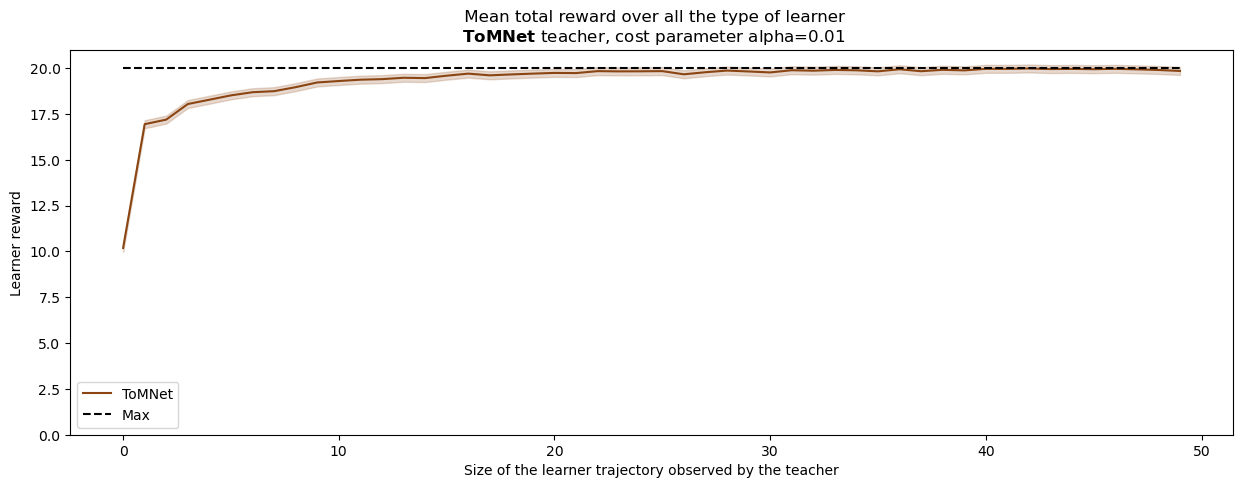

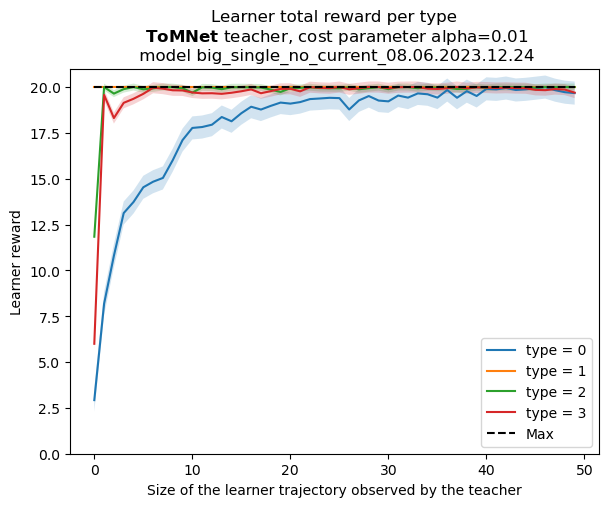

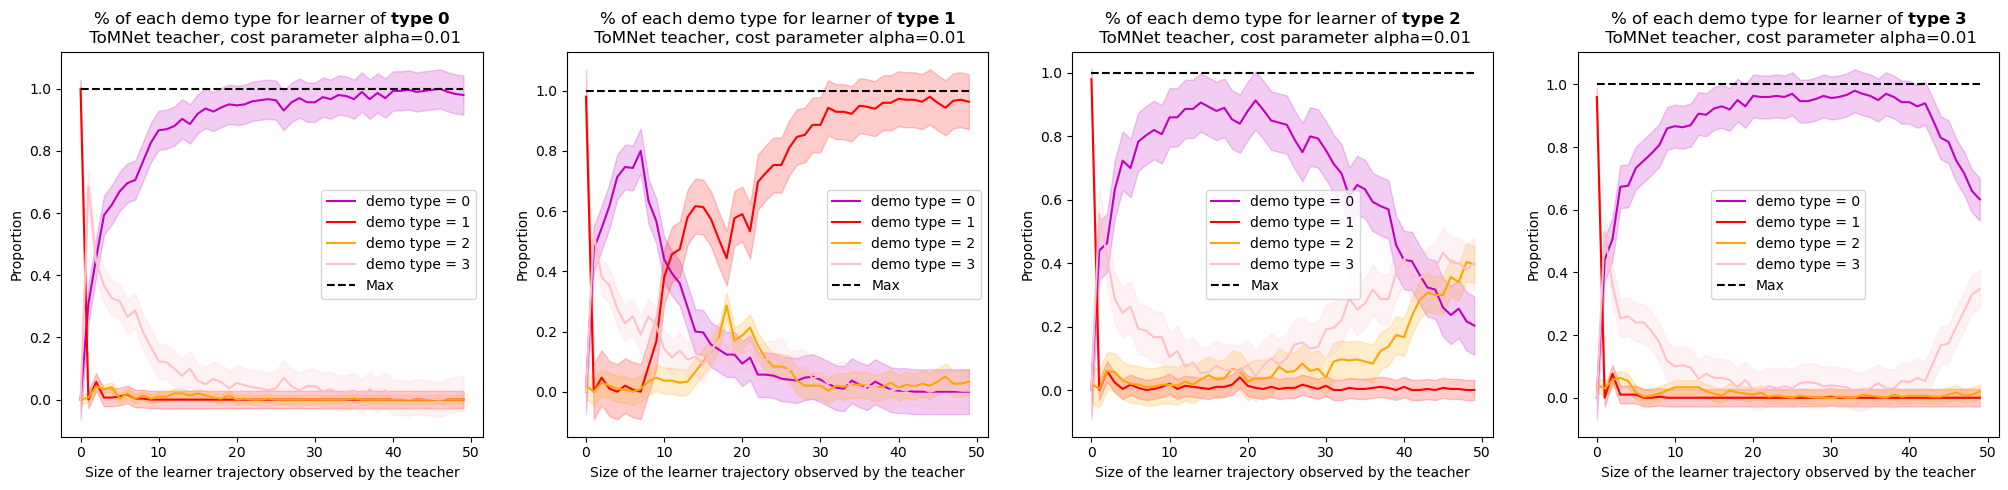

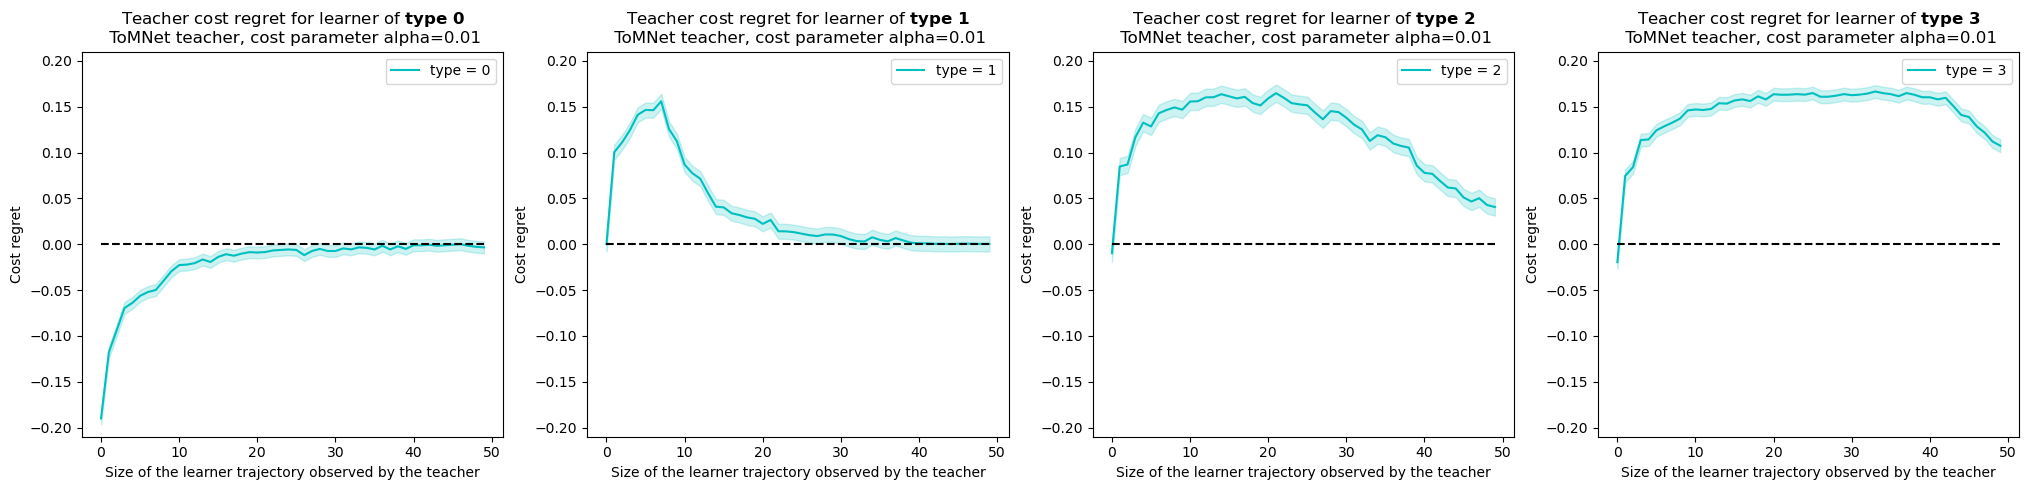

In [52]:
display_evaluation('ToMNet', alpha=0.01, save=True)

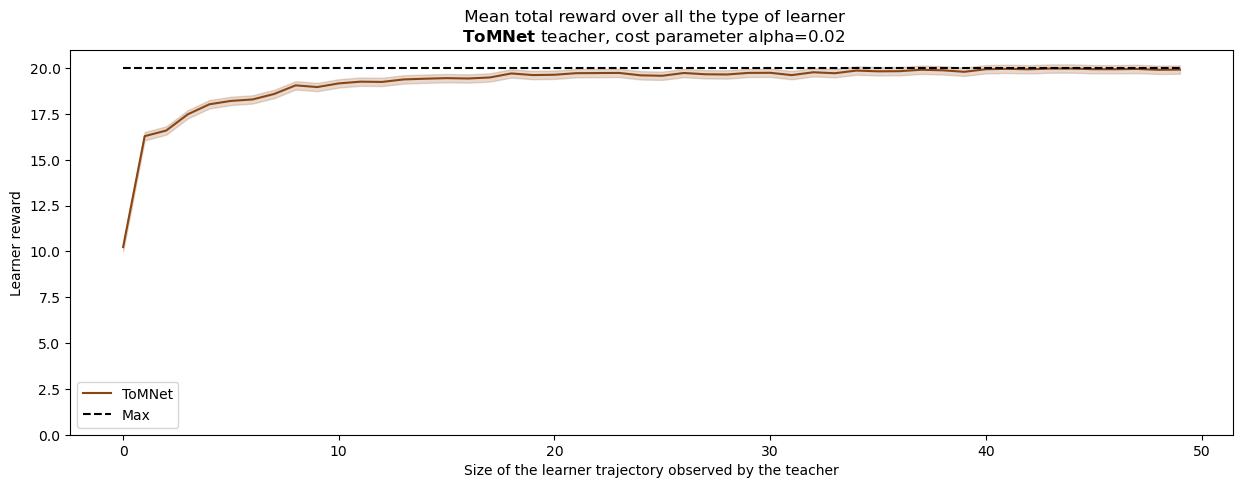

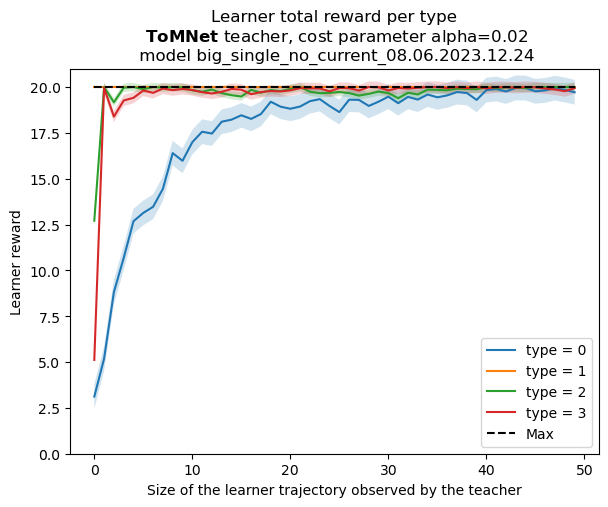

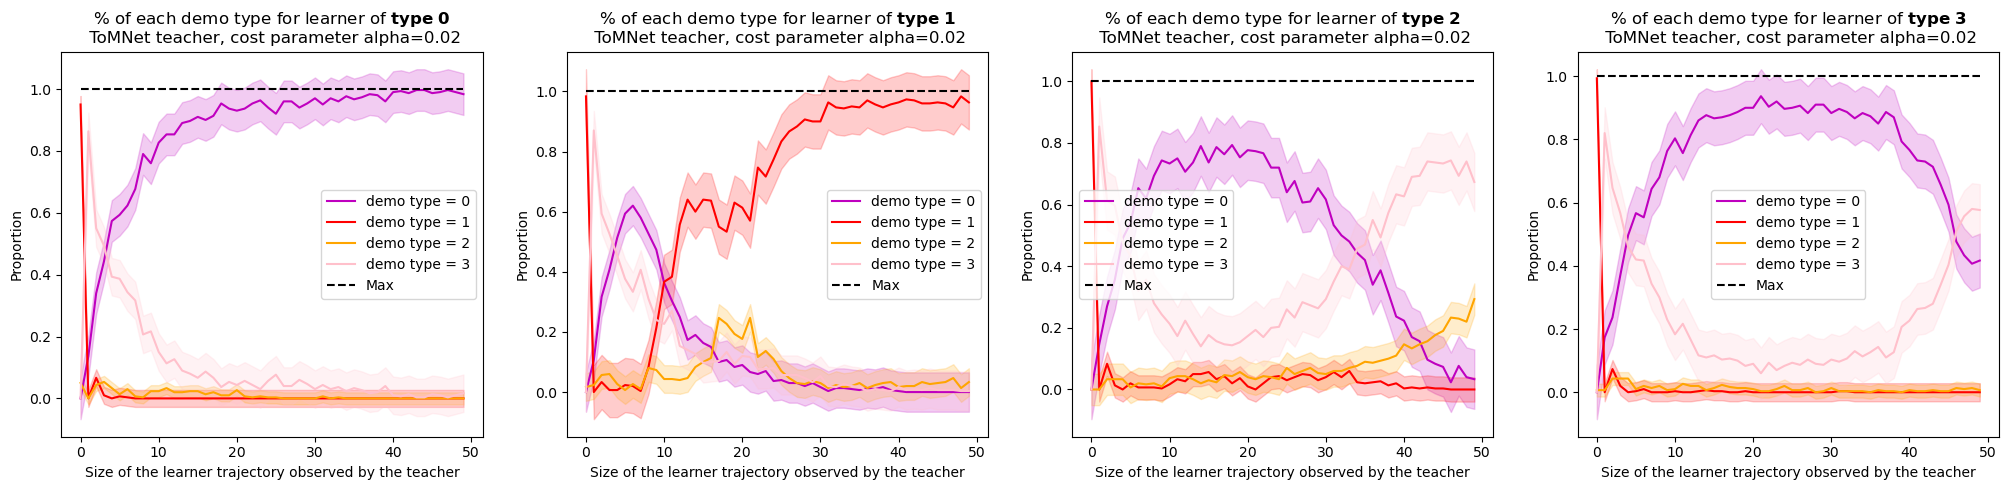

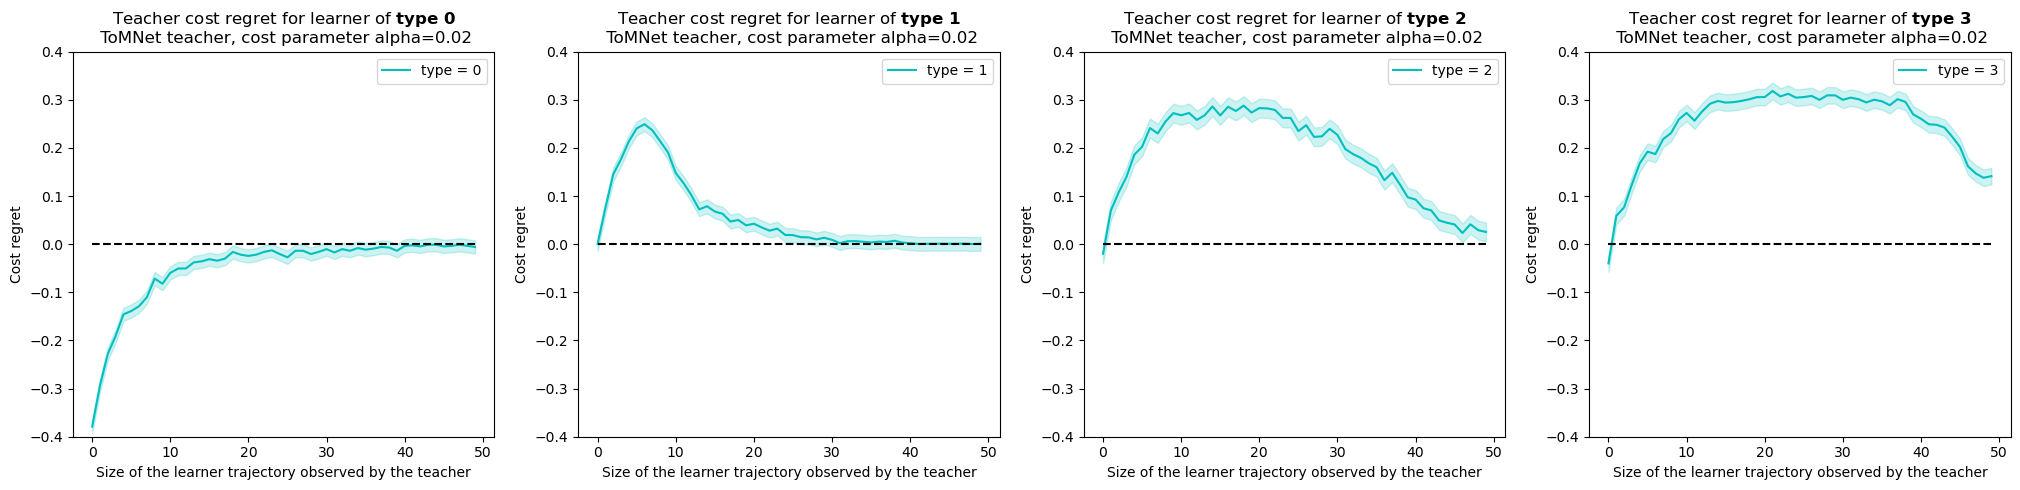

In [63]:
display_evaluation('ToMNet', alpha=0.02, save=True)

In [64]:
def display_utility(alpha: float=0.01) -> None:
    fig = plt.figure(figsize=(15,5))
    method_values = ['MAP', 'Bayesian', 'Uniform', 'Opt_non_adaptive', 'Oracle', 'ToMNet']
    colors = ['orangered', 'mediumvioletred', 'darkturquoise', 'royalblue', 'darkgreen', 'pink']
    for ii,method in enumerate(method_values):
        util = []
        for type in range(num_types):
            best_cost = alpha * n_buttons if type == 0 else alpha * type
            all_rewards = np.array([DICT[method][str(alpha)][str(type)]['rewards'] if LOADED else DICT[method][alpha][type]['rewards'] for type in range(num_types)]).mean(axis=0)
            all_cost = np.array([DICT[method][str(alpha)][str(type)]['teacher_regret'] + best_cost if LOADED else DICT[method][alpha][type]['rewards'] + best_cost for type in range(num_types)]).mean(axis=0)

            all_util = all_rewards / n_buttons - all_cost
            util.append(all_util)
            
        all = np.mean(util, axis=0)
        mean = np.mean(all, axis=0)
        std = np.std(all)
        plt.plot(mean, label=f'{method}', color=colors[ii])
        plt.fill_between(np.arange(num_obs), mean + 1.96 * std / np.sqrt(N * N_envs), mean - 1.96 * std/np.sqrt(N * N_envs), alpha=0.2, color=colors[ii])
    
    if alpha in [0.01, 0.02]:
        plt.ylim(0.5, 1)
    
    plt.xlabel('Size of the learner trajectory observed by the teacher')
    plt.ylabel('Utility')
    plt.title(f'Mean utility over all the type of learner (95% c.i) \n cost parameter alpha={alpha} \n ToMNet model {saving_name}')
    plt.legend()
    
    fig.savefig(f'./neural_network_ToM/figures/all_utilities_{alpha}_{saving_name}.png');

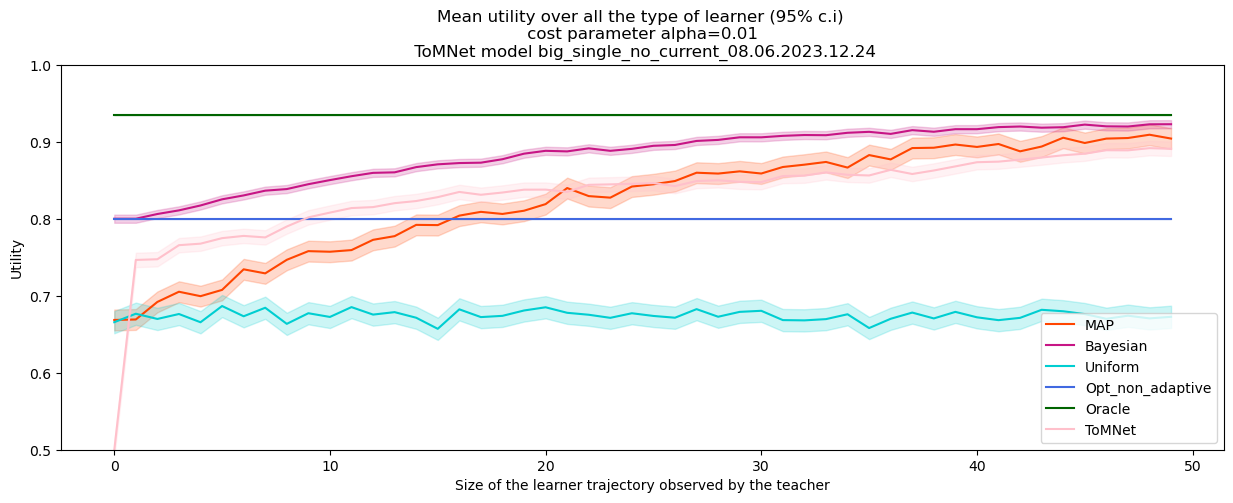

In [65]:
display_utility(alpha=0.01)

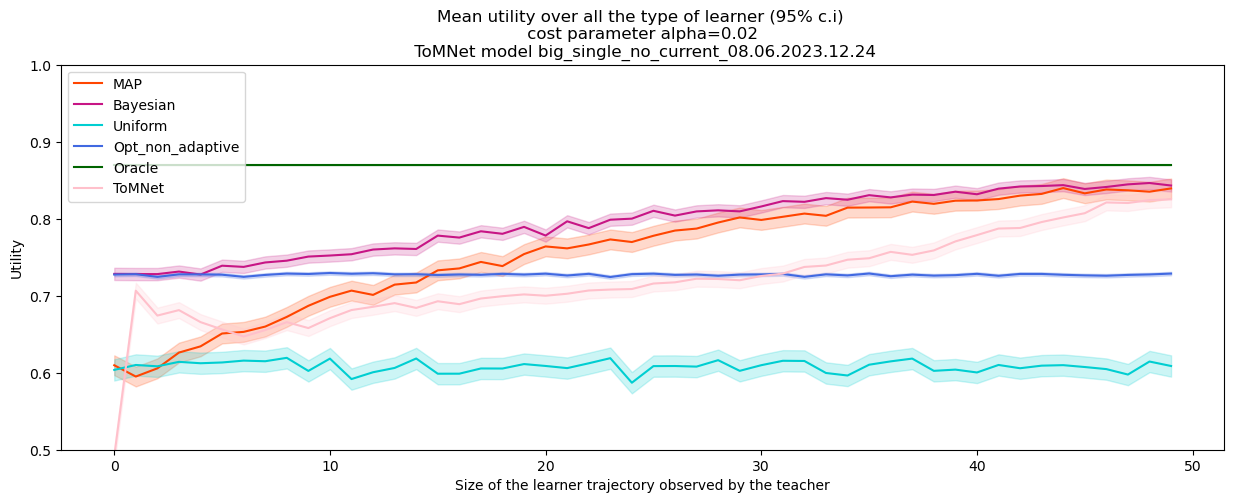

In [66]:
display_utility(alpha=0.02)

### Saving

In [59]:
save_output(DICT, './outputs/nn_ToM', f'teacher_eval_{saving_name}')